<h1 style="text-align:center; font-size:45px"> Titanic Machine Learning | EDA</h1>

# About the dataset
- We are going to work with titanic dataSet, it is a very famous dataSet, for Machine Learning classification Problem. Where we, predict the classification for survival or deceased of passengers of Titanic.
- Source: https://www.kaggle.com/competitions/titanic

# Table of Contents
<a href='#Importing-necessary-libraries-&-Setting-Notebook-defaults'><h3>1. Importing necessary libraries and Setting Notebook defaults</h3></a>
<a href='#Reading-the-dataset'><h3>2. Reading the dataset</h3></a>
<a href='#Assumtions-based-on-data-analysis'><h3>3. Assumtions based on data analysis</h3></a>
<a href='#Data-Cleaning'><h3>4. Data Cleaning</h3></a>
<a href='#Exploratory-Data-Analysis'><h3>5. Exploratory Data Analysis</h3></a>
<a href='#Feature-Engineering'><h3>6. Feature Engineering</h3></a>
<a href='#Machine-Learning'><h3>7. Machine Learning</h3></a>
<a href='#Final-Model'><h3>8. Final Model</h3></a>

# Importing necessary libraries & Setting Notebook defaults

In [1]:
# Data Analyzing Libraries:
import numpy as np
import pandas as pd

In [2]:
# Data Visualization Libraries:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Setting DPI for Figure Level Plots
plt.rcParams["figure.dpi"] = 720

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
sns.set_style('whitegrid')

# Reading the dataset

In [6]:
titanic_train = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')
combine = [titanic_train, titanic_test]
titanic_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [7]:
print("Number of rows: " + str(titanic_train.shape[0]) + "\nNumber of columns: " + str(titanic_train.shape[1]))

Number of rows: 891
Number of columns: 12


*We have record of 891 Passengers in training dataset*

### Datasets Information

In [8]:
print('Training Dataset Info:')
titanic_train.info()
print('-'*50)
print('Testing Data Set Info:')
titanic_test.info()

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
Testing Data Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  


In [9]:
titanic_train['PassengerId'].nunique()
# No Duplicates in 'PassengerId'

891

### Checking for Null values

In [10]:
print('Nulls in Training Dataset:')
print(titanic_train.isnull().sum())
print('-'*50)
print('Nulls in Testing Dataset:')
print(titanic_test.isnull().sum())

Nulls in Training Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
Nulls in Testing Dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Correlation between Numeric Columns

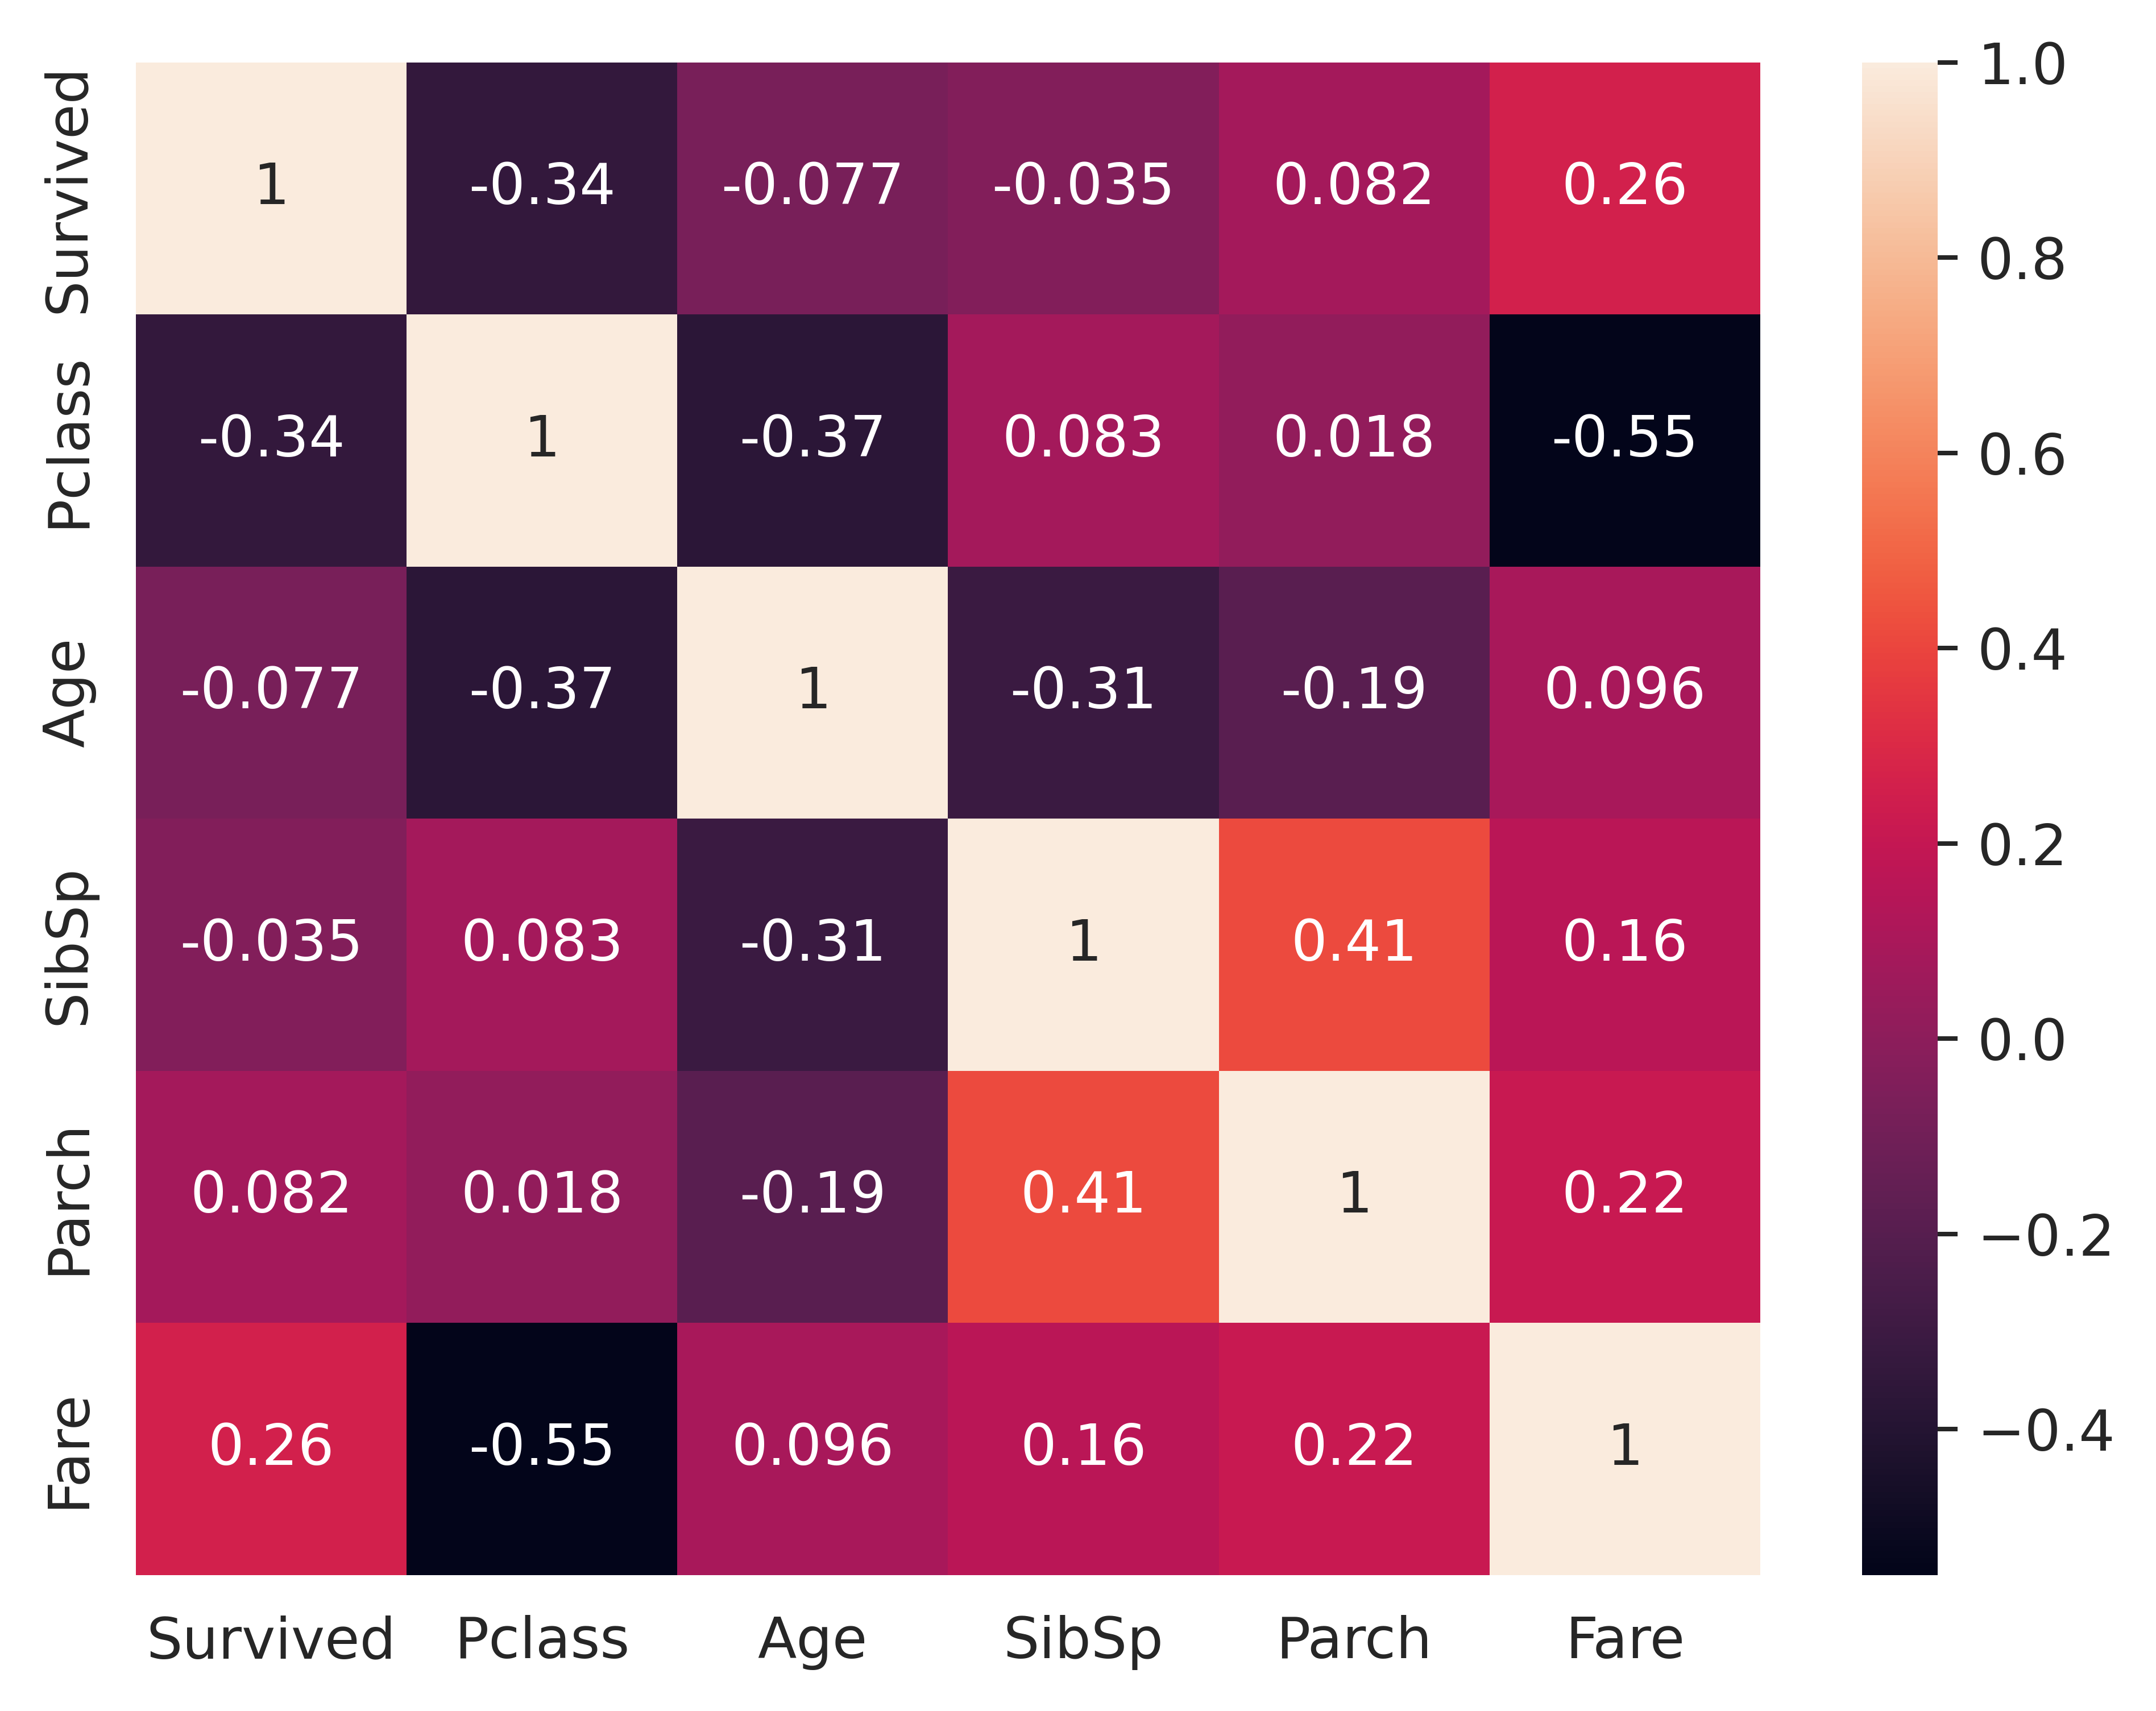

In [11]:
sns.heatmap(titanic_train.drop('PassengerId', axis=1).corr(numeric_only=True), annot=True)
plt.show()

### Categorical Column Discription

In [12]:
titanic_train.describe(include=['O'])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

### Checking Classs Imblance

In [13]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### Features that maybe not useful
- 'Name' column is relatively non-standard, may not contribute directly to survival but if Title's from 'Name' is extracted then there may be a high correlation between 'Title' and 'Survival' features. Then, there may be not much requirement of 'Name' feature, so maybe dropped.
- 'PassengerId' may be dropped from training dataset as it does not contribute to survival.
- 'Ticket' column may be dropped because, it contains 23.56% Duplicate Values which is very high and there may not be a correlation between 'Ticket' and 'Survival'.
- 'Cabin' column may be dropped as it is highly incomplete or contains many null values in dataset.

### Features that can be filled
- 'Age' column contains 19.86% Null Values but still, It is very much correlated to other columns in the dataset.
- 'Embarked' column as it may correlate with survival and only have two Null Values.

### Features that can transform
- We may want to create a new feature called 'IsAlone' based on 'Parch' and 'SibSp' values. If value of 'Parch' and 'SibSp' is zero, hence Passenger is alone on the ship.
- We may want to engineer the Name feature to extract Title as a new feature. Then, we change 'Title' to Numerical Ordinal Feature.
- 'Sex' and 'Embarked' are Non-Numerical Categorical Columns and we need to convert them to Numerical Ordinal Features.

# Data Cleaning

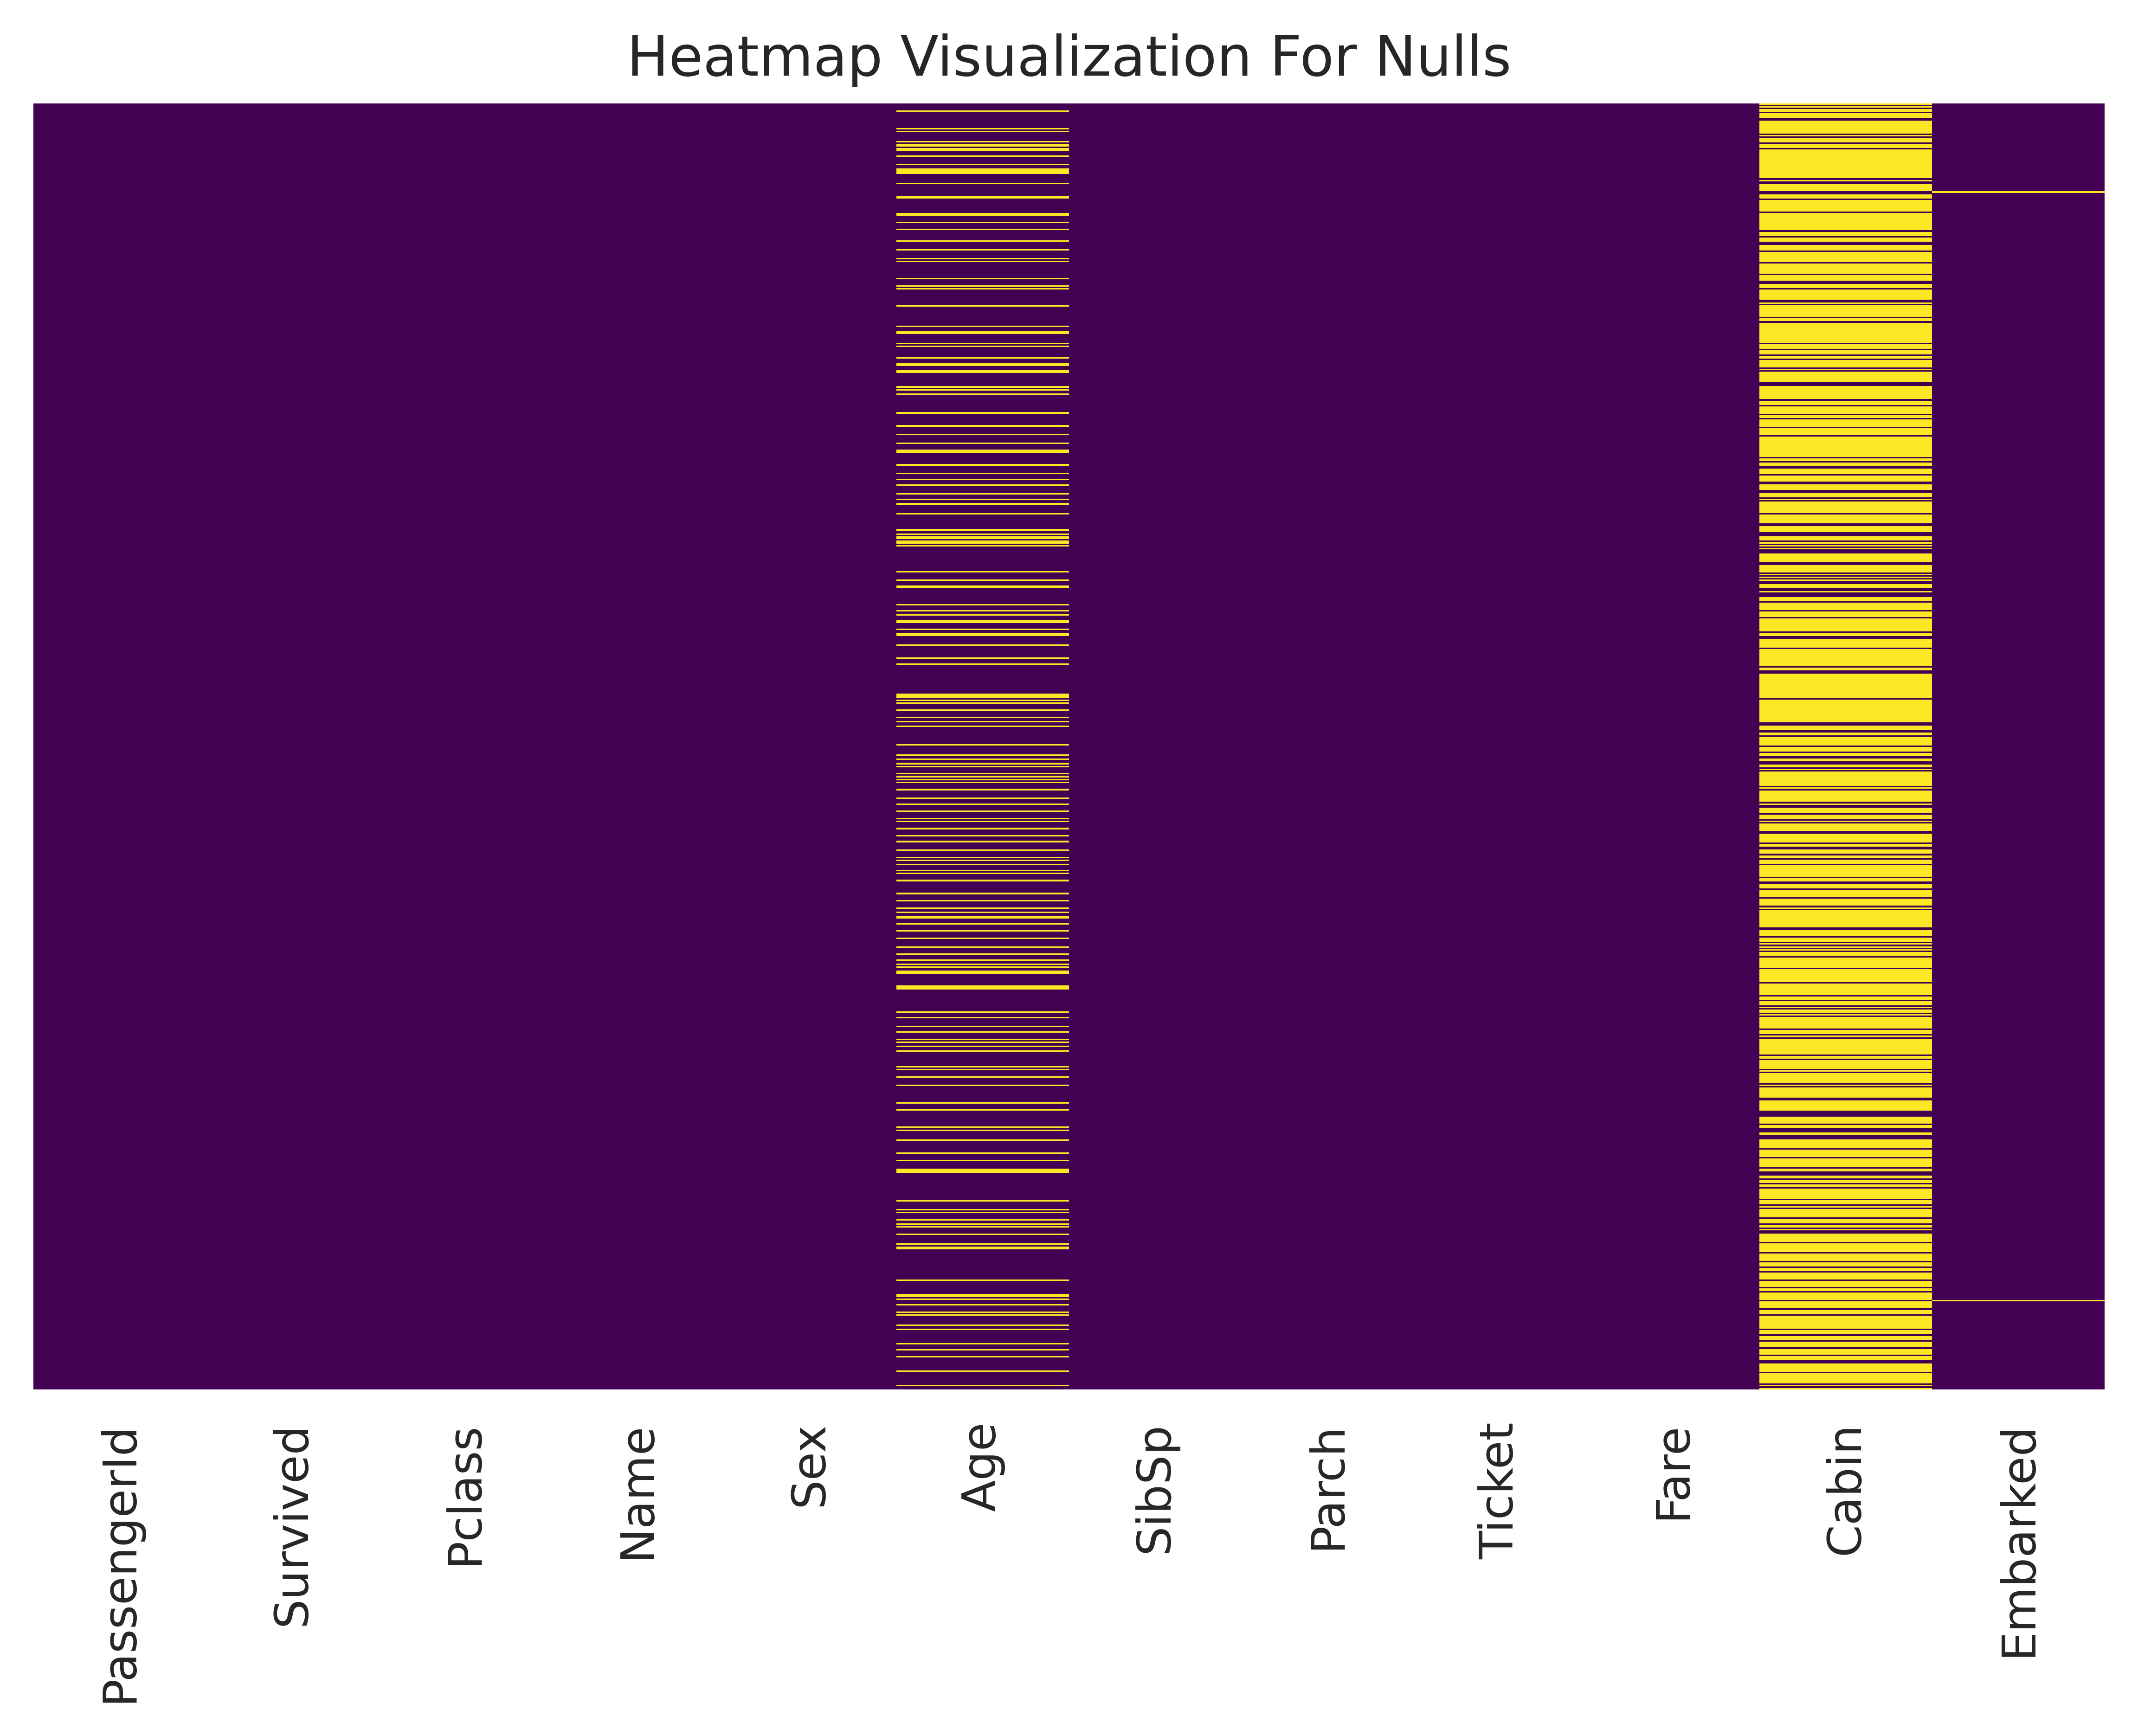

In [14]:
plt.figure(figsize=(8,5))
plt.title('Heatmap Visualization For Nulls')
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Droping 'Cabin' Column

In [15]:
for dataset in combine:
    dataset.drop('Cabin', axis=1, inplace=True)

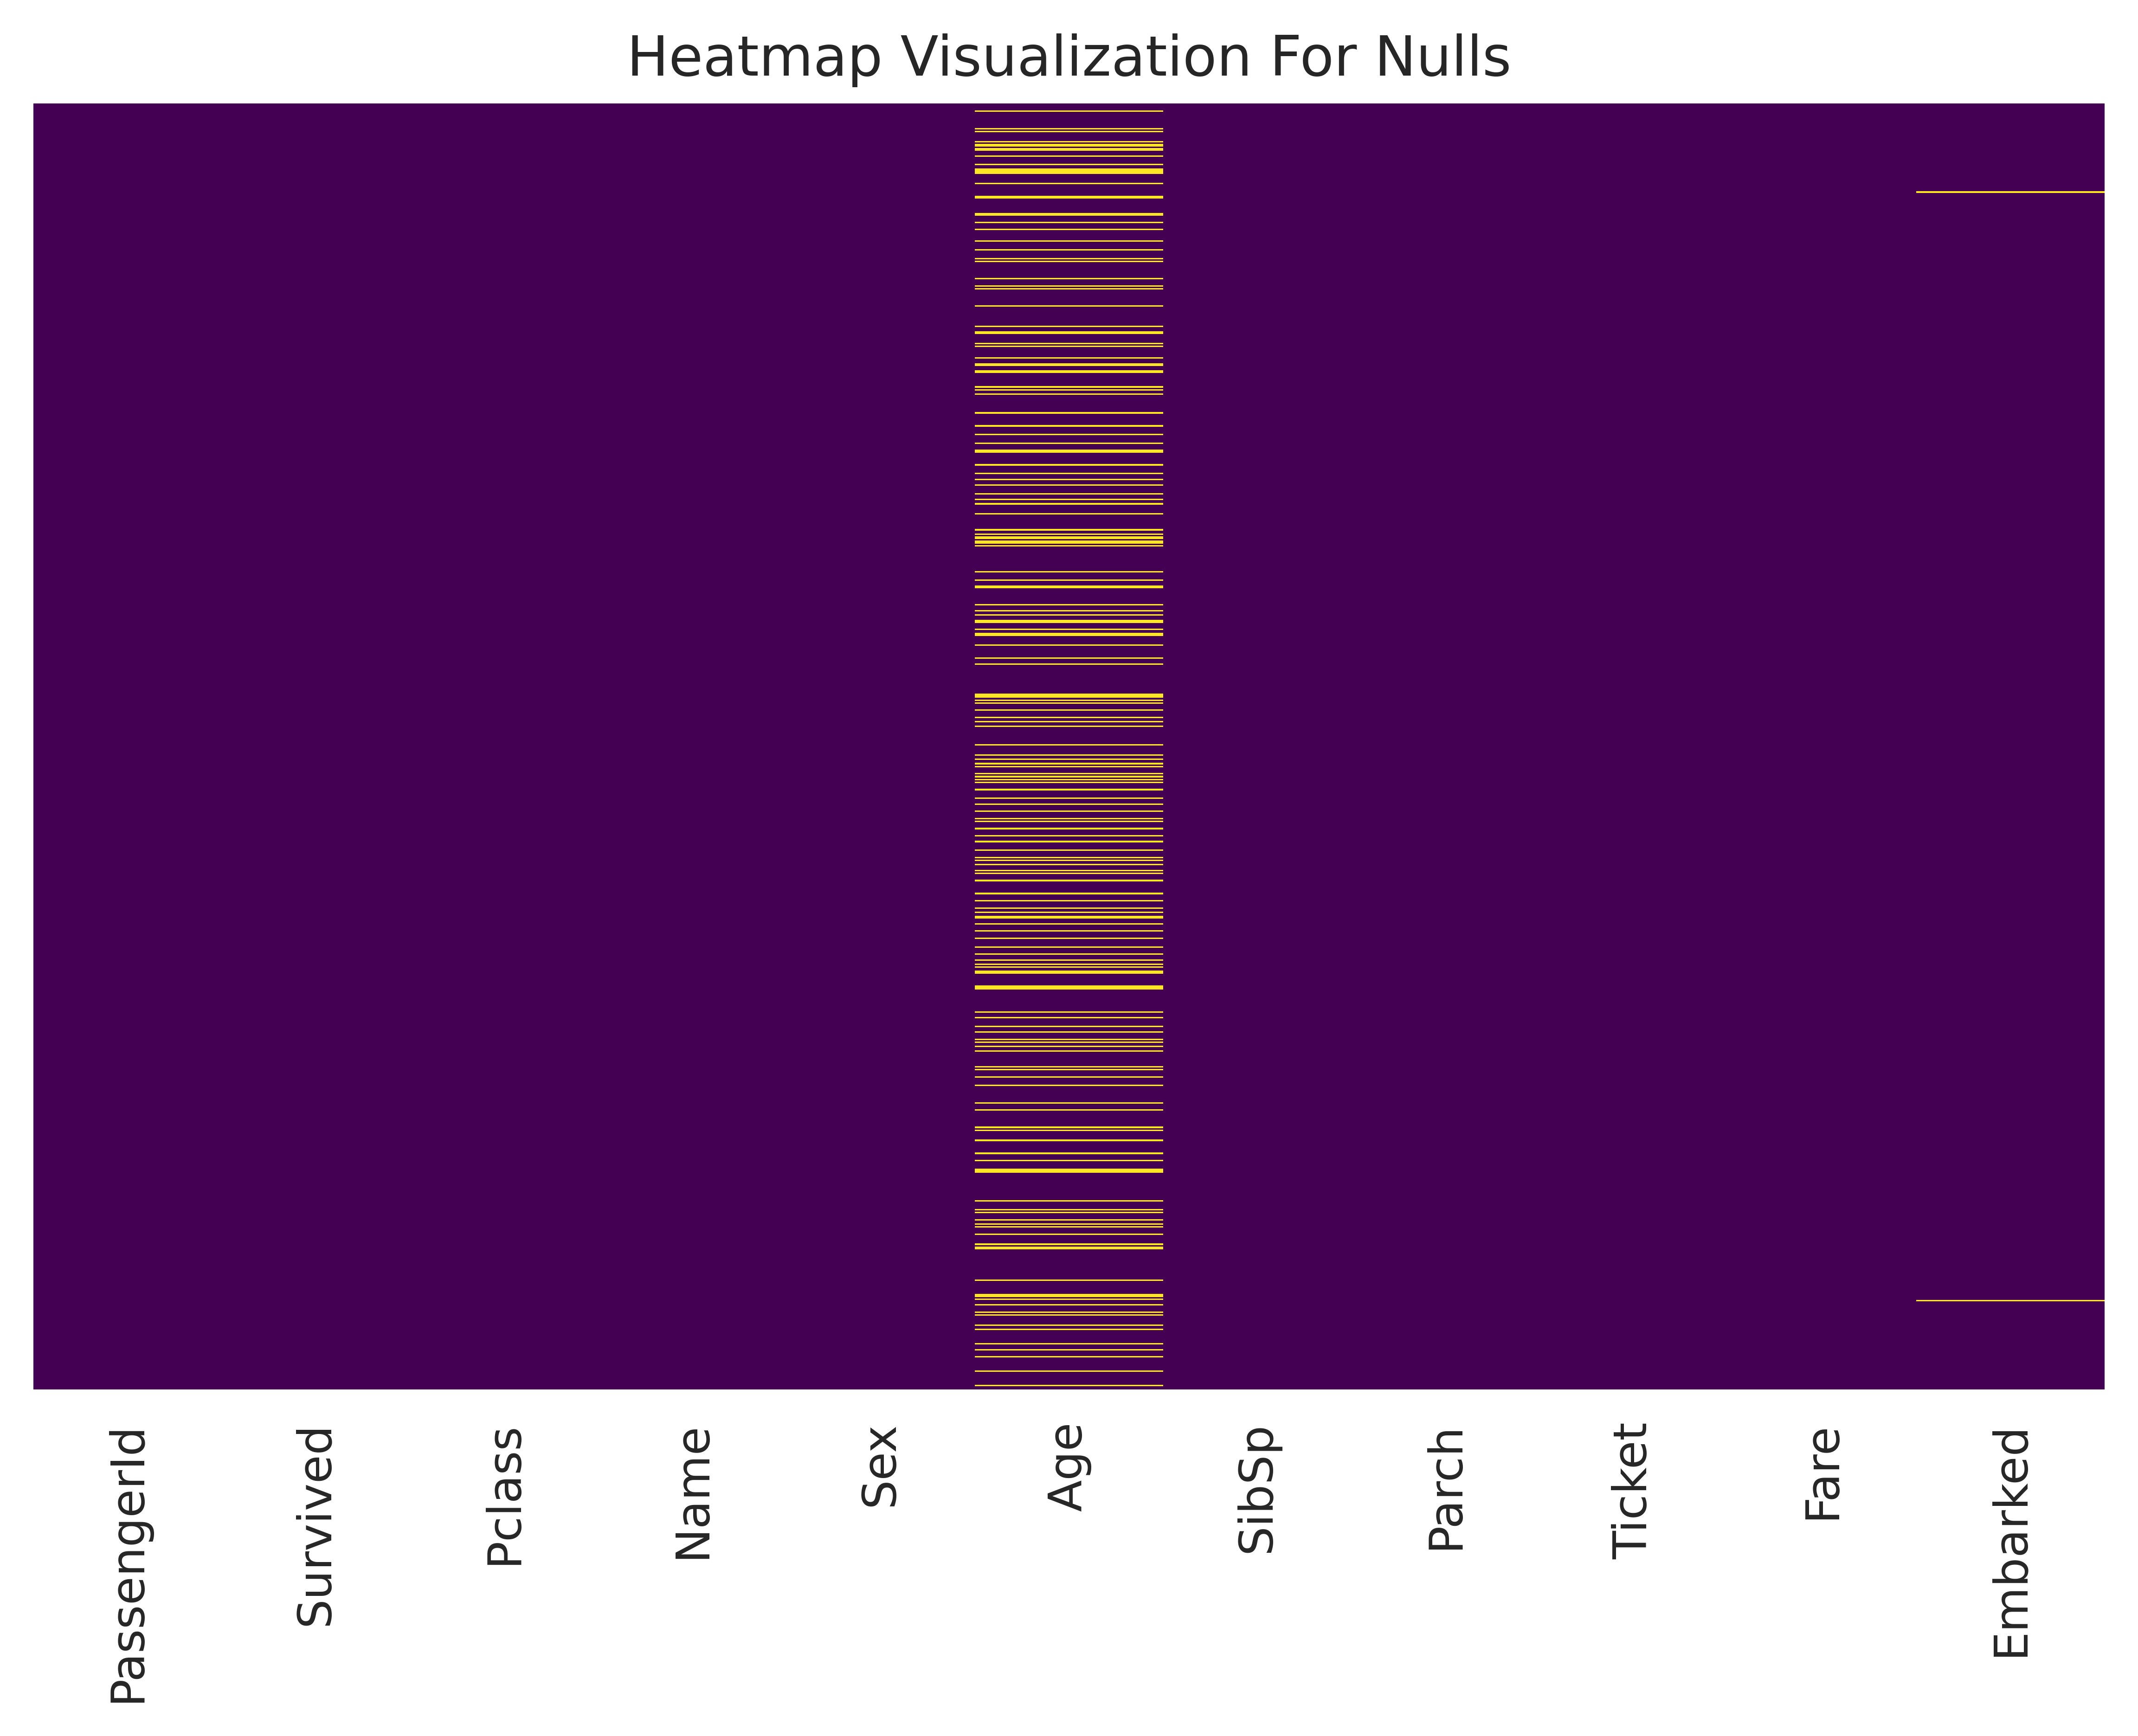

In [16]:
plt.figure(figsize=(8,5))
plt.title('Heatmap Visualization For Nulls')
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Dealing Nulls in 'Age' Column

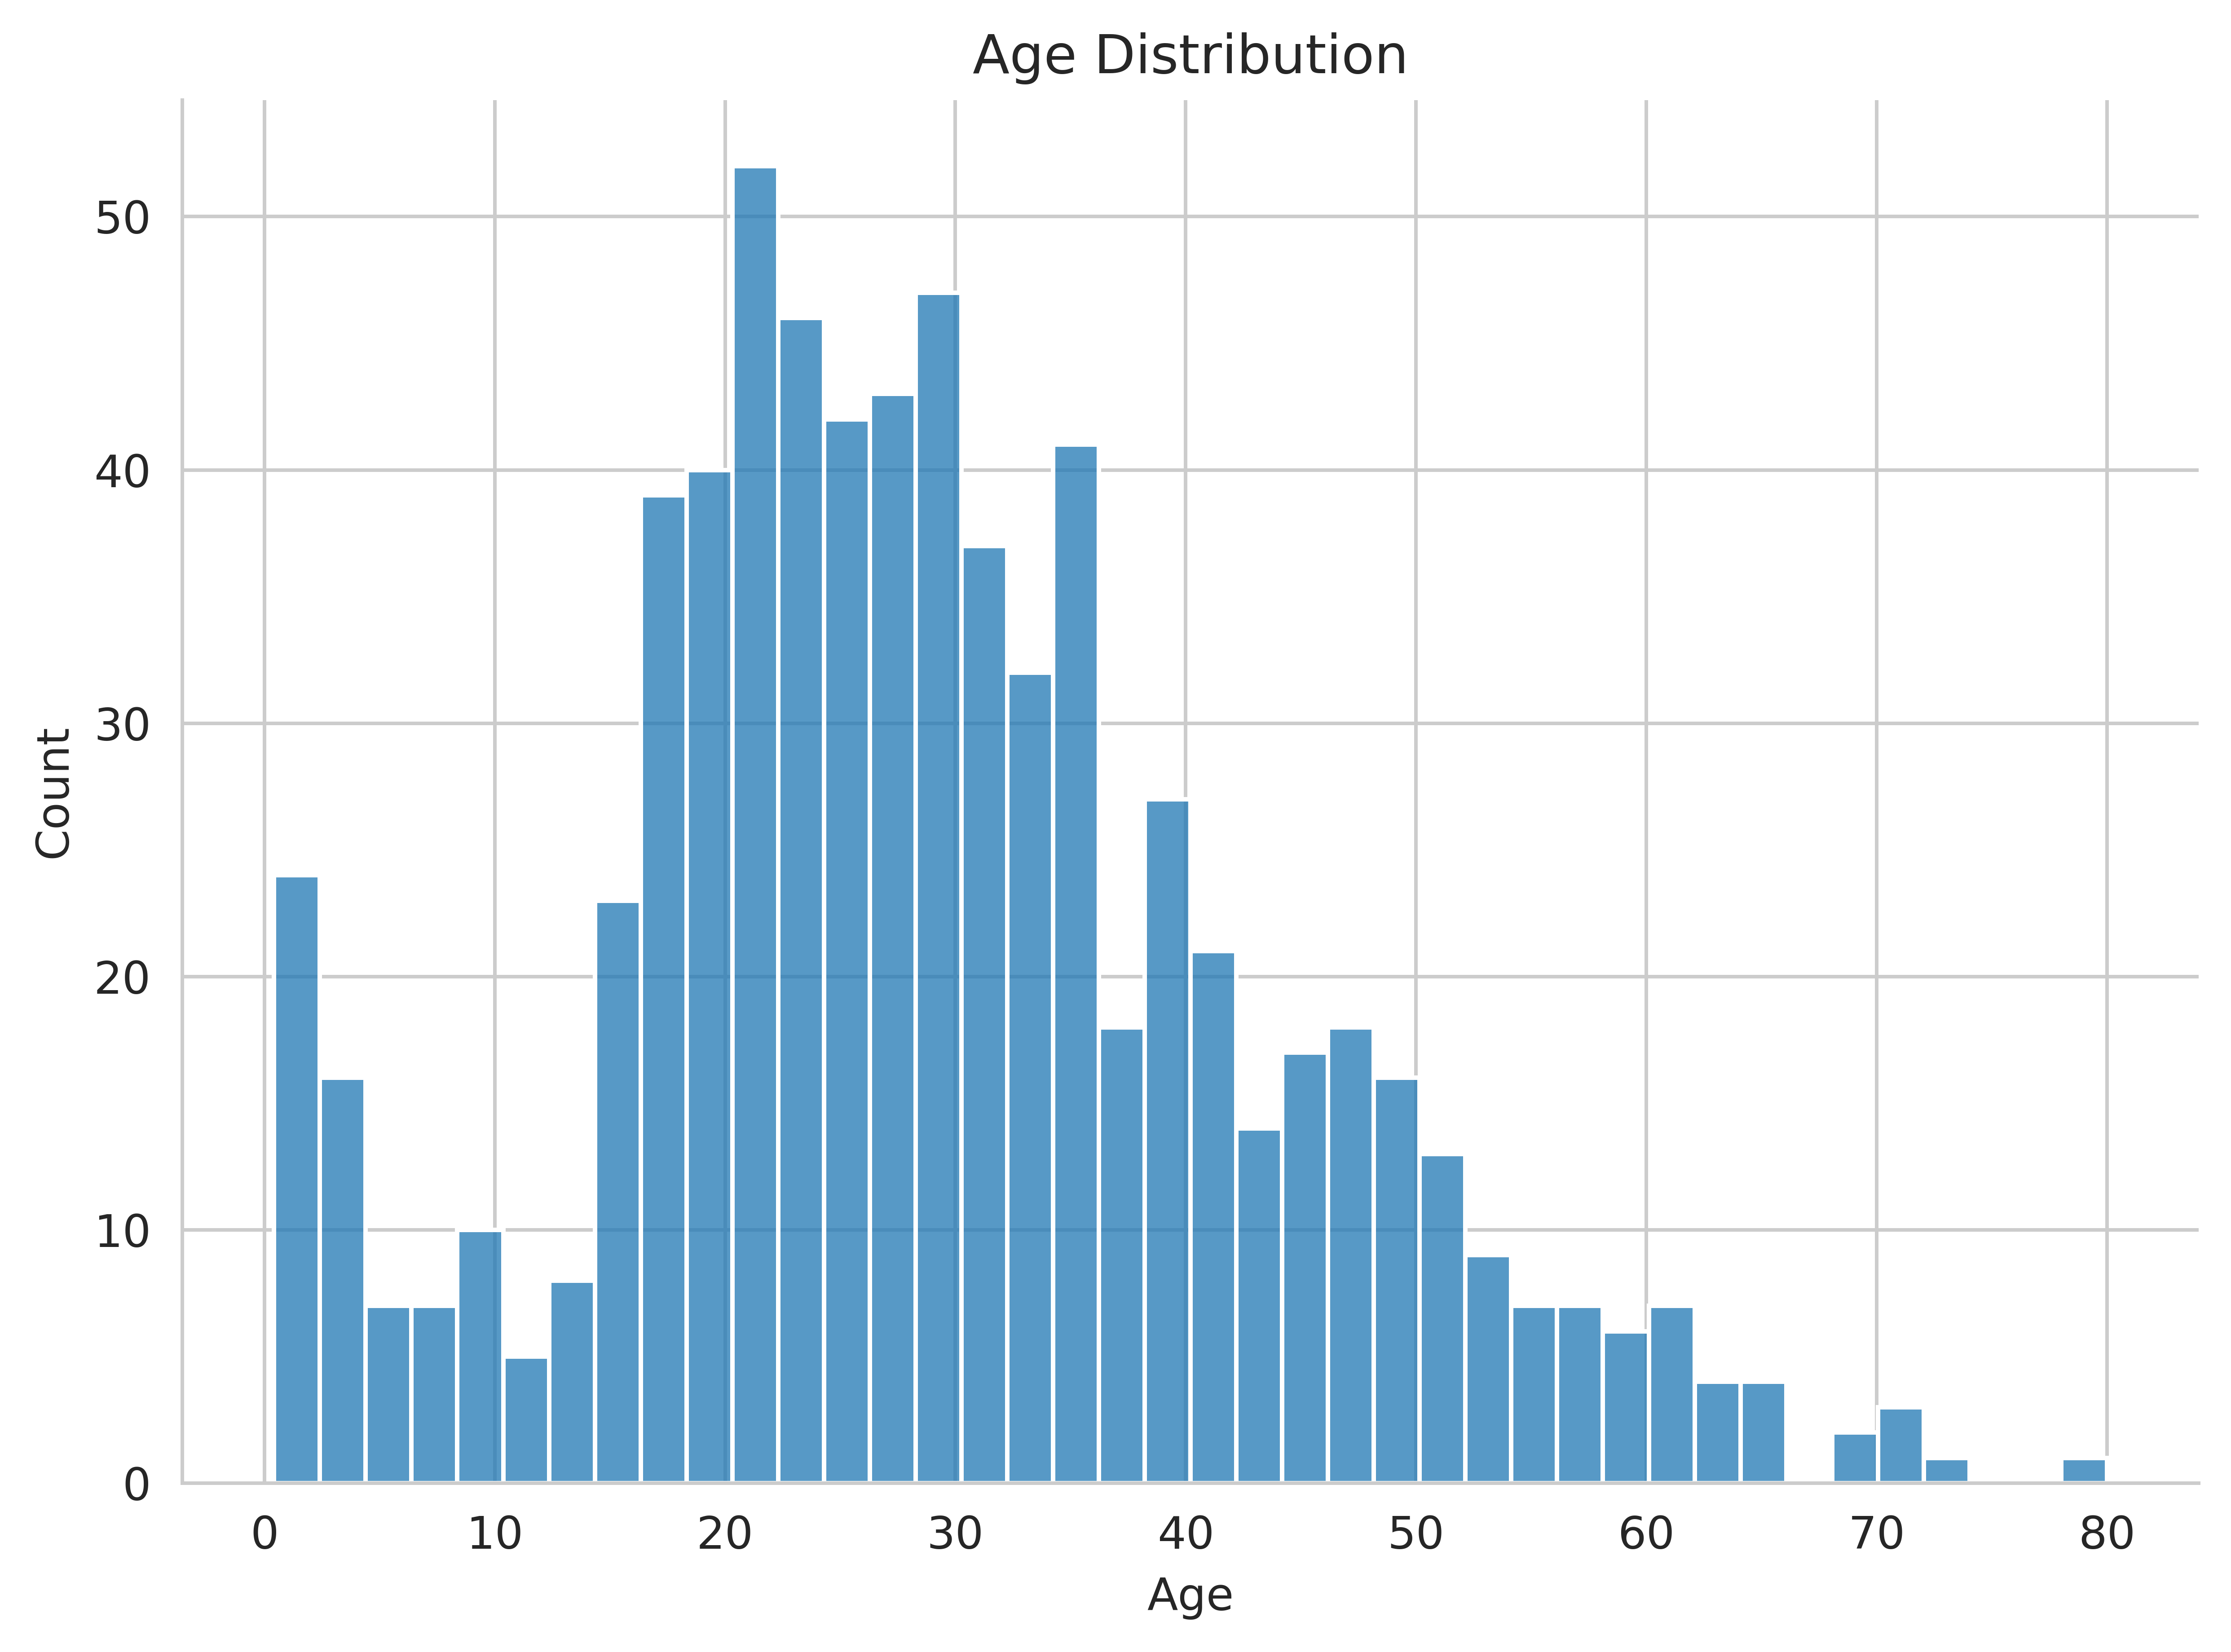

In [17]:
sns.displot(titanic_train['Age'].dropna(), bins=40, aspect=1.4)
plt.title("Age Distribution")
plt.show()

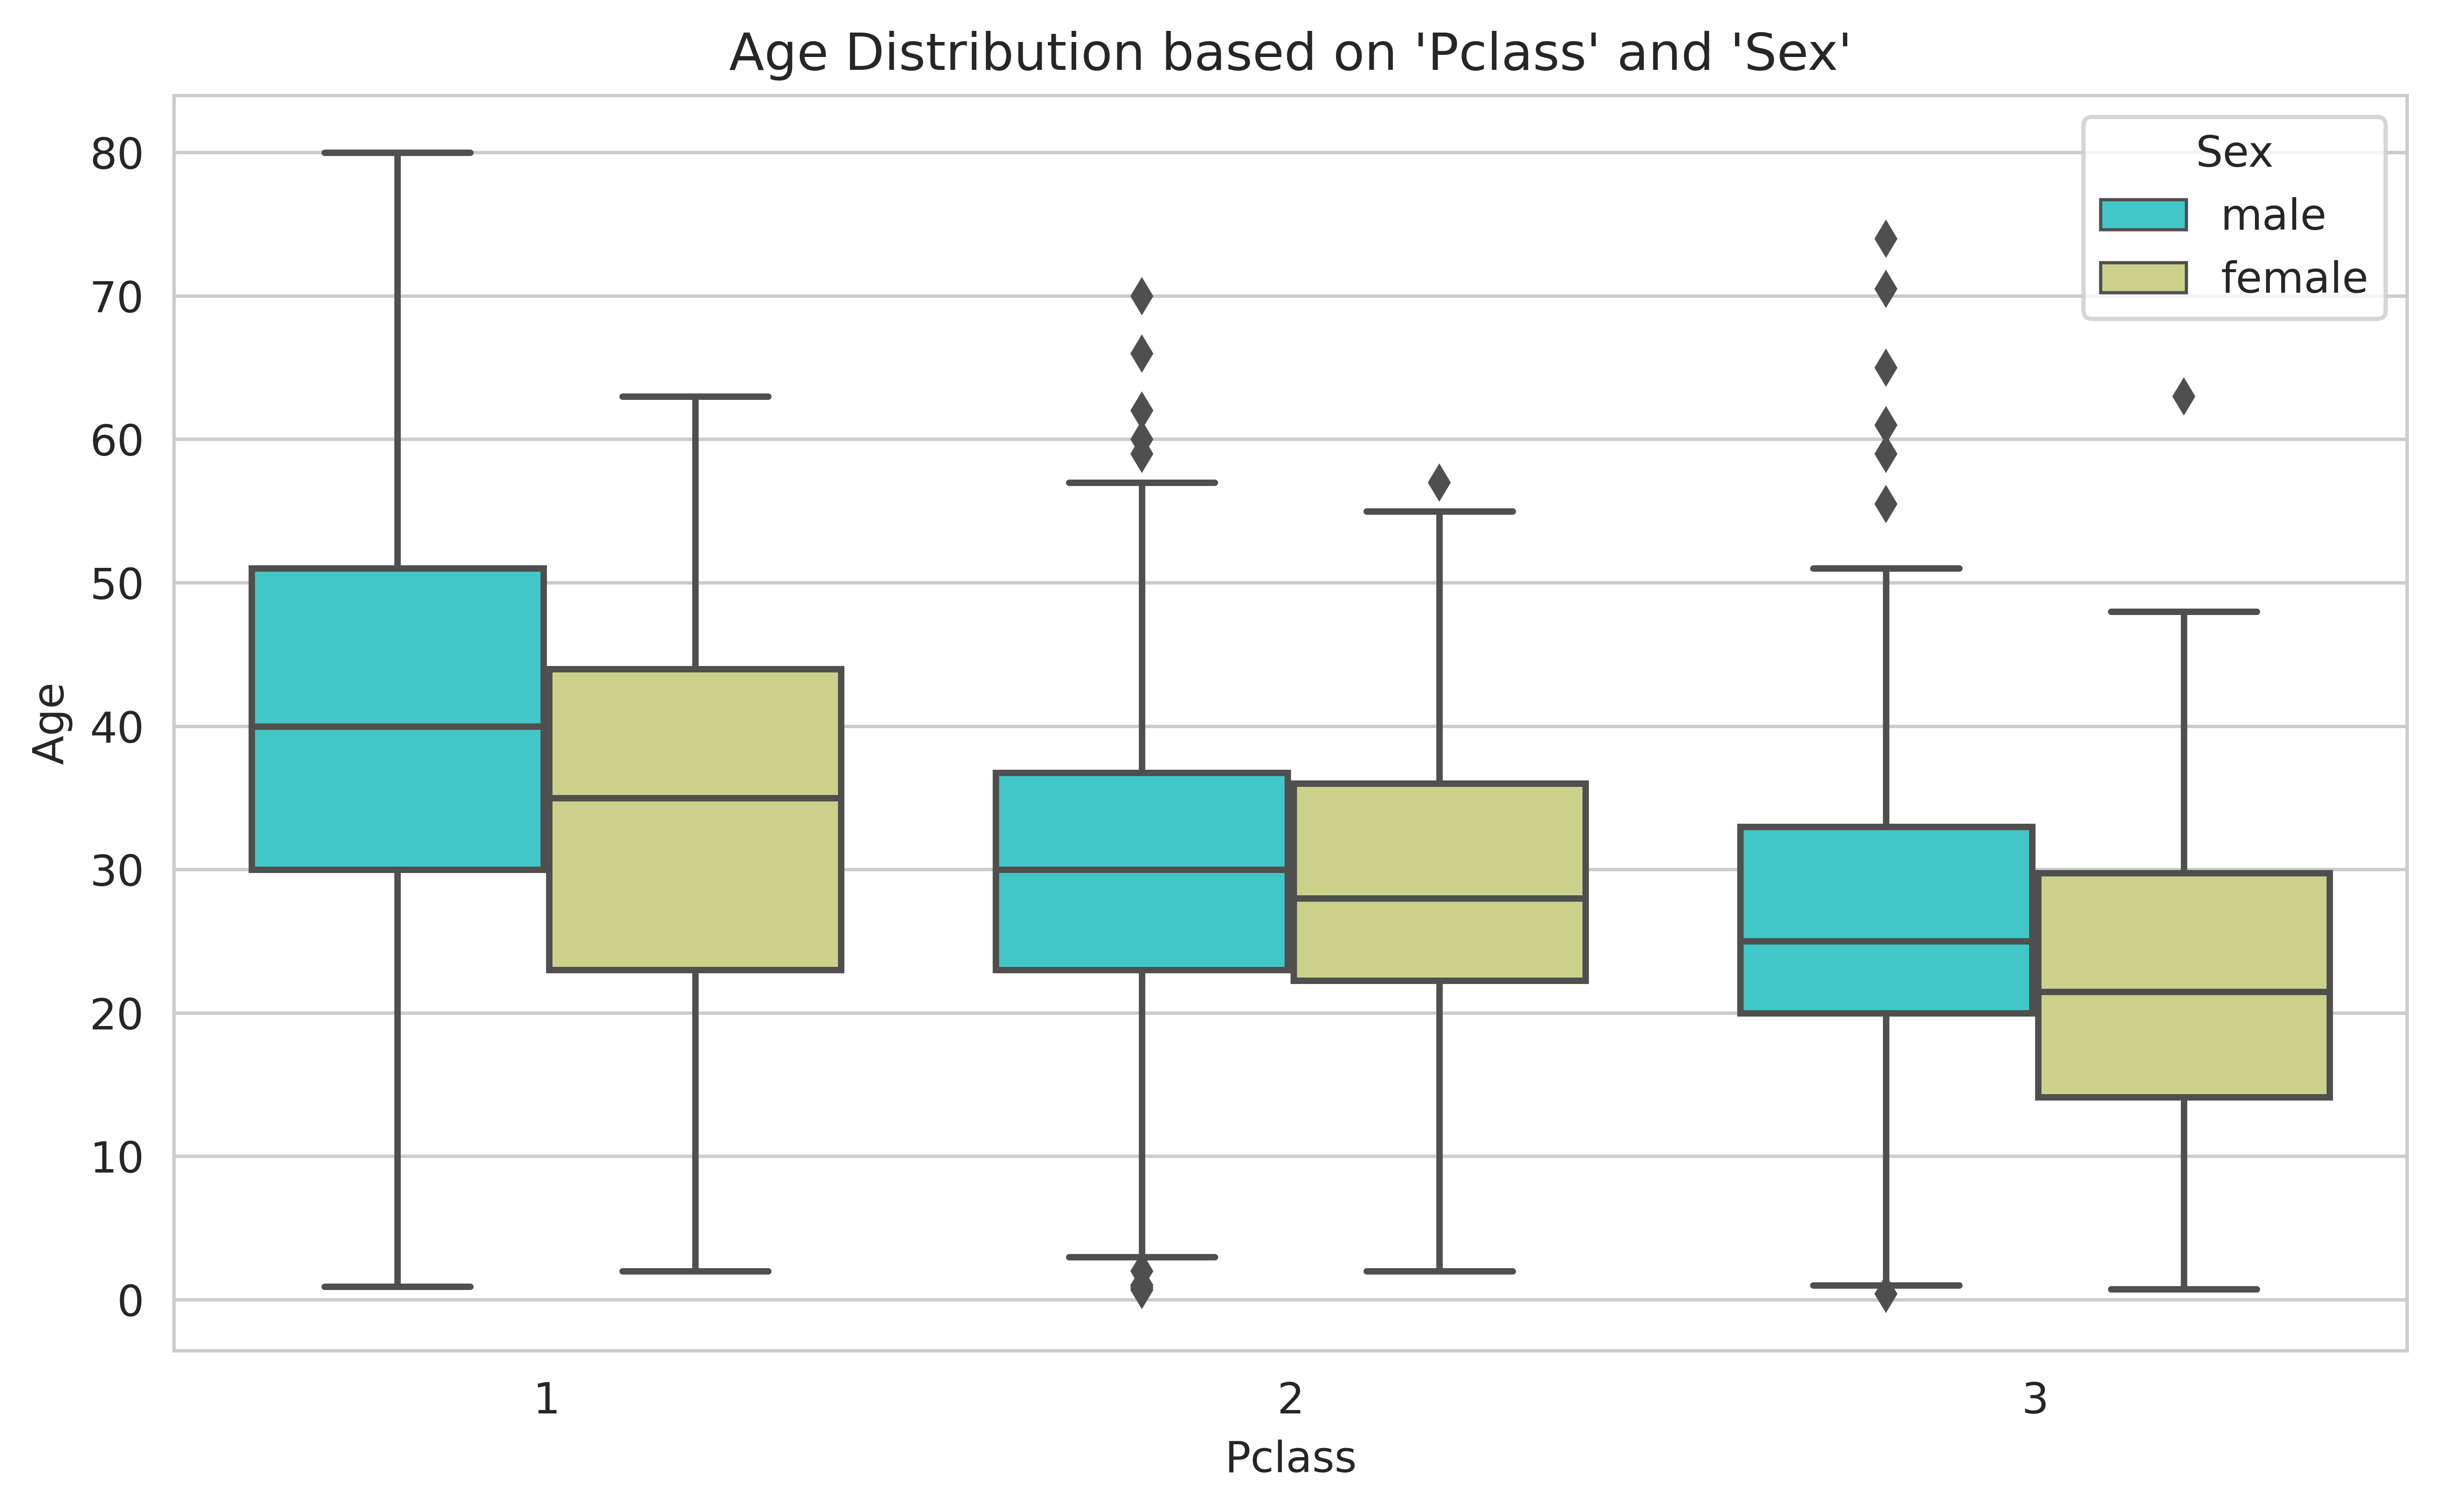

In [18]:
plt.figure(figsize=(8,5))
plt.title("Age Distribution based on 'Pclass' and 'Sex'")
sns.boxplot(x='Pclass',y='Age', hue='Sex', data=titanic_train, palette='rainbow')
plt.tight_layout()
plt.show()

**Observations:**
- The age distribution of passengers have clearly visible outliers with respect to their 'Pclass'.
- Higher 'Pclass' passengers are older.
- Males have higher central value of Age than Females.

In [19]:
# Median Age of Passengers based on their 'Pclass' and 'Sex'
print("Median age of Male Passengers in First Class: " + 
      str(titanic_train[(titanic_train['Pclass'] == 1) & (titanic_train['Sex'] == 'male')]['Age'].median()))
print("Median age of Female Passengers in First Class: " + 
      str(titanic_train[(titanic_train['Pclass'] == 1) & (titanic_train['Sex'] == 'female')]['Age'].median()))
print("Median age of Male Passengers in Second Class: " + 
      str(titanic_train[(titanic_train['Pclass'] == 2) & (titanic_train['Sex'] == 'male')]['Age'].median()))
print("Median age of Female Passengers in Second Class: " + 
      str(titanic_train[(titanic_train['Pclass'] == 2) & (titanic_train['Sex'] == 'female')]['Age'].median()))
print("Median age of Male Passengers in Third Class: " + 
      str(titanic_train[(titanic_train['Pclass'] == 3) & (titanic_train['Sex'] == 'male')]['Age'].median()))
print("Median age of Female Passengers in Third Class: " + 
      str(titanic_train[(titanic_train['Pclass'] == 3) & (titanic_train['Sex'] == 'female')]['Age'].median()))

Median age of Male Passengers in First Class: 40.0
Median age of Female Passengers in First Class: 35.0
Median age of Male Passengers in Second Class: 30.0
Median age of Female Passengers in Second Class: 28.0
Median age of Male Passengers in Third Class: 25.0
Median age of Female Passengers in Third Class: 21.5


In [20]:
# Let's create an Median Imputation Function 
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    if pd.isnull(Age):
        if Pclass == 1 and Sex == 'male':
            return int(titanic_train['Age'][(titanic_train['Pclass'] == 1) & (titanic_train['Sex'] == 'male')].median())
        elif Pclass == 1 and Sex == 'female':
            return int(titanic_train['Age'][(titanic_train['Pclass'] == 1) & (titanic_train['Sex'] == 'female')].median())
        elif Pclass == 2 and Sex == 'male':
            return int(titanic_train['Age'][(titanic_train['Pclass'] == 2) & (titanic_train['Sex'] == 'male')].median())
        elif Pclass == 2 and Sex == 'female':
            return int(titanic_train['Age'][(titanic_train['Pclass'] == 2) & (titanic_train['Sex'] == 'female')].median())
        elif Pclass == 3 and Sex == 'male':
            return int(titanic_train['Age'][(titanic_train['Pclass'] == 3) & (titanic_train['Sex'] == 'male')].median())
        elif Pclass == 3 and Sex == 'female':
            return int(titanic_train['Age'][(titanic_train['Pclass'] == 3) & (titanic_train['Sex'] == 'female')].median())
    else:
        return Age    # If there is Actual 'Age' is present

In [21]:
for dataset in combine:
    dataset['Age'] = dataset[['Age', 'Pclass', 'Sex']].apply(impute_age, axis=1)

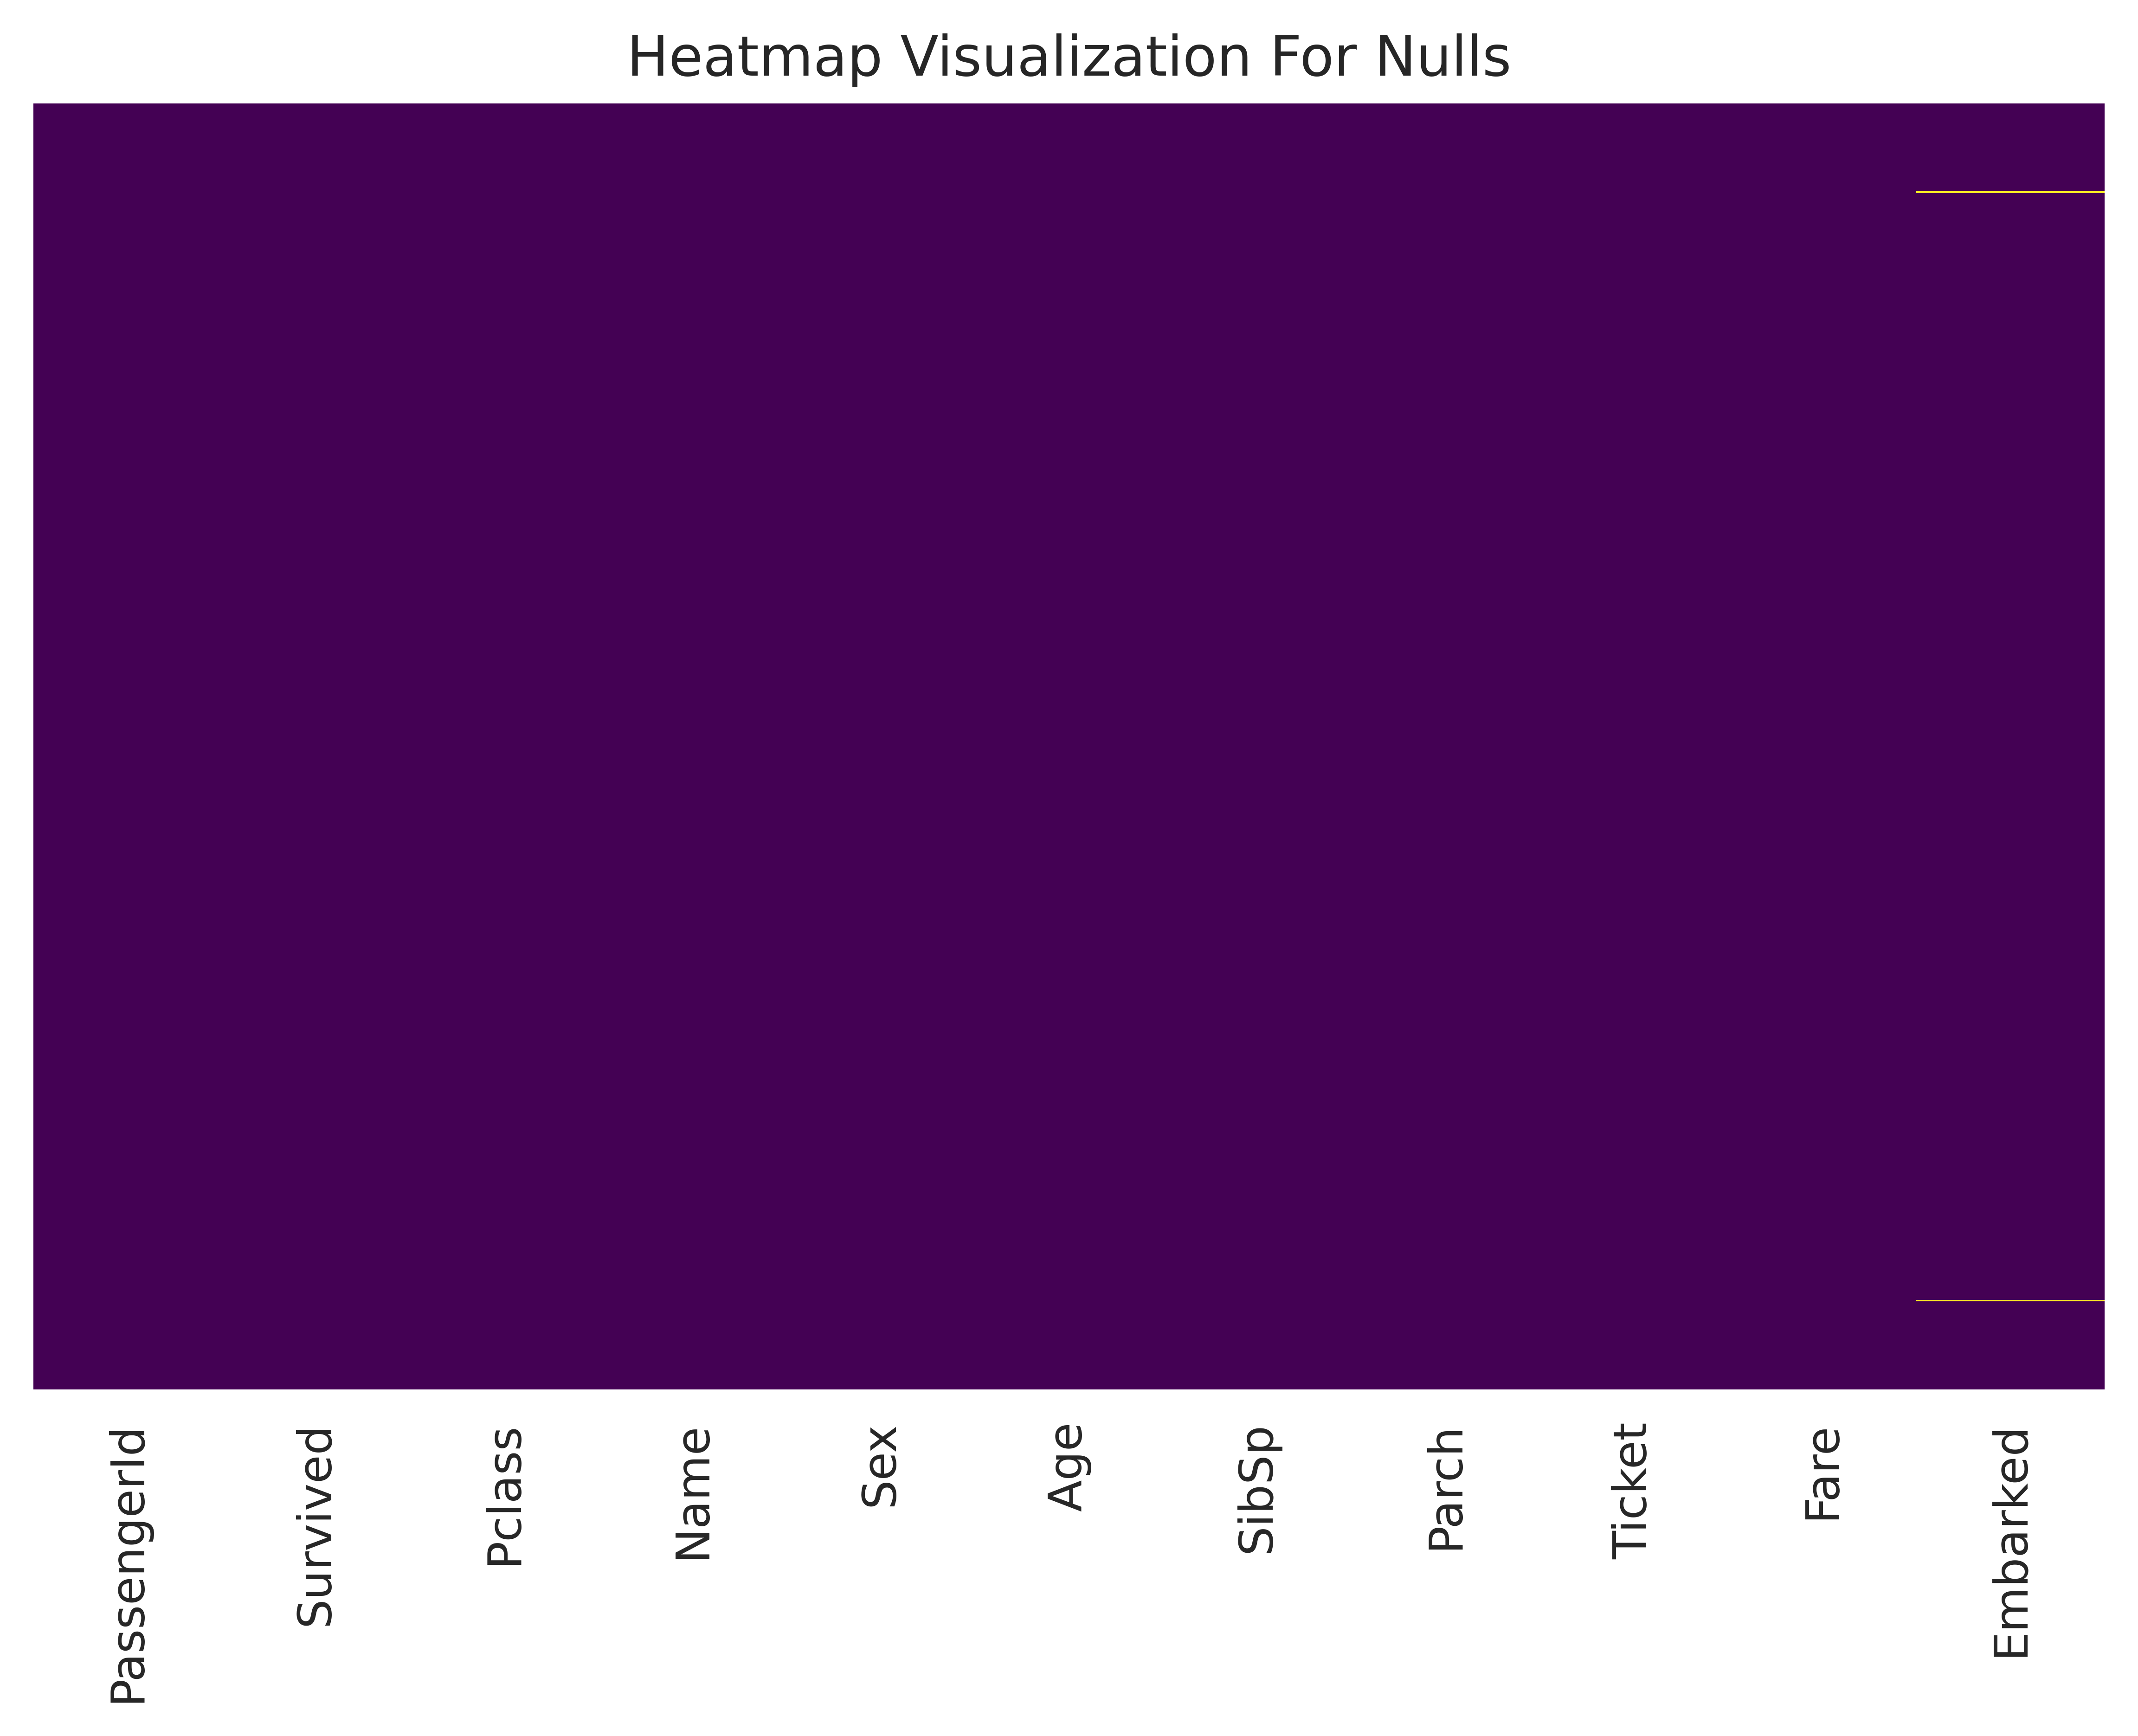

In [22]:
# Again Checking 'Age' Column
plt.figure(figsize=(8,5))
plt.title('Heatmap Visualization For Nulls')
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Dealing Nulls in 'Embarked' Column

In [23]:
titanic_train[titanic_train['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN

- *'Embarked' Column have only two Nulls, therefore we fill them by mode.*

In [24]:
# Port from which most passengers are embarked
freq_port = titanic_train['Embarked'].dropna().mode()[0]
freq_port

'S'

In [25]:
for dataset in combine:
    dataset['Embarked'].fillna(freq_port, inplace=True)

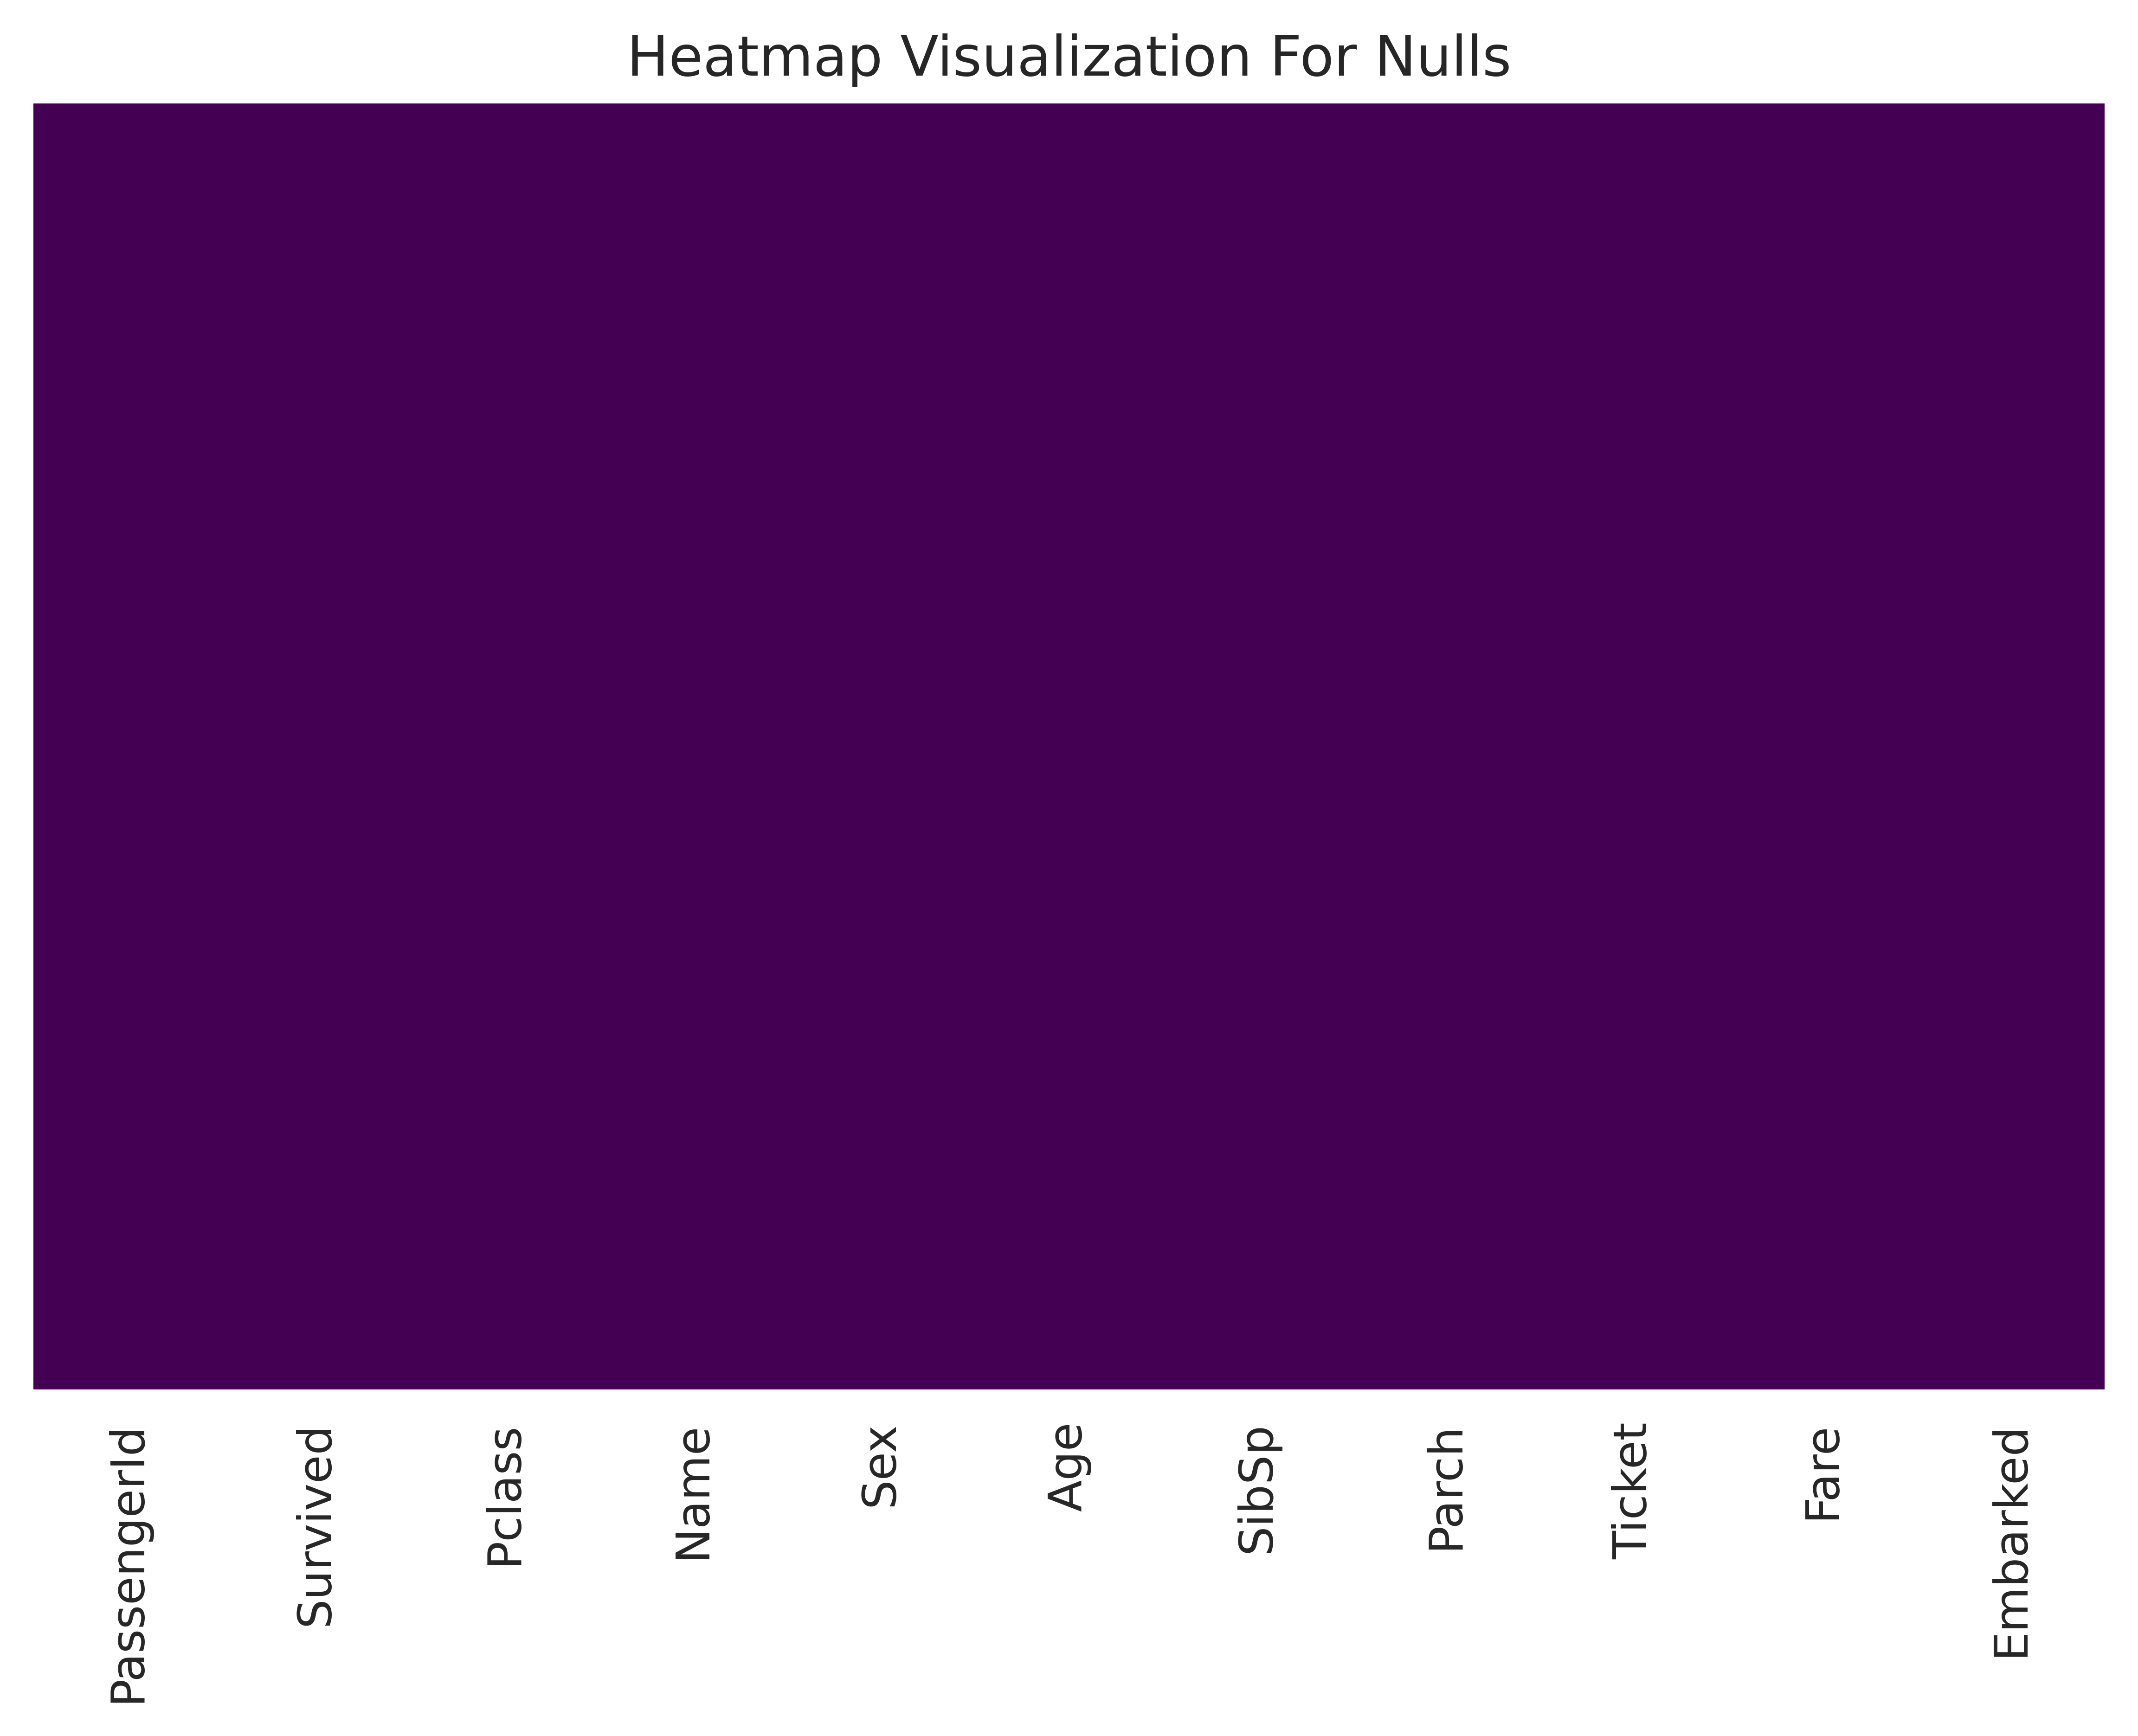

In [26]:
plt.figure(figsize=(8,5))
plt.title('Heatmap Visualization For Nulls')
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
# Cleaned

### A Null in Test Dataset 'Fare' Feature

In [27]:
titanic_test[titanic_test['Fare'].isnull()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Embarked  
152   NaN        S

In [28]:
titanic_test.loc[(titanic_test['Fare'].isnull()) & (titanic_test['Pclass'] == 3), 'Fare'] = \
titanic_train[titanic_train['Pclass'] == 3]['Fare'].median()

In [29]:
titanic_test.isnull().sum()
# No Nulls in Test Dataset

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Exploratory Data Analysis

### Count of Survived and Not Survived Passengers

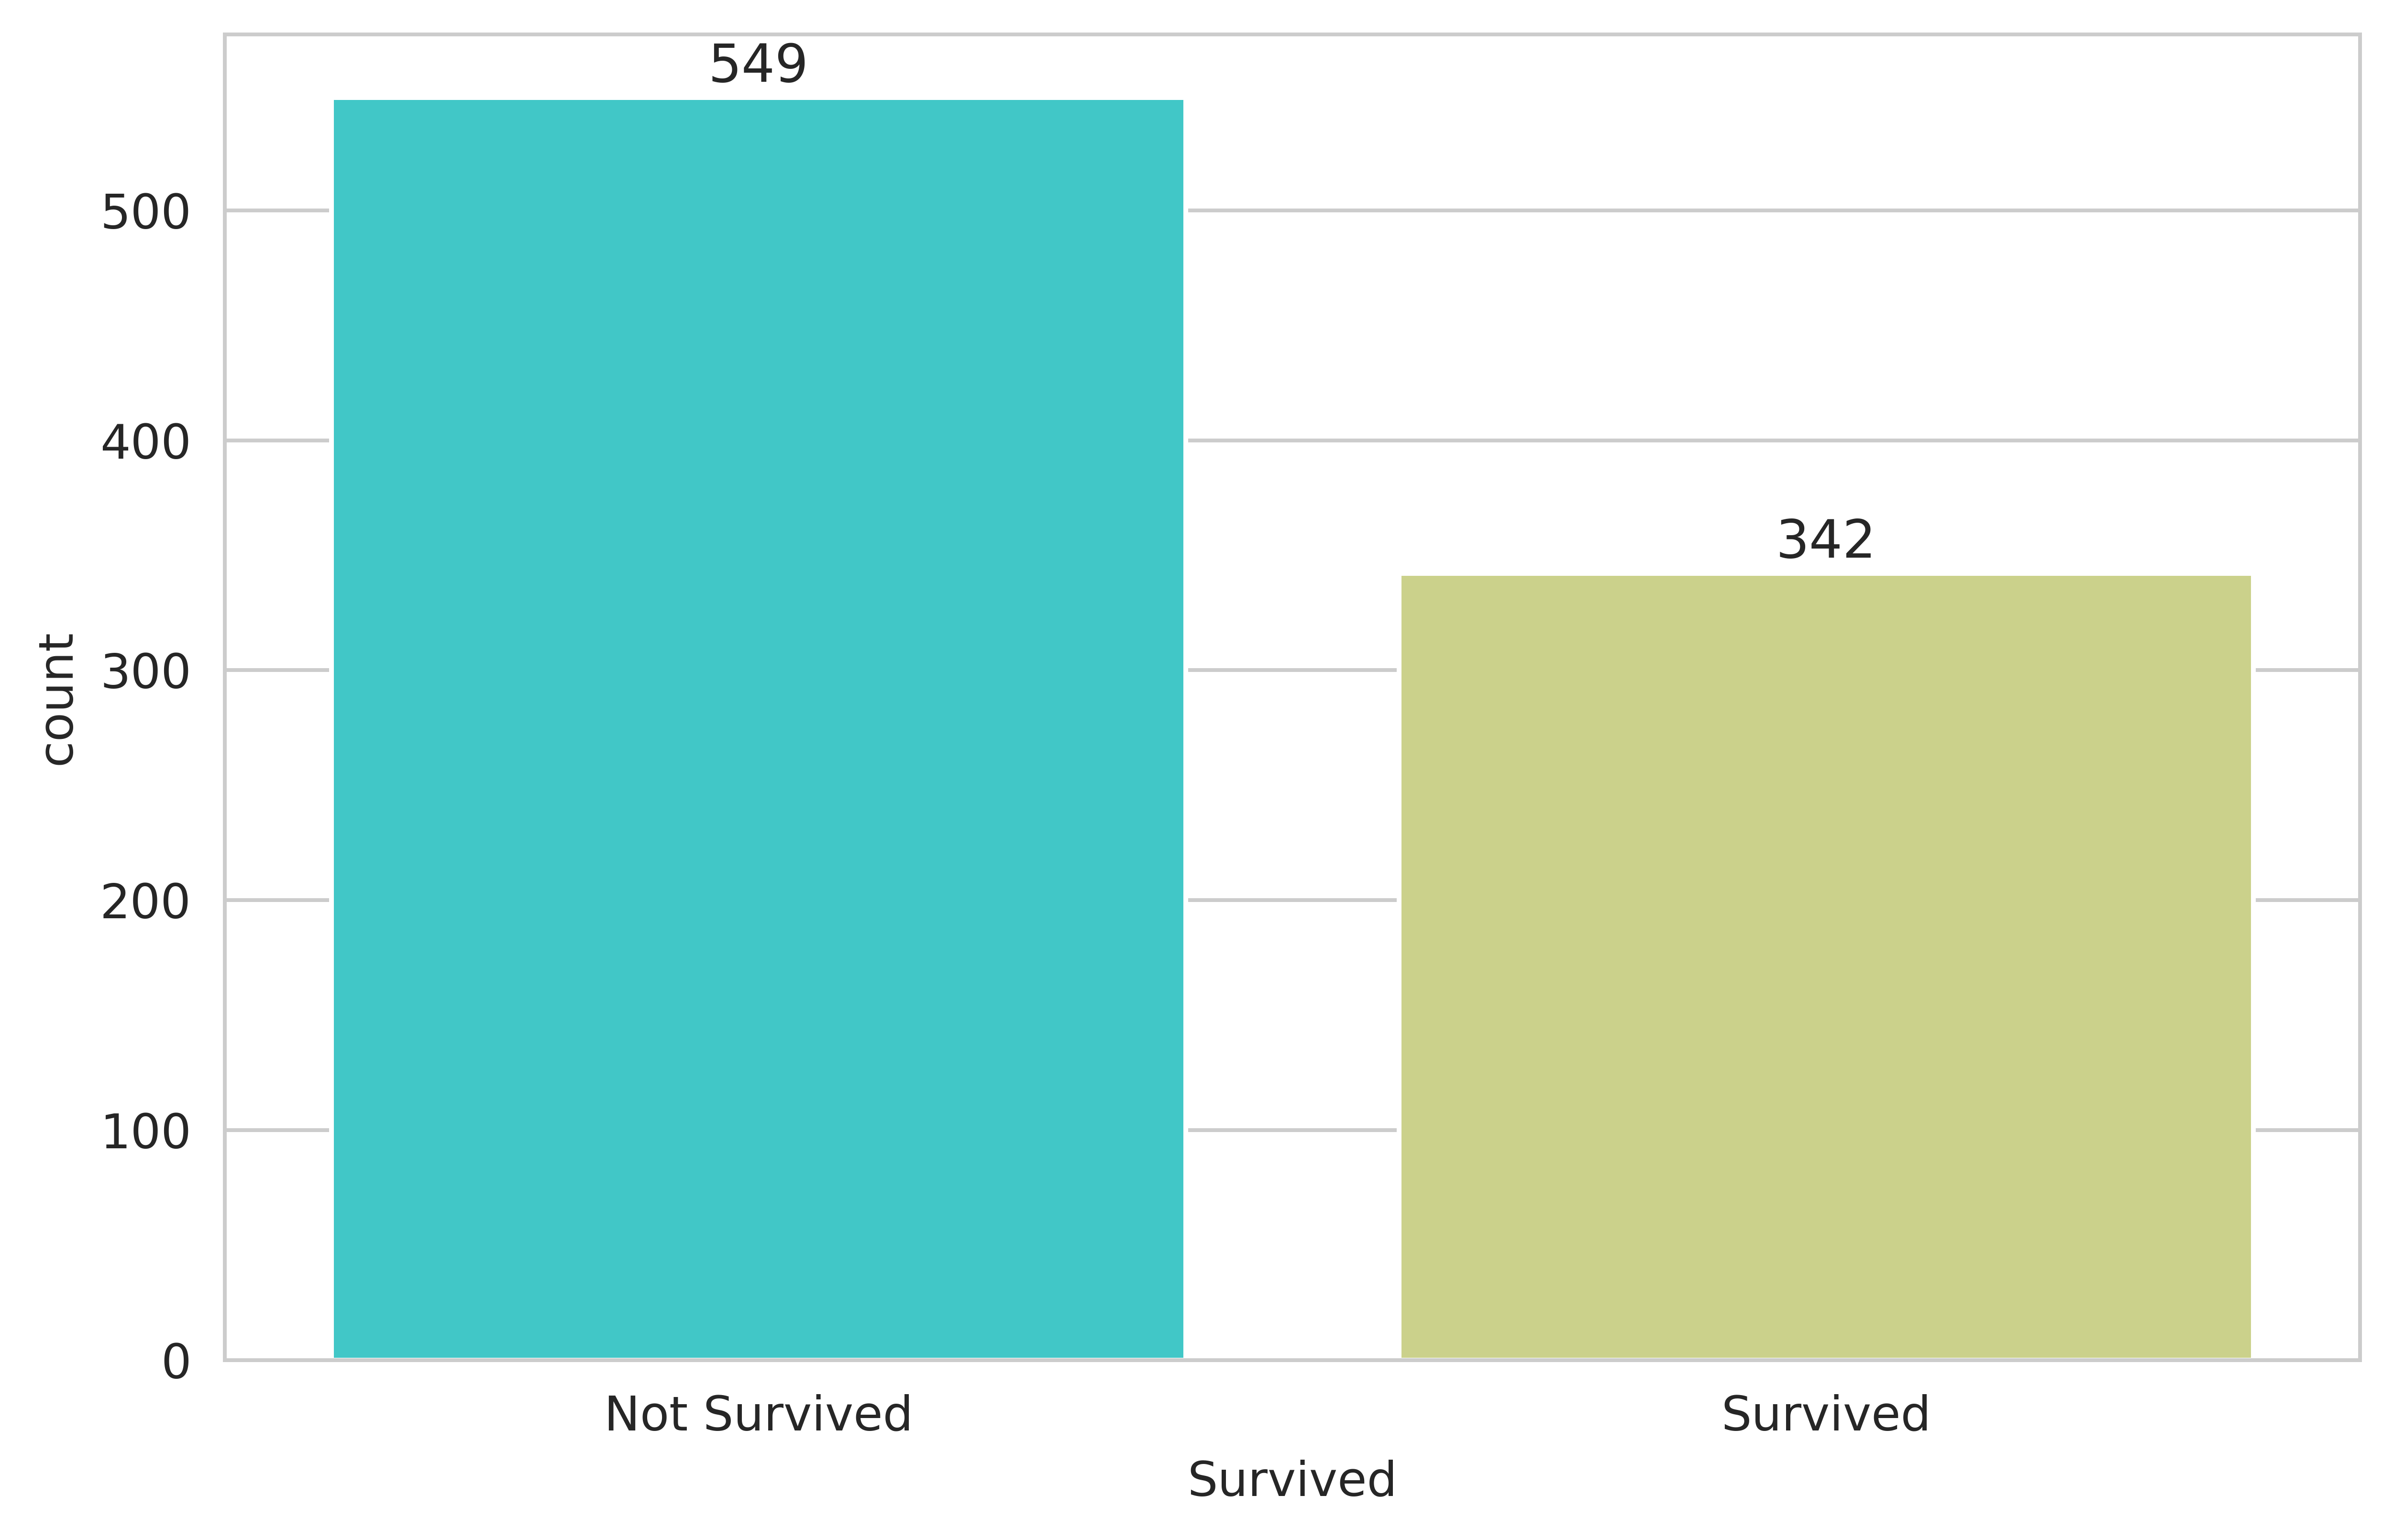

In [30]:
plt.figure(figsize=(8,5))
c1 = sns.countplot(x='Survived', data=titanic_train, palette='rainbow')
c1.bar_label(c1.containers[0], padding=1, size=11)
plt.xticks(ticks=[0,1] ,labels=['Not Survived', 'Survived'])
plt.show()

In [31]:
# Count
survival_count = (titanic_train.groupby('Survived')['PassengerId'].count().to_frame()
                  .rename(columns = {'PassengerId' : 'Count'}))
survival_count.index = survival_count.index.map({0: 'Not Survived', 1: 'Survived'})
survival_count

Count
Survived           
Not Survived    549
Survived        342

### Survival based on Gender

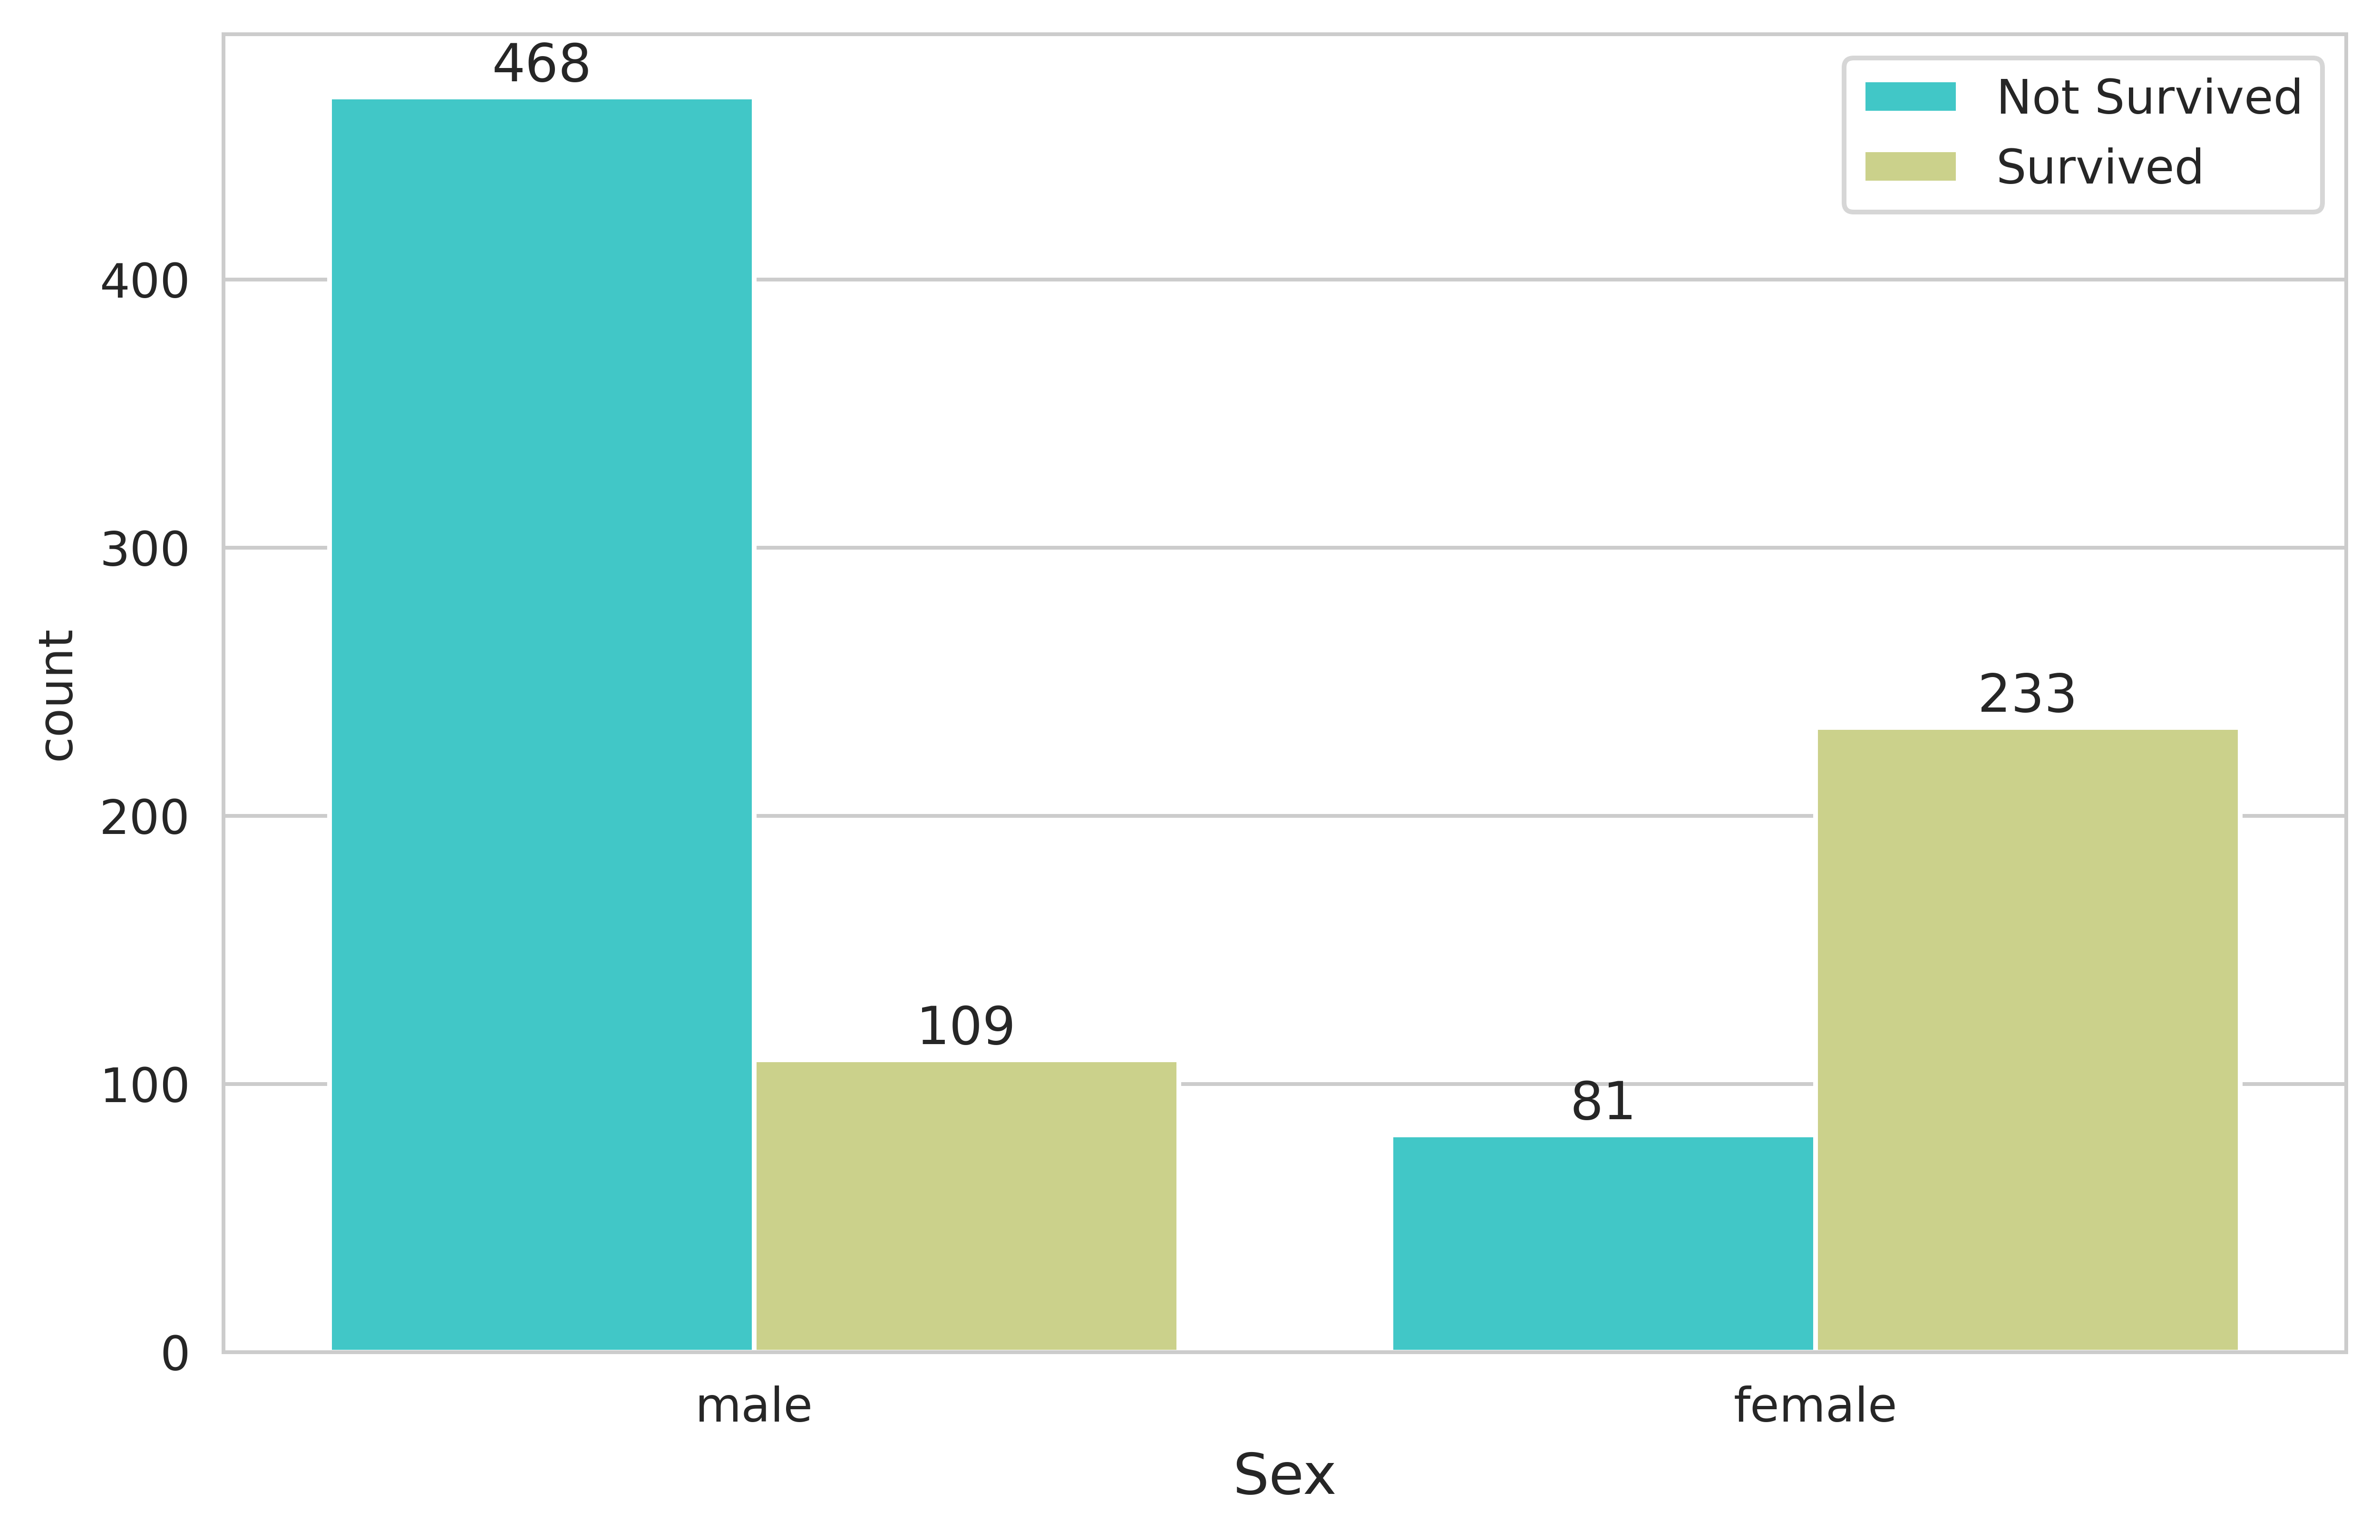

In [32]:
plt.figure(figsize=(8,5))
c1 = sns.countplot(x='Sex', hue='Survived', data=titanic_train,  palette='rainbow')
c1.bar_label(c1.containers[0], padding=1, size=11)
c1.bar_label(c1.containers[1], padding=1, size=11)
plt.legend(labels=['Not Survived', 'Survived'])
plt.xlabel('Sex', fontsize=12)
plt.show()

In [33]:
# Count
sex_survival_count = (titanic_train.groupby(['Sex', 'Survived'])['PassengerId'].count().unstack(fill_value=0).rename_axis(None, axis=1))
sex_survival_count.rename(columns={0: 'Not Survived', 1: 'Survived'}, inplace=True)
sex_survival_count['Total'] = sex_survival_count.sum(axis=1)
sex_survival_count

Not Survived  Survived  Total
Sex                                  
female            81       233    314
male             468       109    577

In [34]:
print("Number of times Males boarded than Females: " + 
      str(titanic_train['Sex'].value_counts().loc['male'] / titanic_train['Sex'].value_counts().loc['female']))

Number of times Males boarded than Females: 1.8375796178343948


In [35]:
# Survival rate
titanic_train[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

Survived
Sex             
female  0.742038
male    0.188908

**Observation:**
- Females got more chance to live rather than Males, even taking into account that there were more Males on the Ship than Females.

### Survival based on Pclass (Passenger Class)

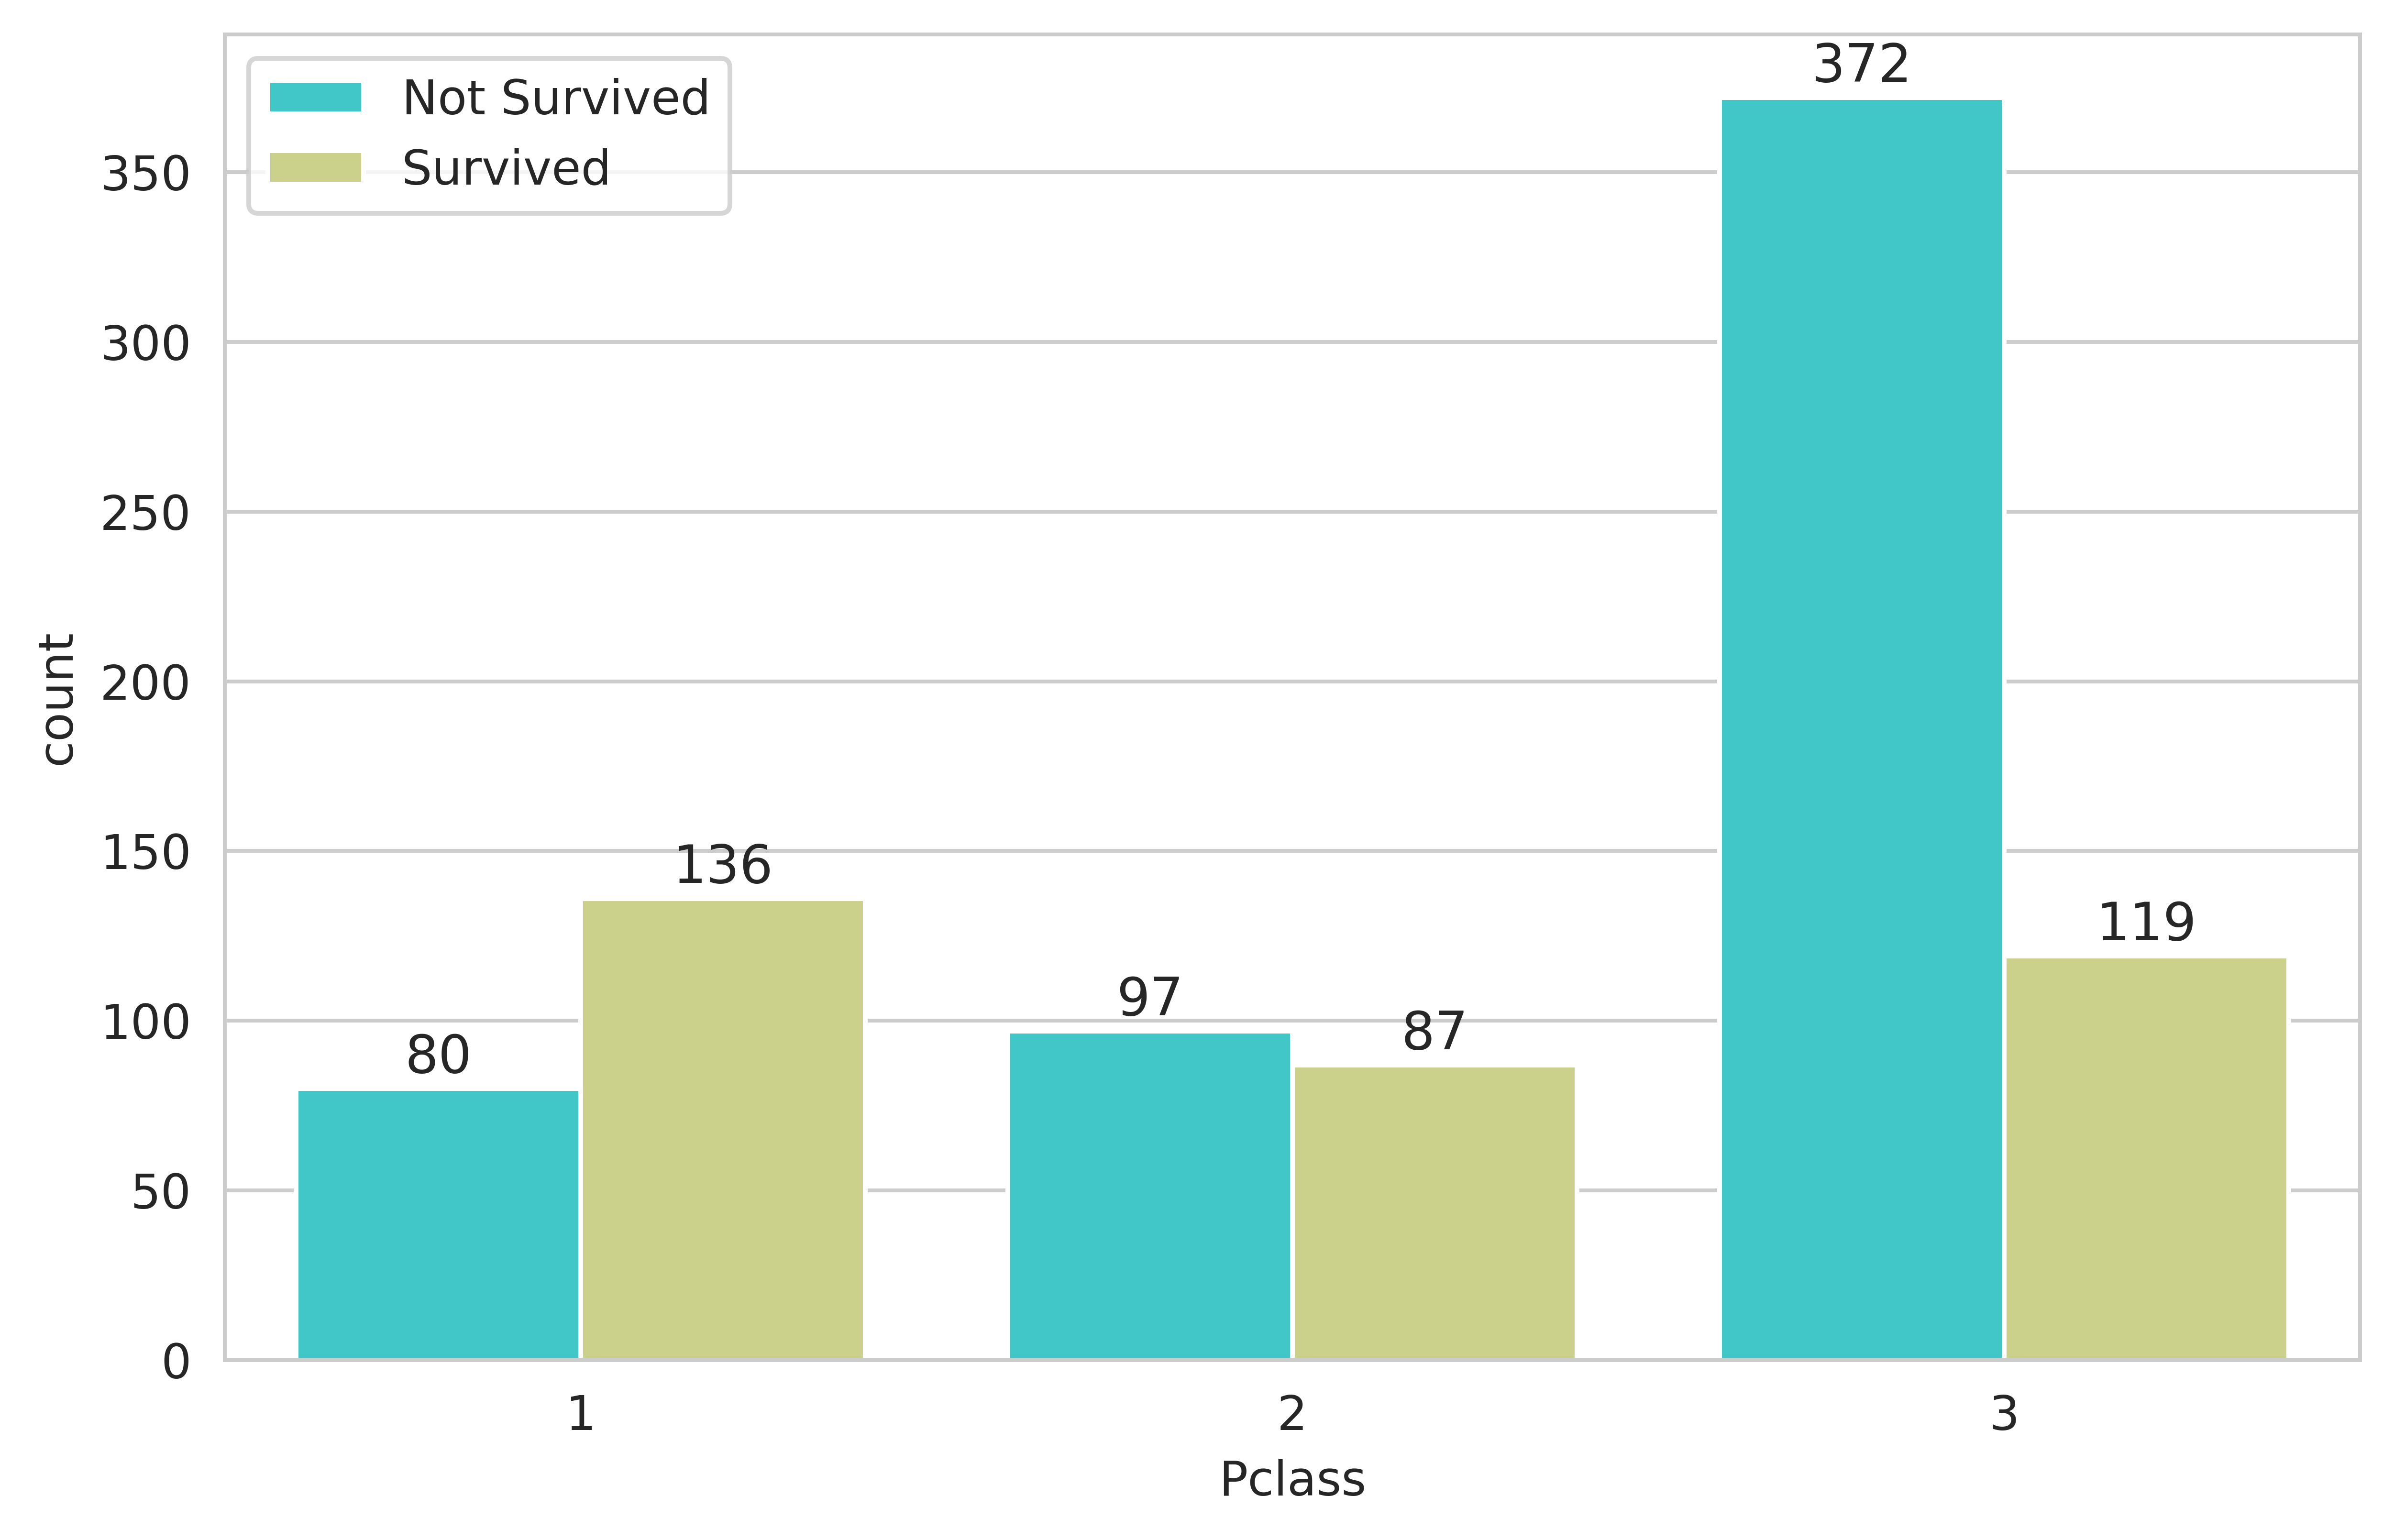

In [36]:
plt.figure(figsize=(8,5))
c1 = sns.countplot(data=titanic_train, x='Pclass', hue='Survived', palette='rainbow')
c1.bar_label(c1.containers[0], padding=1, size=11)
c1.bar_label(c1.containers[1], padding=1, size=11)
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

In [37]:
# Count
pclass_survival_count = (titanic_train.groupby(['Pclass', 'Survived'])['PassengerId'].count()
                        .unstack(fill_value=0).rename_axis(None, axis=1))
pclass_survival_count.rename(columns={0: 'Not Survived', 1: 'Survived'}, inplace=True)
pclass_survival_count['Total'] = pclass_survival_count.sum(axis=1)
pclass_survival_count

Not Survived  Survived  Total
Pclass                               
1                 80       136    216
2                 97        87    184
3                372       119    491

In [38]:
# Survival Rate
titanic_train[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

**Observation:**
- Higher 'Pclass' increase chance of being survived.

### Survival based on 'Pclass' and 'Sex'

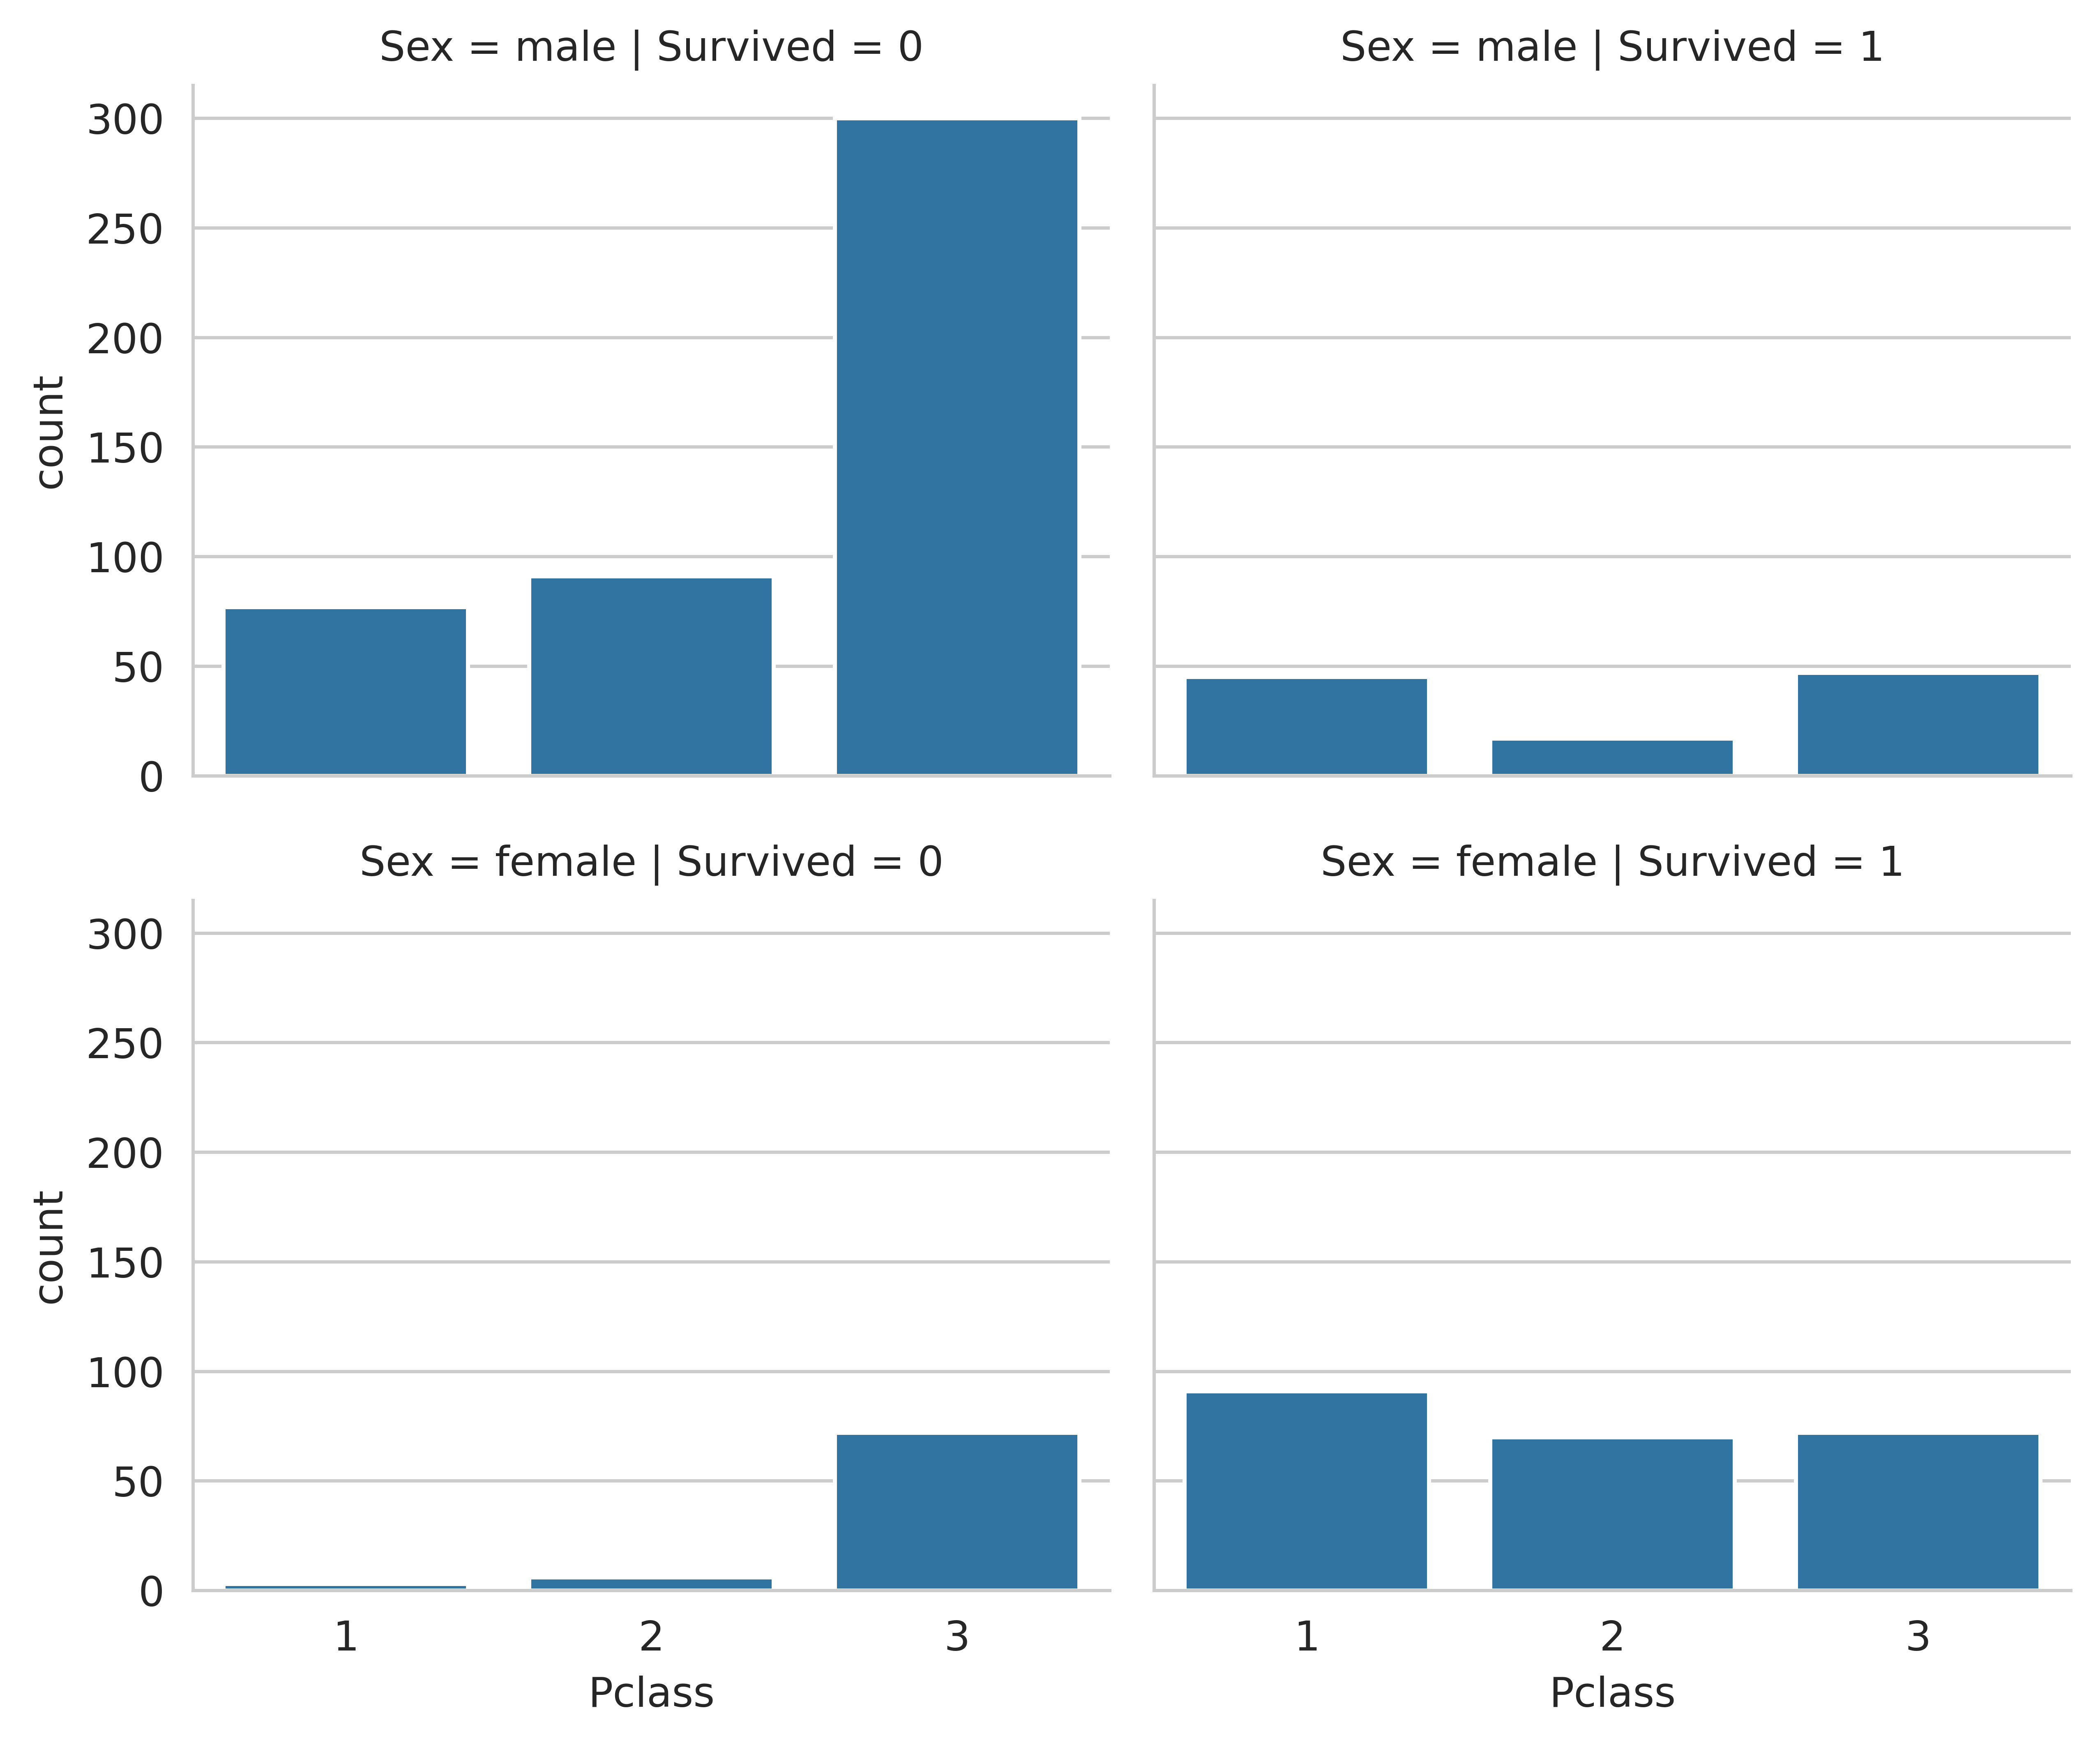

In [39]:
grid = sns.FacetGrid(data=titanic_train, col='Survived', row='Sex', height=3, aspect=1.2)
grid.map(sns.countplot, 'Pclass', order=[1,2,3])
plt.show()

**Observations:**
- Females got more chance to live with respect to Males anyway.
- Females have good survival rate except females in Passenger Class 3.
- The higest count of Male passengers not survived belongs to Passenger Class 3.

### Survival based on Embarkment

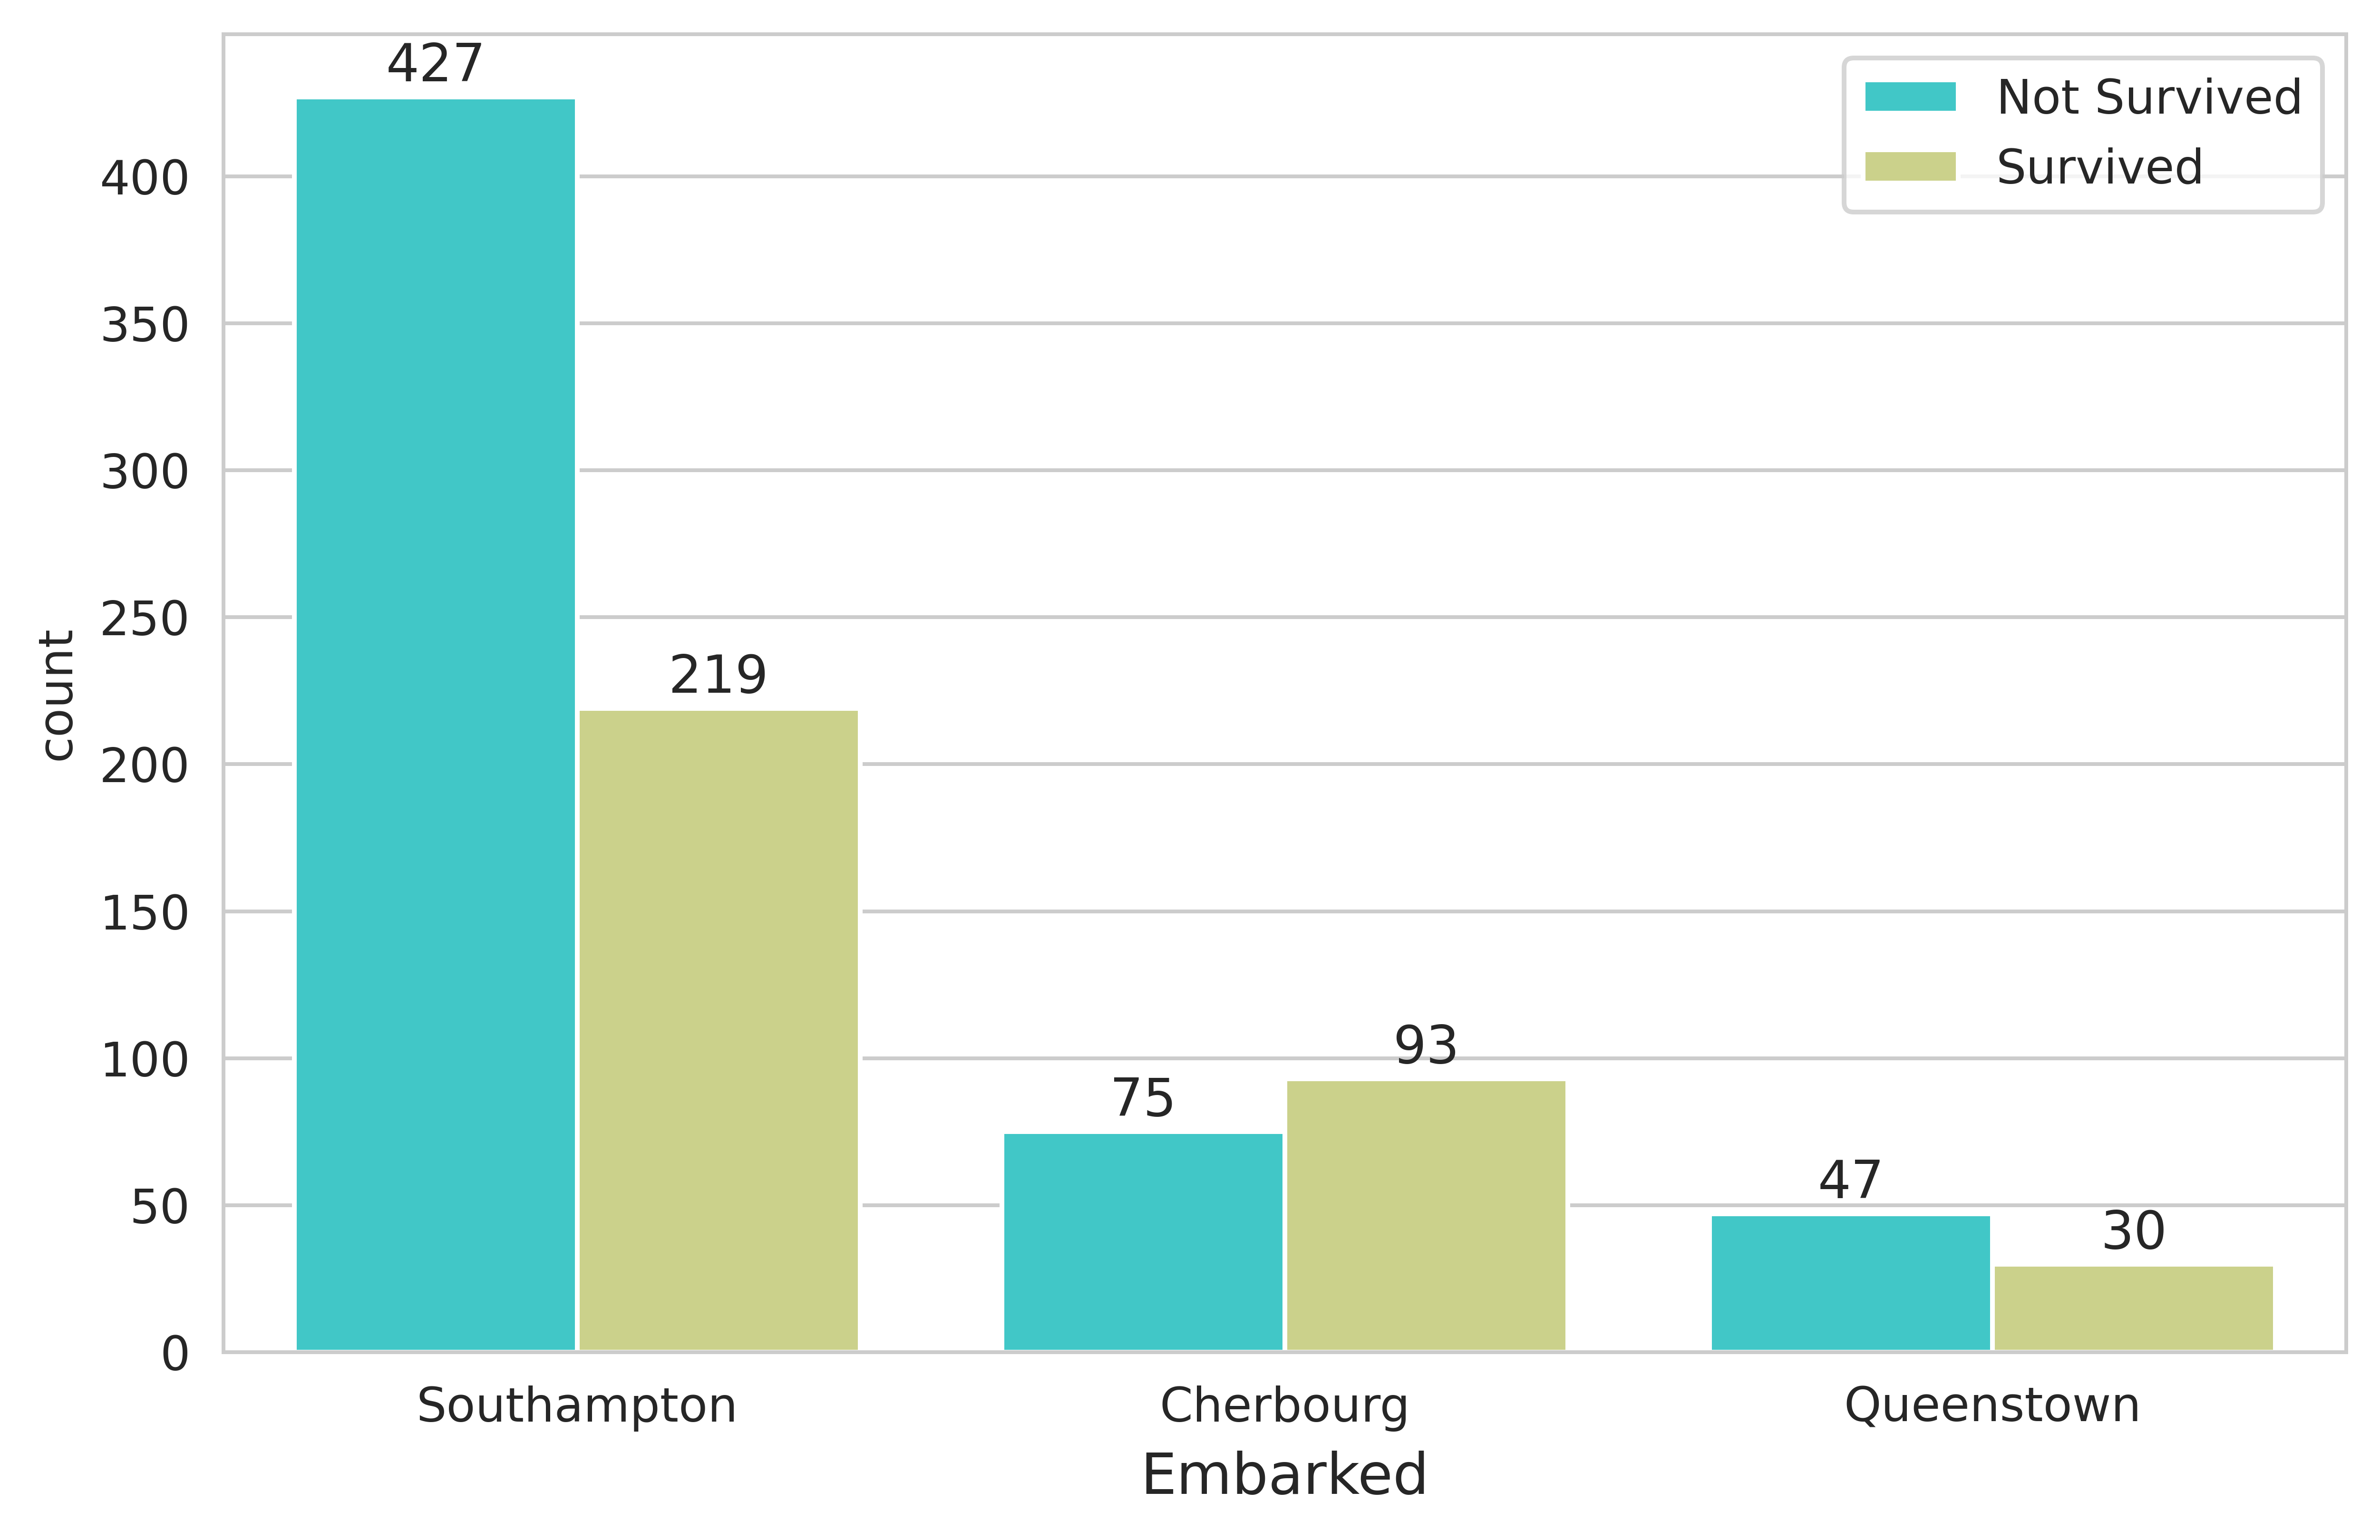

In [40]:
plt.figure(figsize=(8,5))
c1 = sns.countplot(x='Embarked', hue='Survived', data=titanic_train, palette='rainbow')
c1.bar_label(c1.containers[0], padding=1, size=11)
c1.bar_label(c1.containers[1], padding=1, size=11)
plt.legend(labels=['Not Survived', 'Survived'])
plt.xticks(ticks=[0,1,2], labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.xlabel('Embarked', fontsize=12)
plt.show()

In [41]:
# Count
embark_survival_count = (titanic_train.groupby(['Embarked', 'Survived'])['PassengerId'].count()
                        .unstack(fill_value=0).rename_axis(None, axis=1))
embark_survival_count.rename(columns={0: 'Not Survived', 1: 'Survived'}, inplace=True)
embark_survival_count['Total'] = embark_survival_count.sum(axis=1)
embark_survival_count

Not Survived  Survived  Total
Embarked                               
C                   75        93    168
Q                   47        30     77
S                  427       219    646

In [42]:
# Survival Rate
embark_name = {'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}
embark_survival = titanic_train[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)
embark_survival.index = embark_survival.index.map(embark_name)
embark_survival

Survived
Embarked             
Cherbourg    0.553571
Queenstown   0.389610
Southampton  0.339009

### Survival based on 'Embarked' and 'Sex'

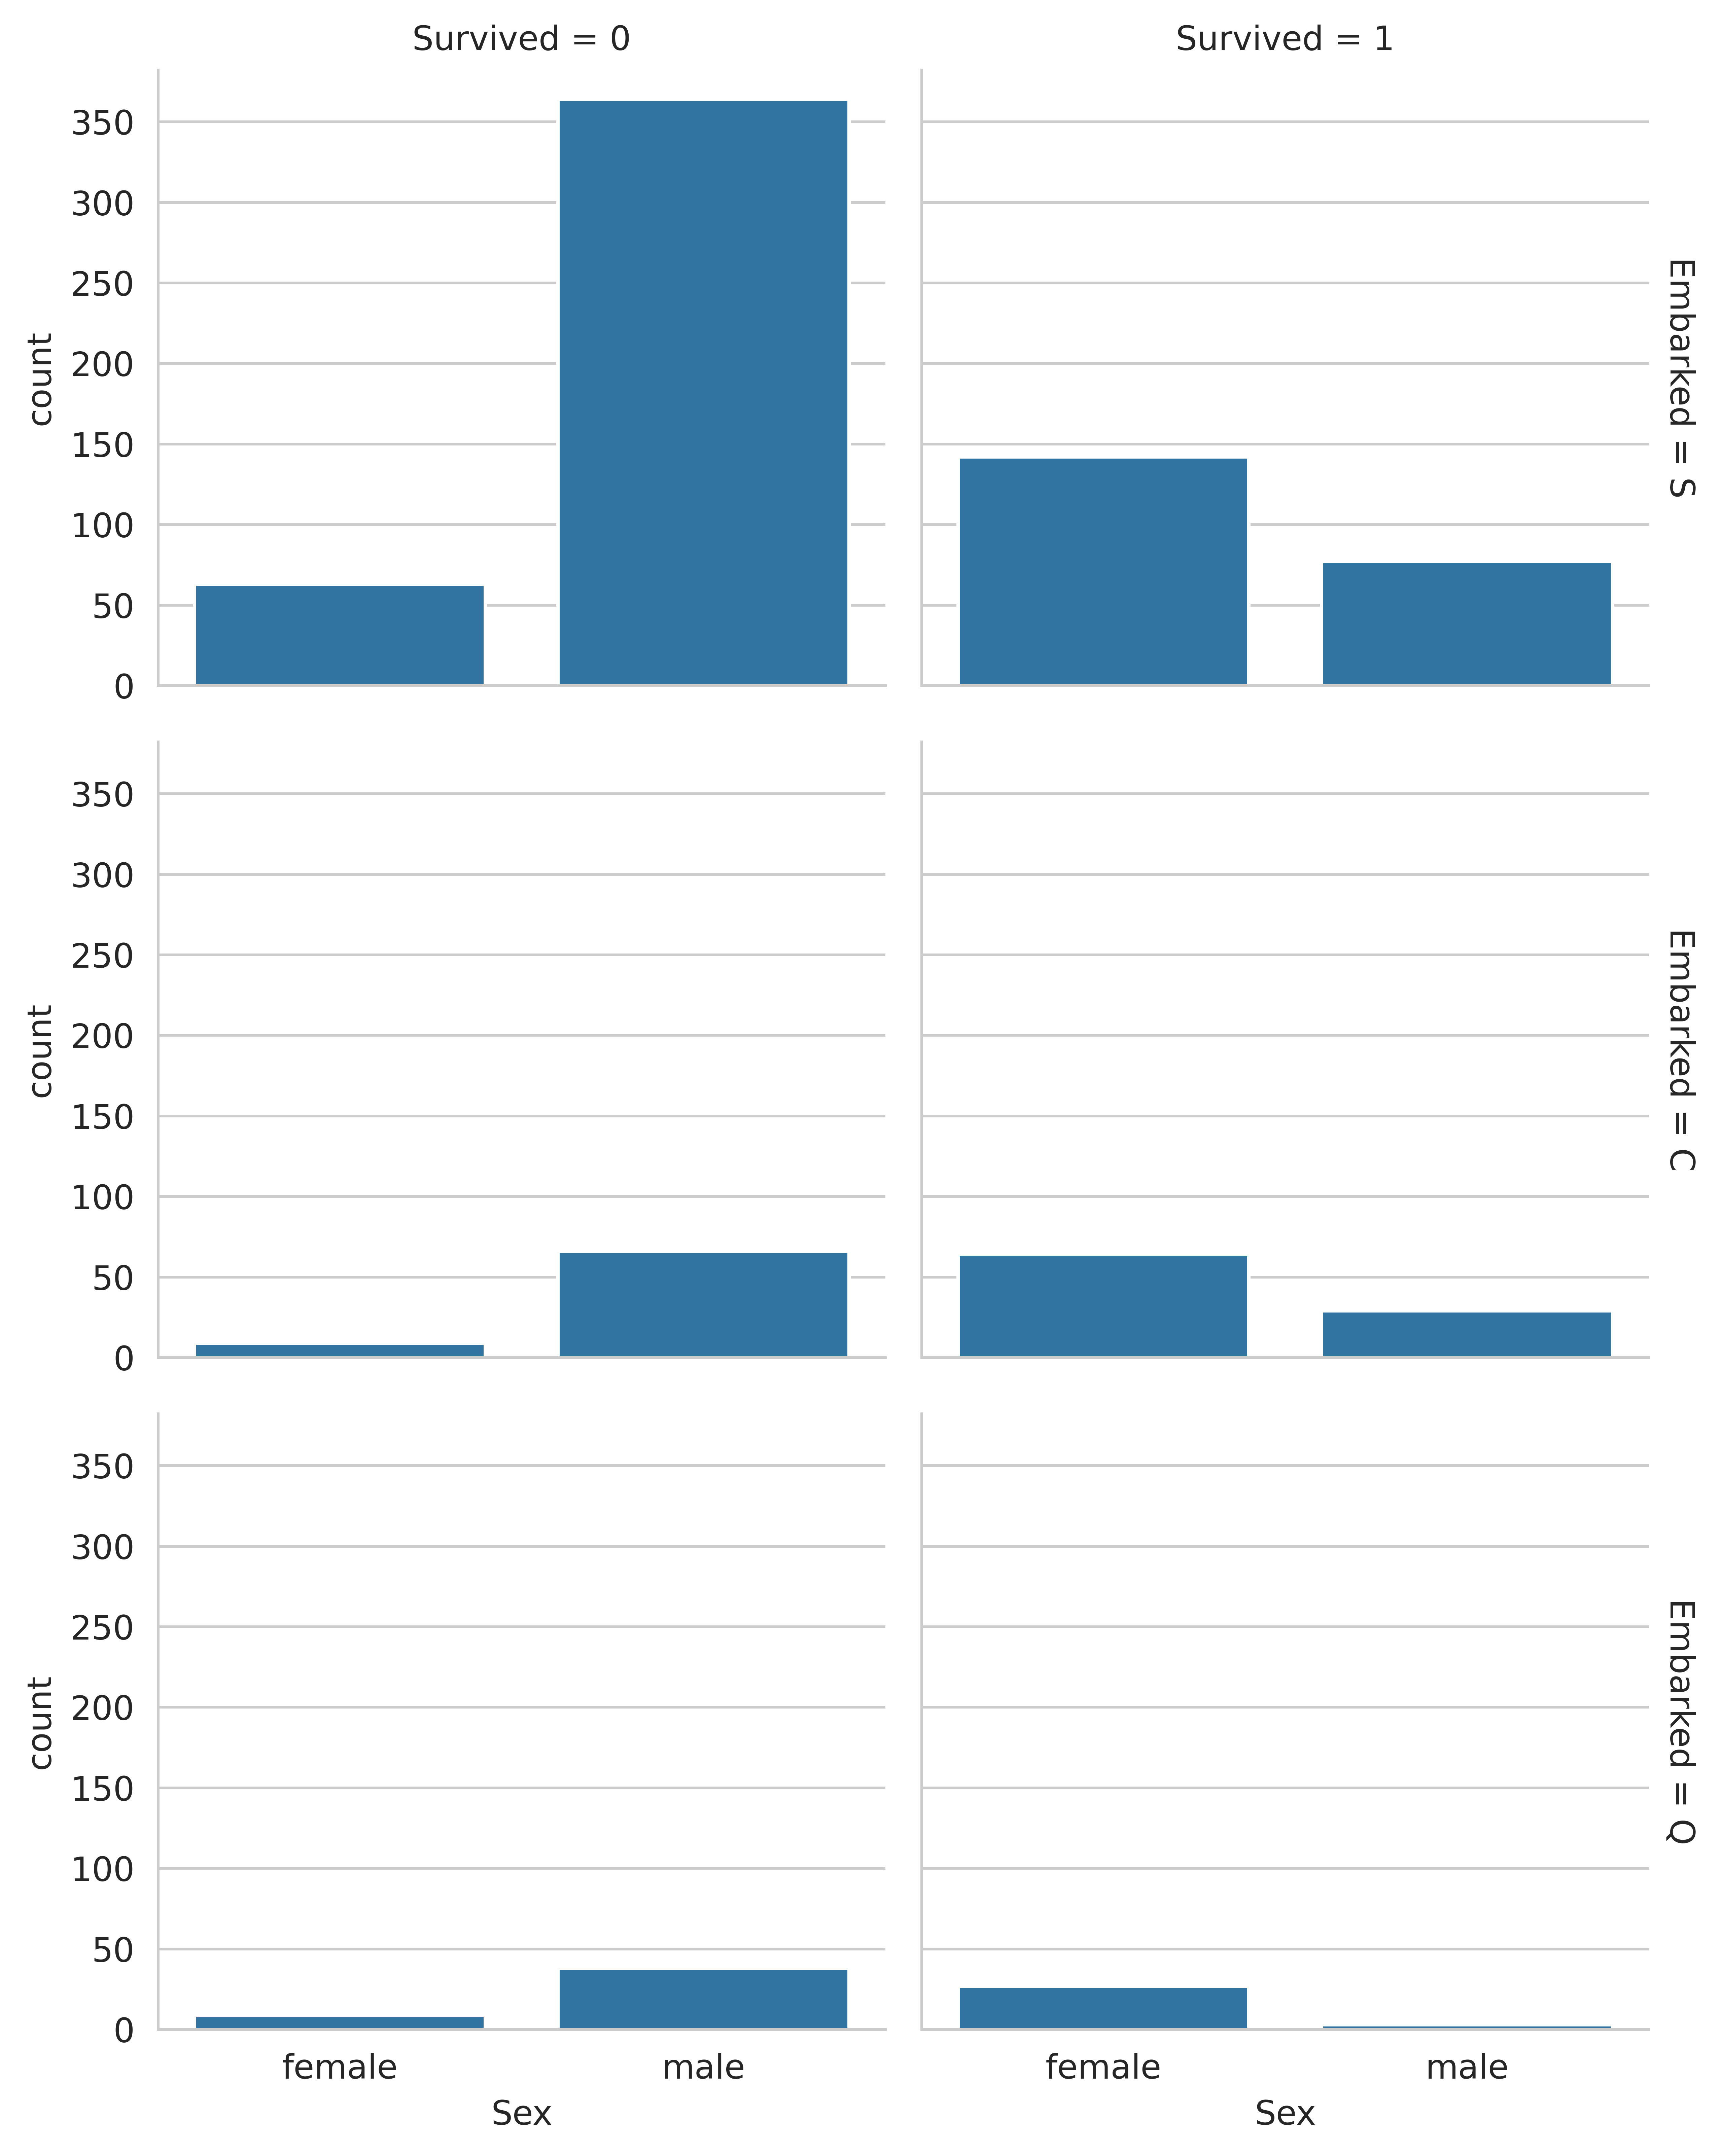

In [43]:
grid = sns.FacetGrid(data=titanic_train, col='Survived', row='Embarked', palette='rainbow', aspect=1.2, margin_titles=True)
grid.map(sns.countplot, 'Sex', order=['female', 'male'])
plt.show()

**Observations:**
- The Passengers who embarked from Cherbourg have highest survival rate.
- All ports have higher Female Passengers Survived Count than Not Survived Count.
- The highest count of Male passengers who did not survived were embarked from Southampton.

### 'Fare', 'Embarked' and 'Sex'

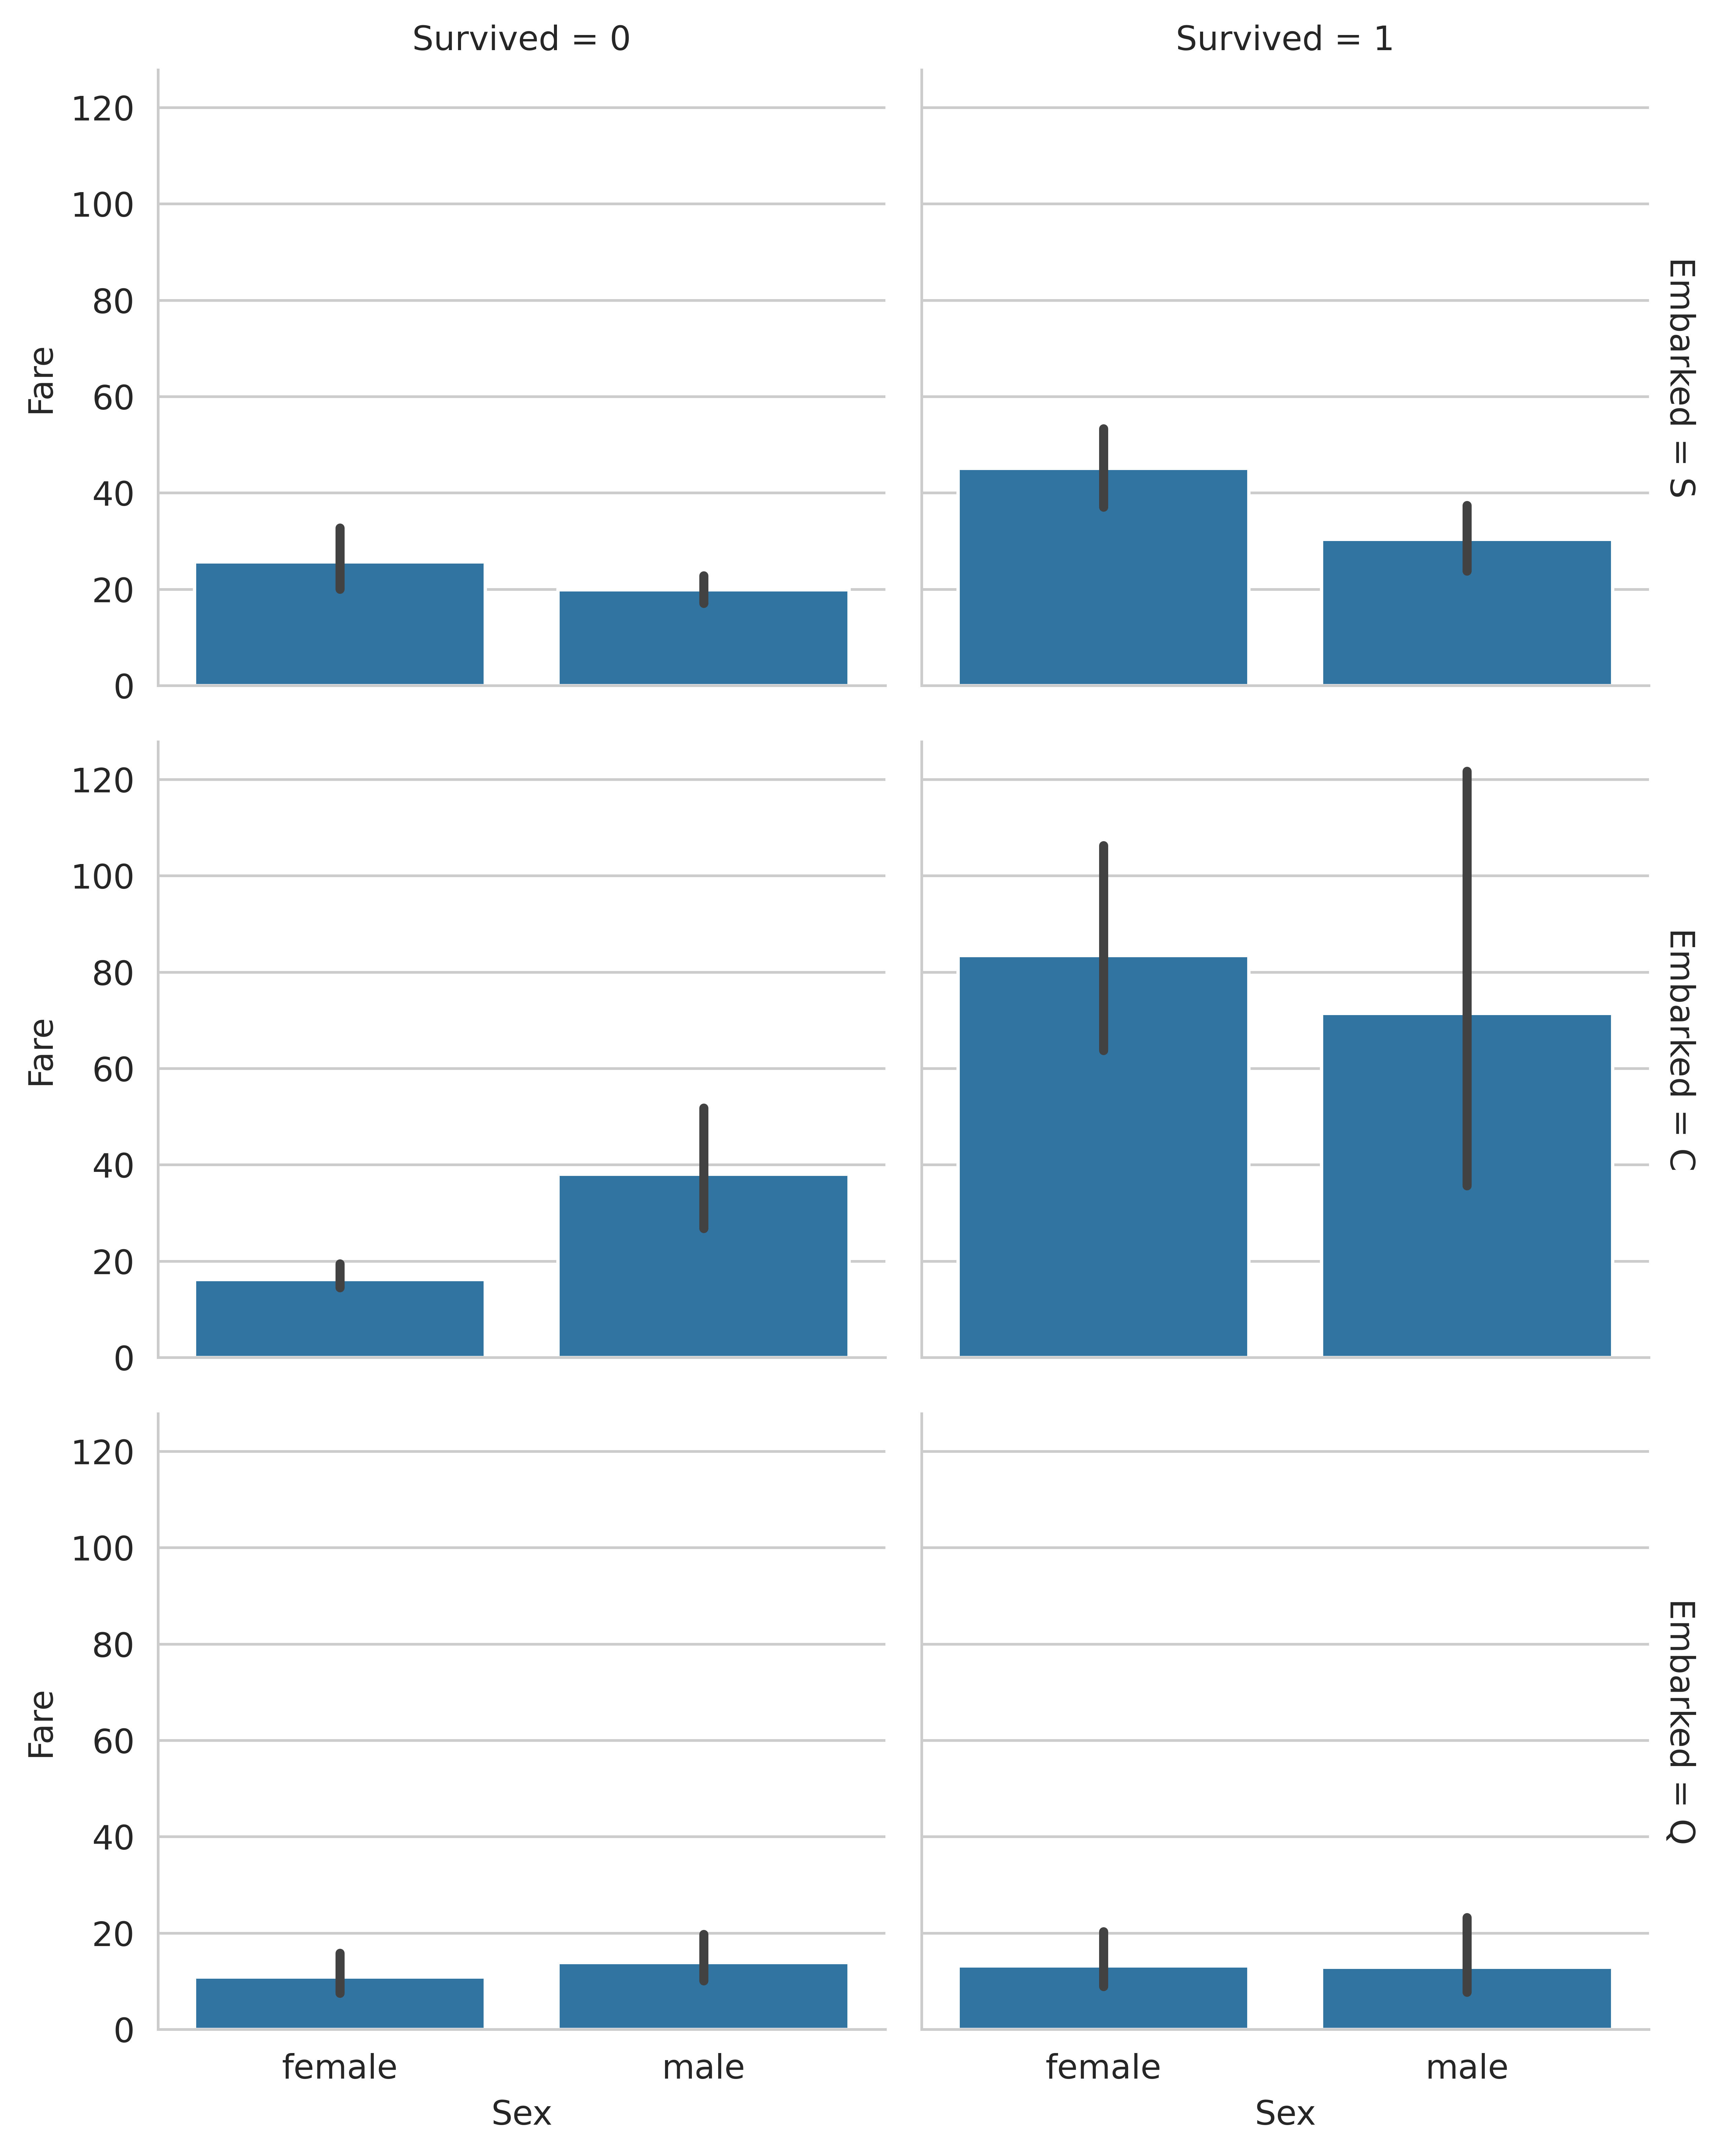

In [44]:
grid = sns.FacetGrid(titanic_train, row='Embarked', col='Survived', height=3, aspect=1.2, margin_titles=True)
grid.map(sns.barplot, 'Sex', 'Fare', order=['female', 'male'])
plt.show()

**Observations:**
- The Cherbourg passengers paid the highest amount and had survived the most.
- As from above observation, mostly passengers embarked from Southampton does not have average fare more than 50.

### Survival based on 'SibSp' (Siblings and Spouse)

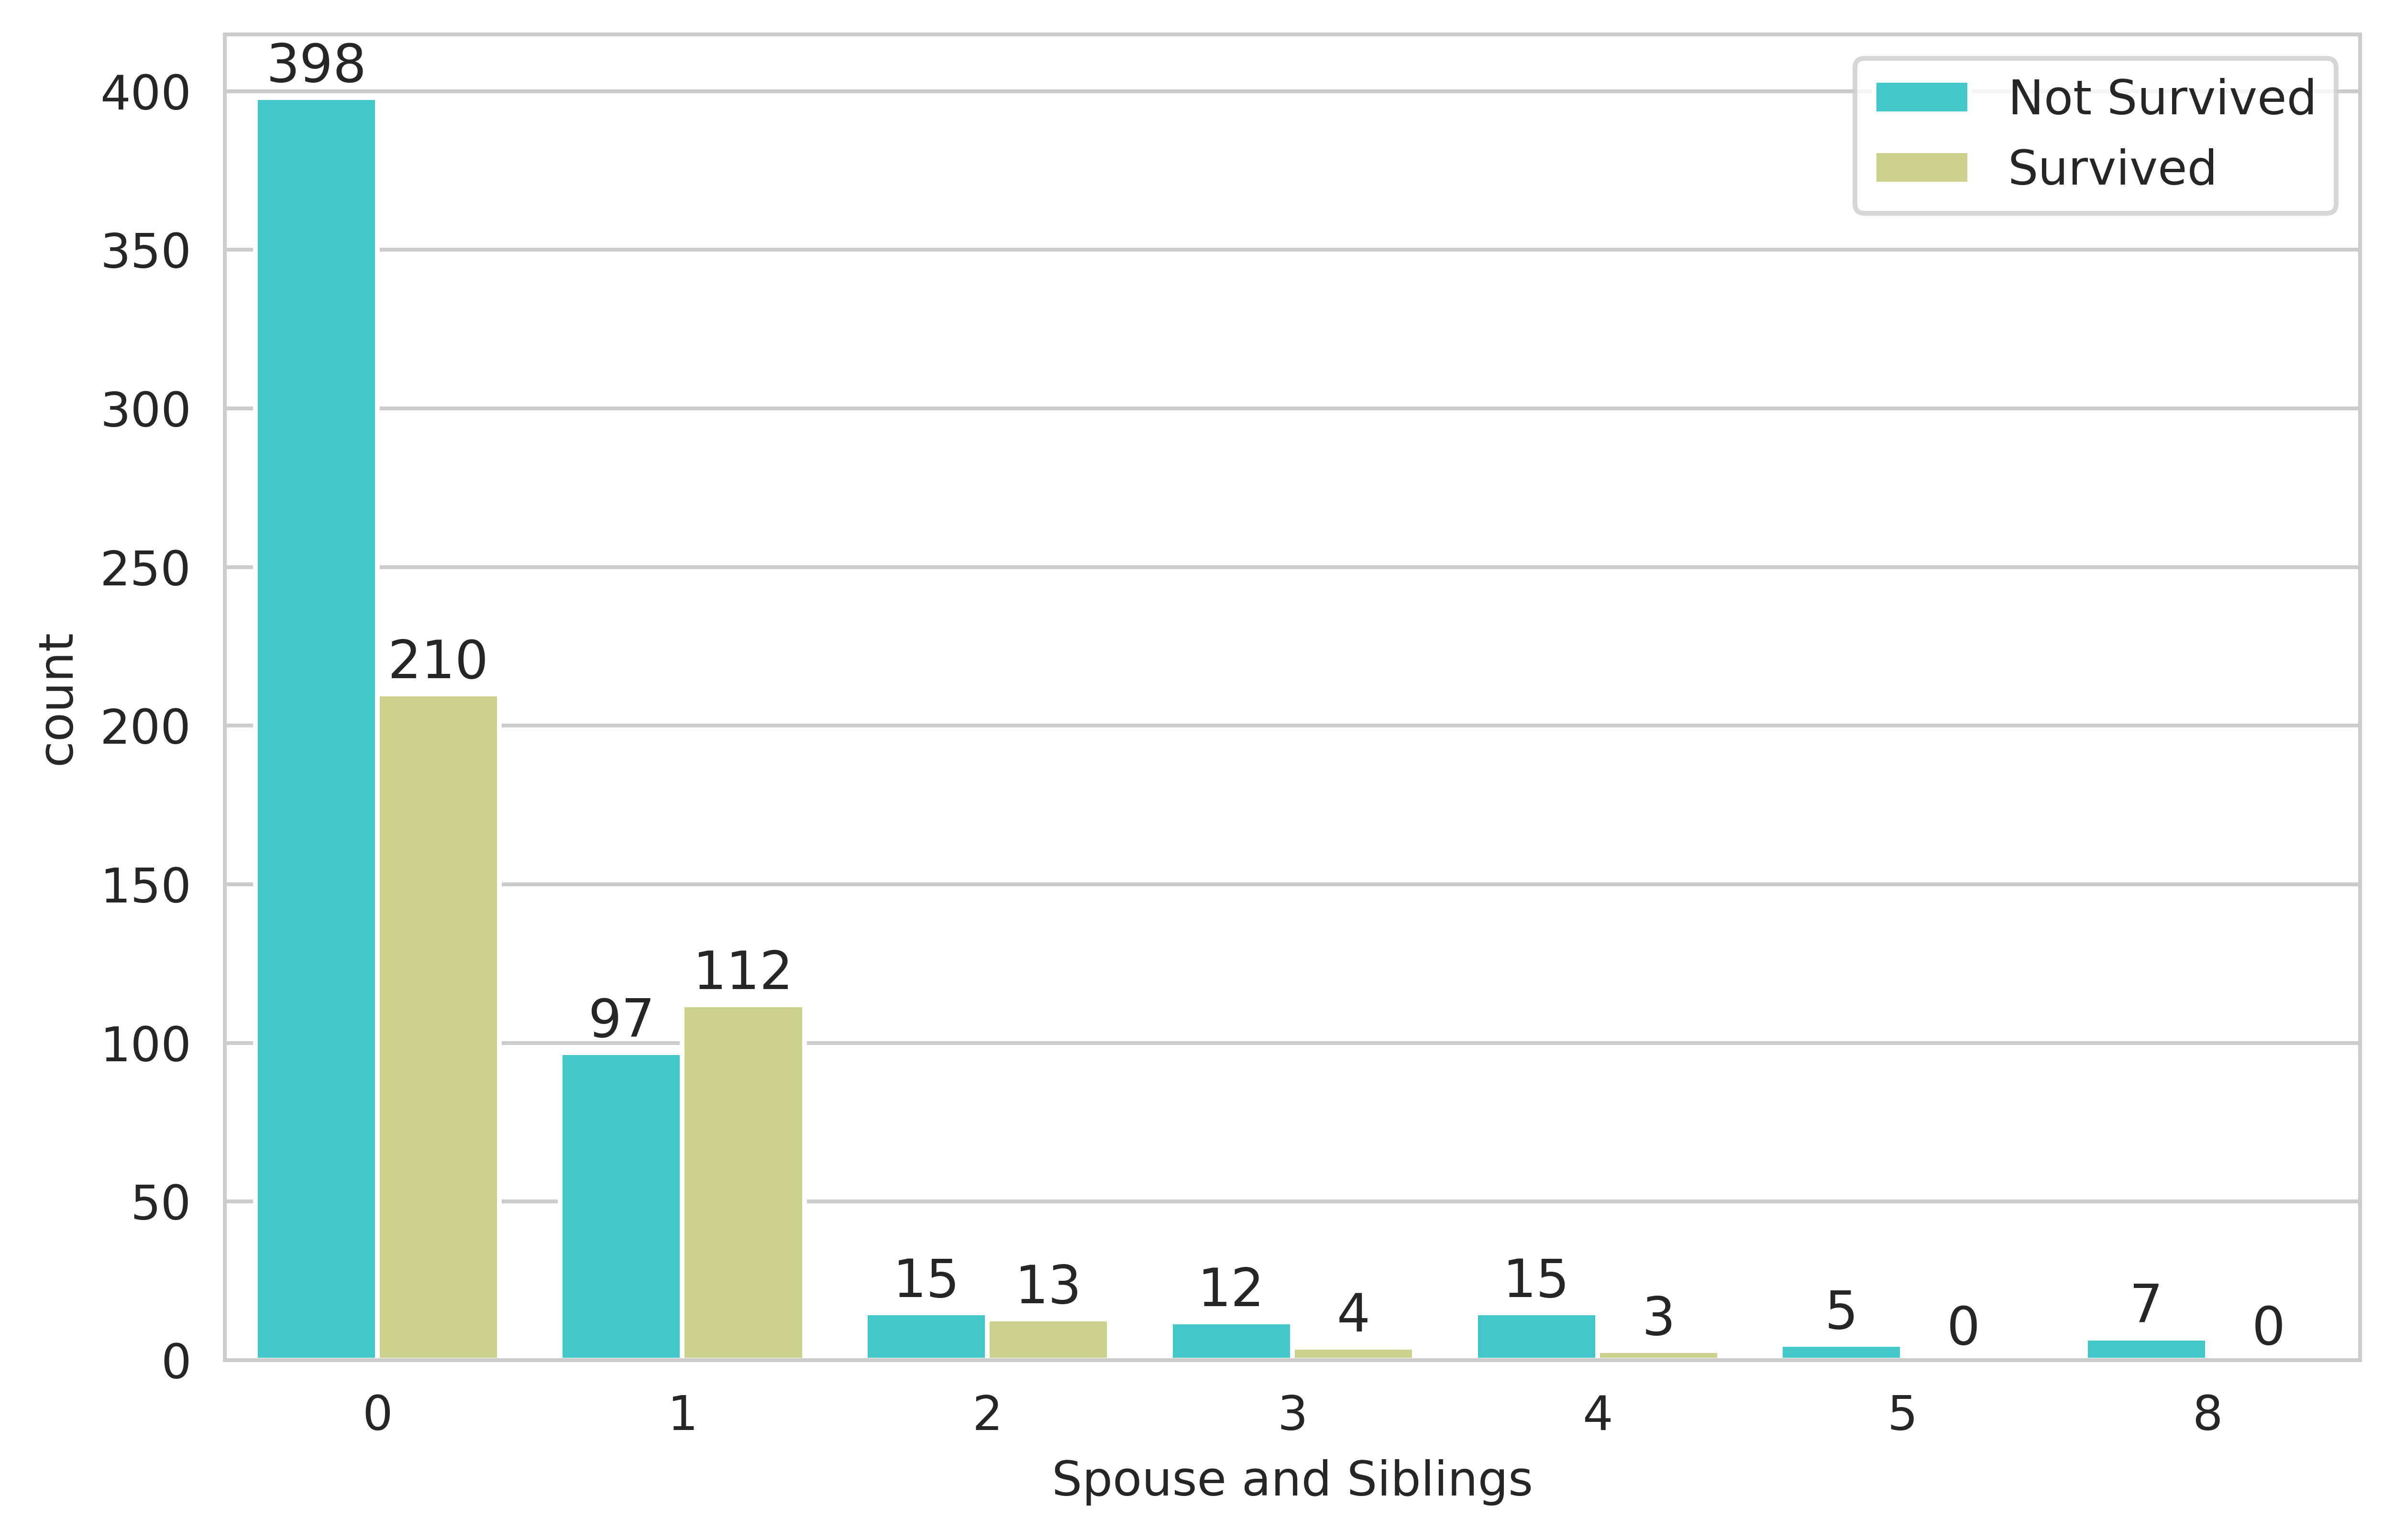

In [45]:
plt.figure(figsize=(8,5))
c1 = sns.countplot(x='SibSp', hue='Survived', data=titanic_train, palette='rainbow')
c1.bar_label(c1.containers[0], padding=1, size=11)
c1.bar_label(c1.containers[1], padding=1, size=11)
plt.legend(labels=['Not Survived', 'Survived'], loc='upper right')
plt.xlabel('Spouse and Siblings')
plt.show()

In [46]:
# Count
sibsp_survival_count = (titanic_train.groupby(['SibSp', 'Survived'])['PassengerId'].count()
                        .unstack(fill_value=0).rename_axis(None, axis=1))
sibsp_survival_count.rename(columns={0: 'Not Survived', 1: 'Survived'}, inplace=True)
sibsp_survival_count['Total'] = sibsp_survival_count.sum(axis=1)
sibsp_survival_count

Not Survived  Survived  Total
SibSp                               
0               398       210    608
1                97       112    209
2                15        13     28
3                12         4     16
4                15         3     18
5                 5         0      5
8                 7         0      7

In [47]:
# Survival Rate
titanic_train[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000

**Observations:**
- Most of the passengers are not with their Spouse or Siblings and lot of people either have only Spouse or one Sibling with them.
- Passengers whose 'SibSp' count are 1 or 2 had better survival rate than those 'SibSp' count is 0.

### Survival based on 'Parch' (Parent and Childrens)

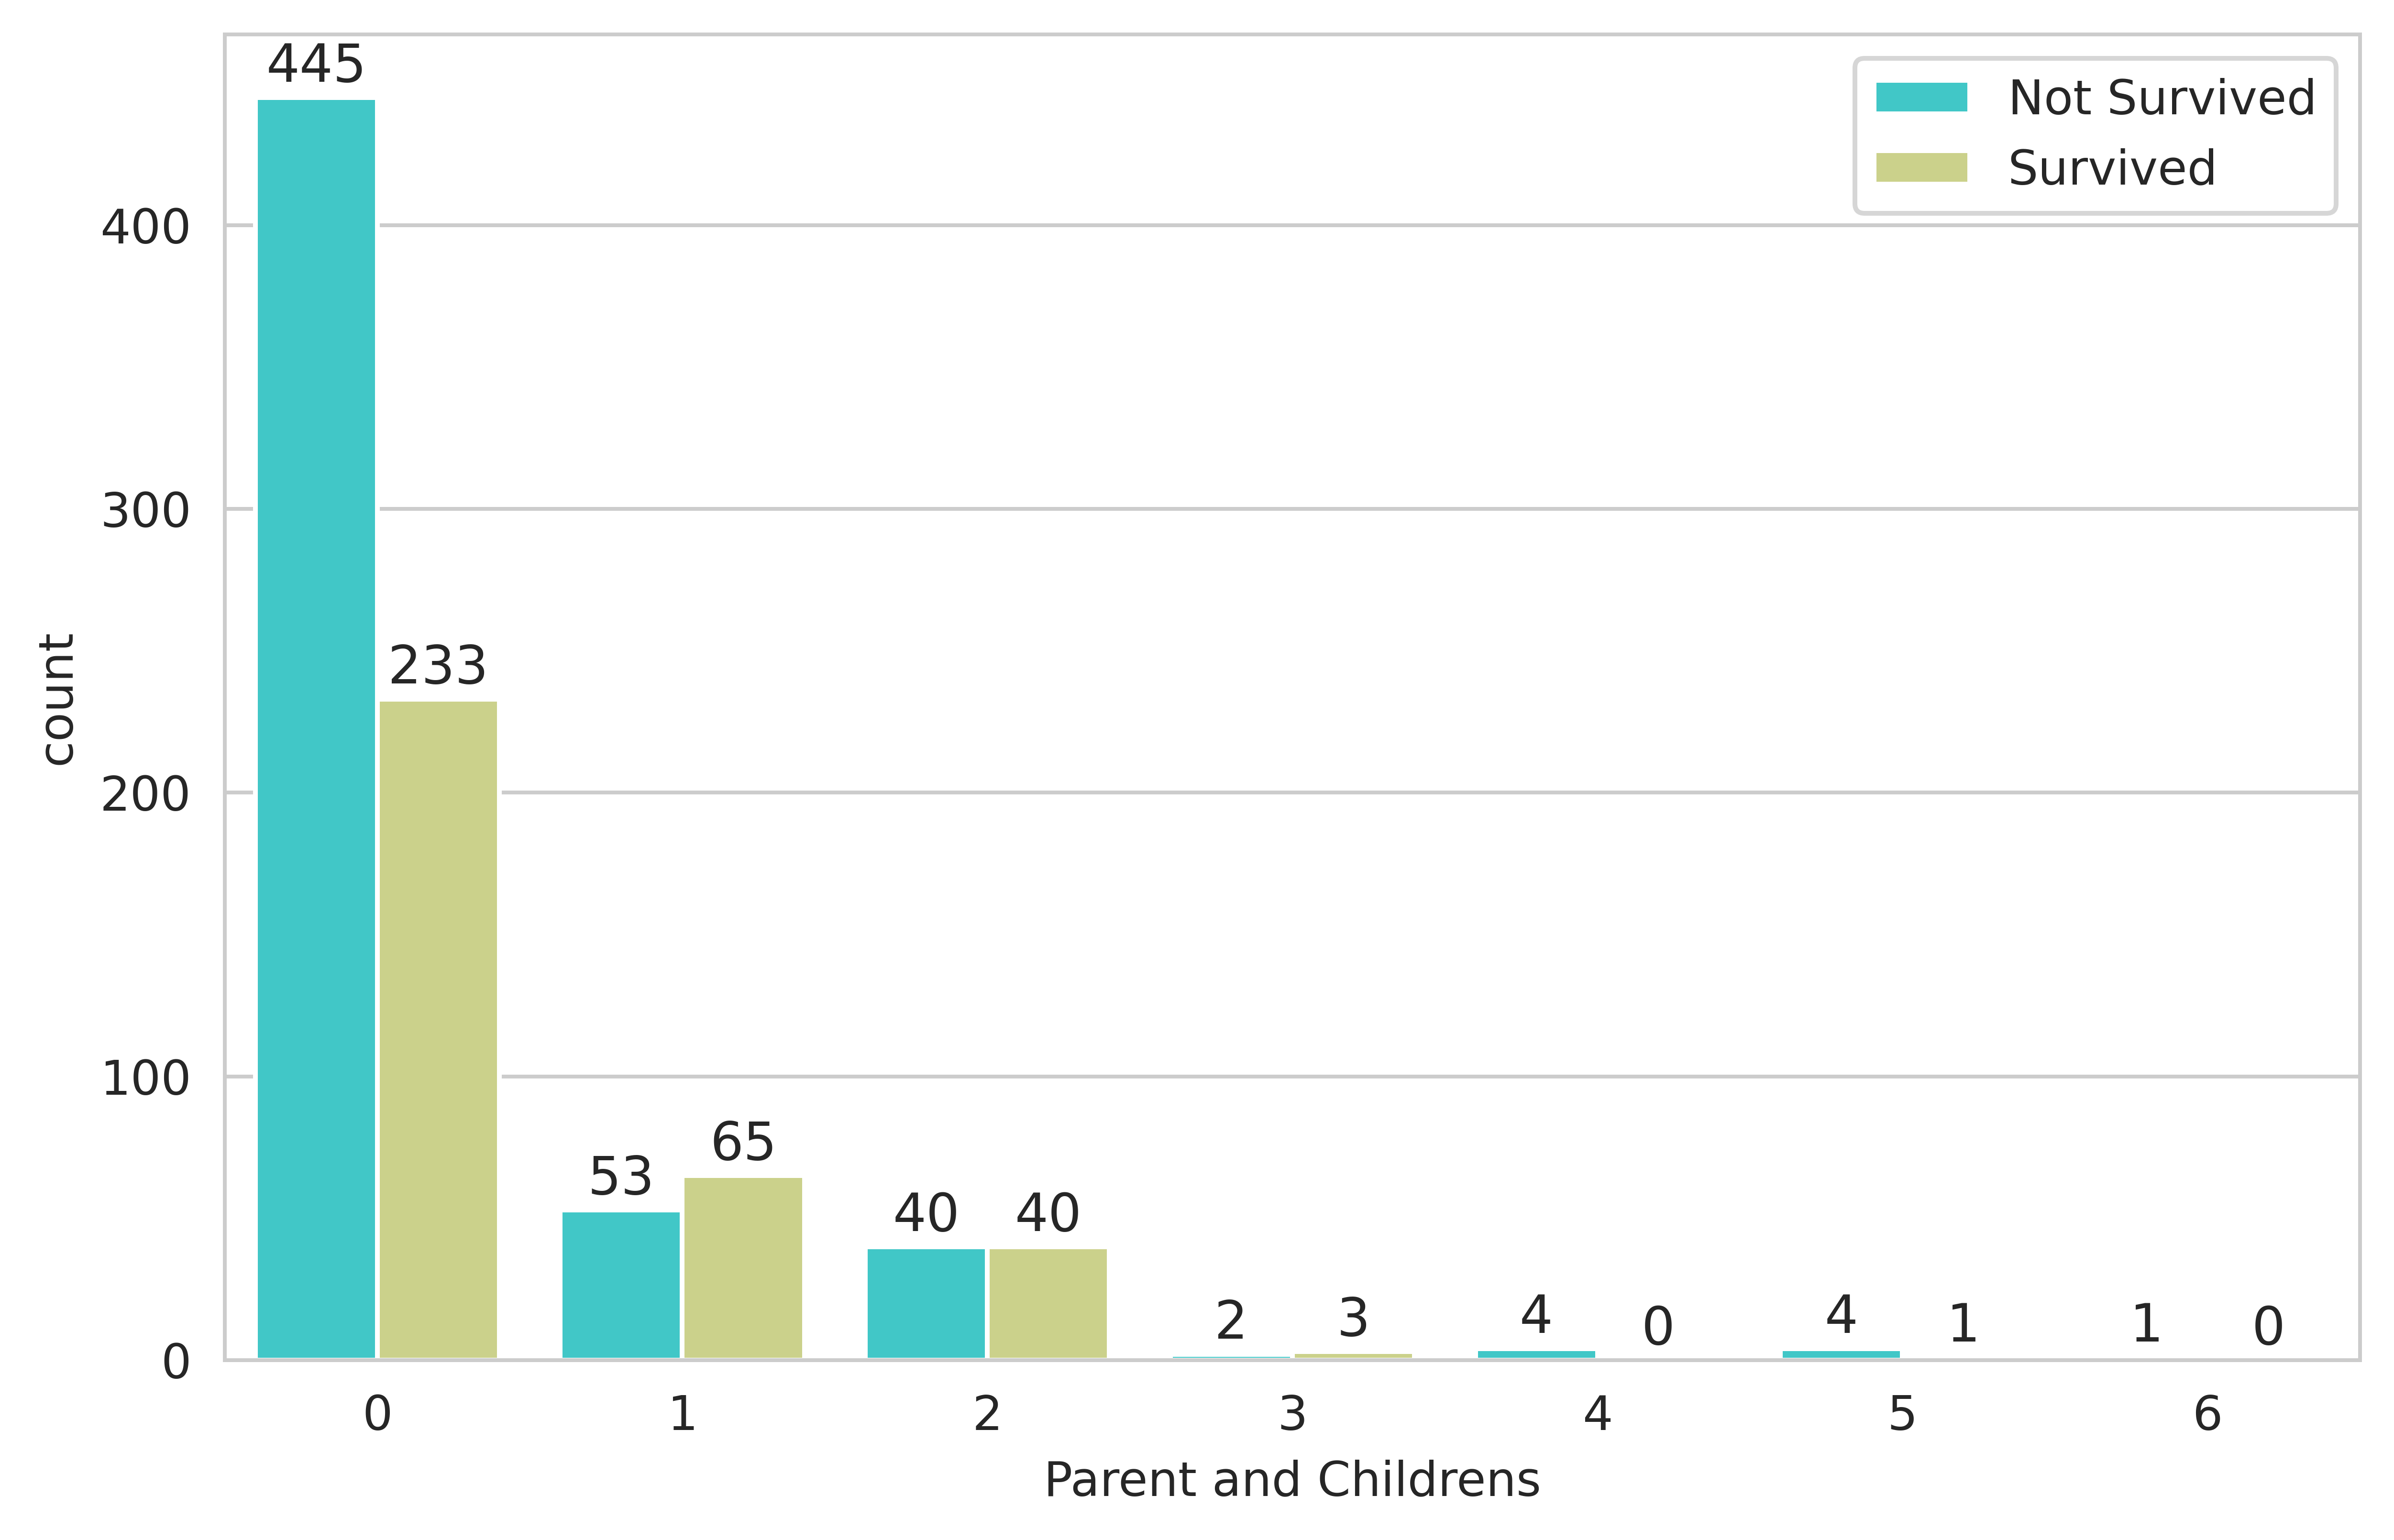

In [48]:
plt.figure(figsize=(8,5))
c1 = sns.countplot(x='Parch', hue='Survived', data=titanic_train, palette='rainbow')
c1.bar_label(c1.containers[0], padding=1, size=11)
c1.bar_label(c1.containers[1], padding=1, size=11)
plt.legend(labels=['Not Survived', 'Survived'], loc='upper right')
plt.xlabel("Parent and Childrens")
plt.show()

In [49]:
# Count
parch_survival_count = (titanic_train.groupby(['Parch', 'Survived'])['PassengerId'].count()
                        .unstack(fill_value=0).rename_axis(None, axis=1))
parch_survival_count.rename(columns={0: 'Not Survived', 1: 'Survived'}, inplace=True)
parch_survival_count['Total'] = parch_survival_count.sum(axis=1)
parch_survival_count

Not Survived  Survived  Total
Parch                               
0               445       233    678
1                53        65    118
2                40        40     80
3                 2         3      5
4                 4         0      4
5                 4         1      5
6                 1         0      1

In [50]:
# Survival Rate
titanic_train[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False)

Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000

**Observations:**
- Again, most of the passengers are not with their Parent and Childrens and lot of people either have only single parent or one child with them.
- Passengers whose 'Parch' count is 3 had best survival rate.
- Passengers whose 'Parch' count are 3,1 or 2 had better survival rate than those 'Parch' count is 0.

### Survival based on Age

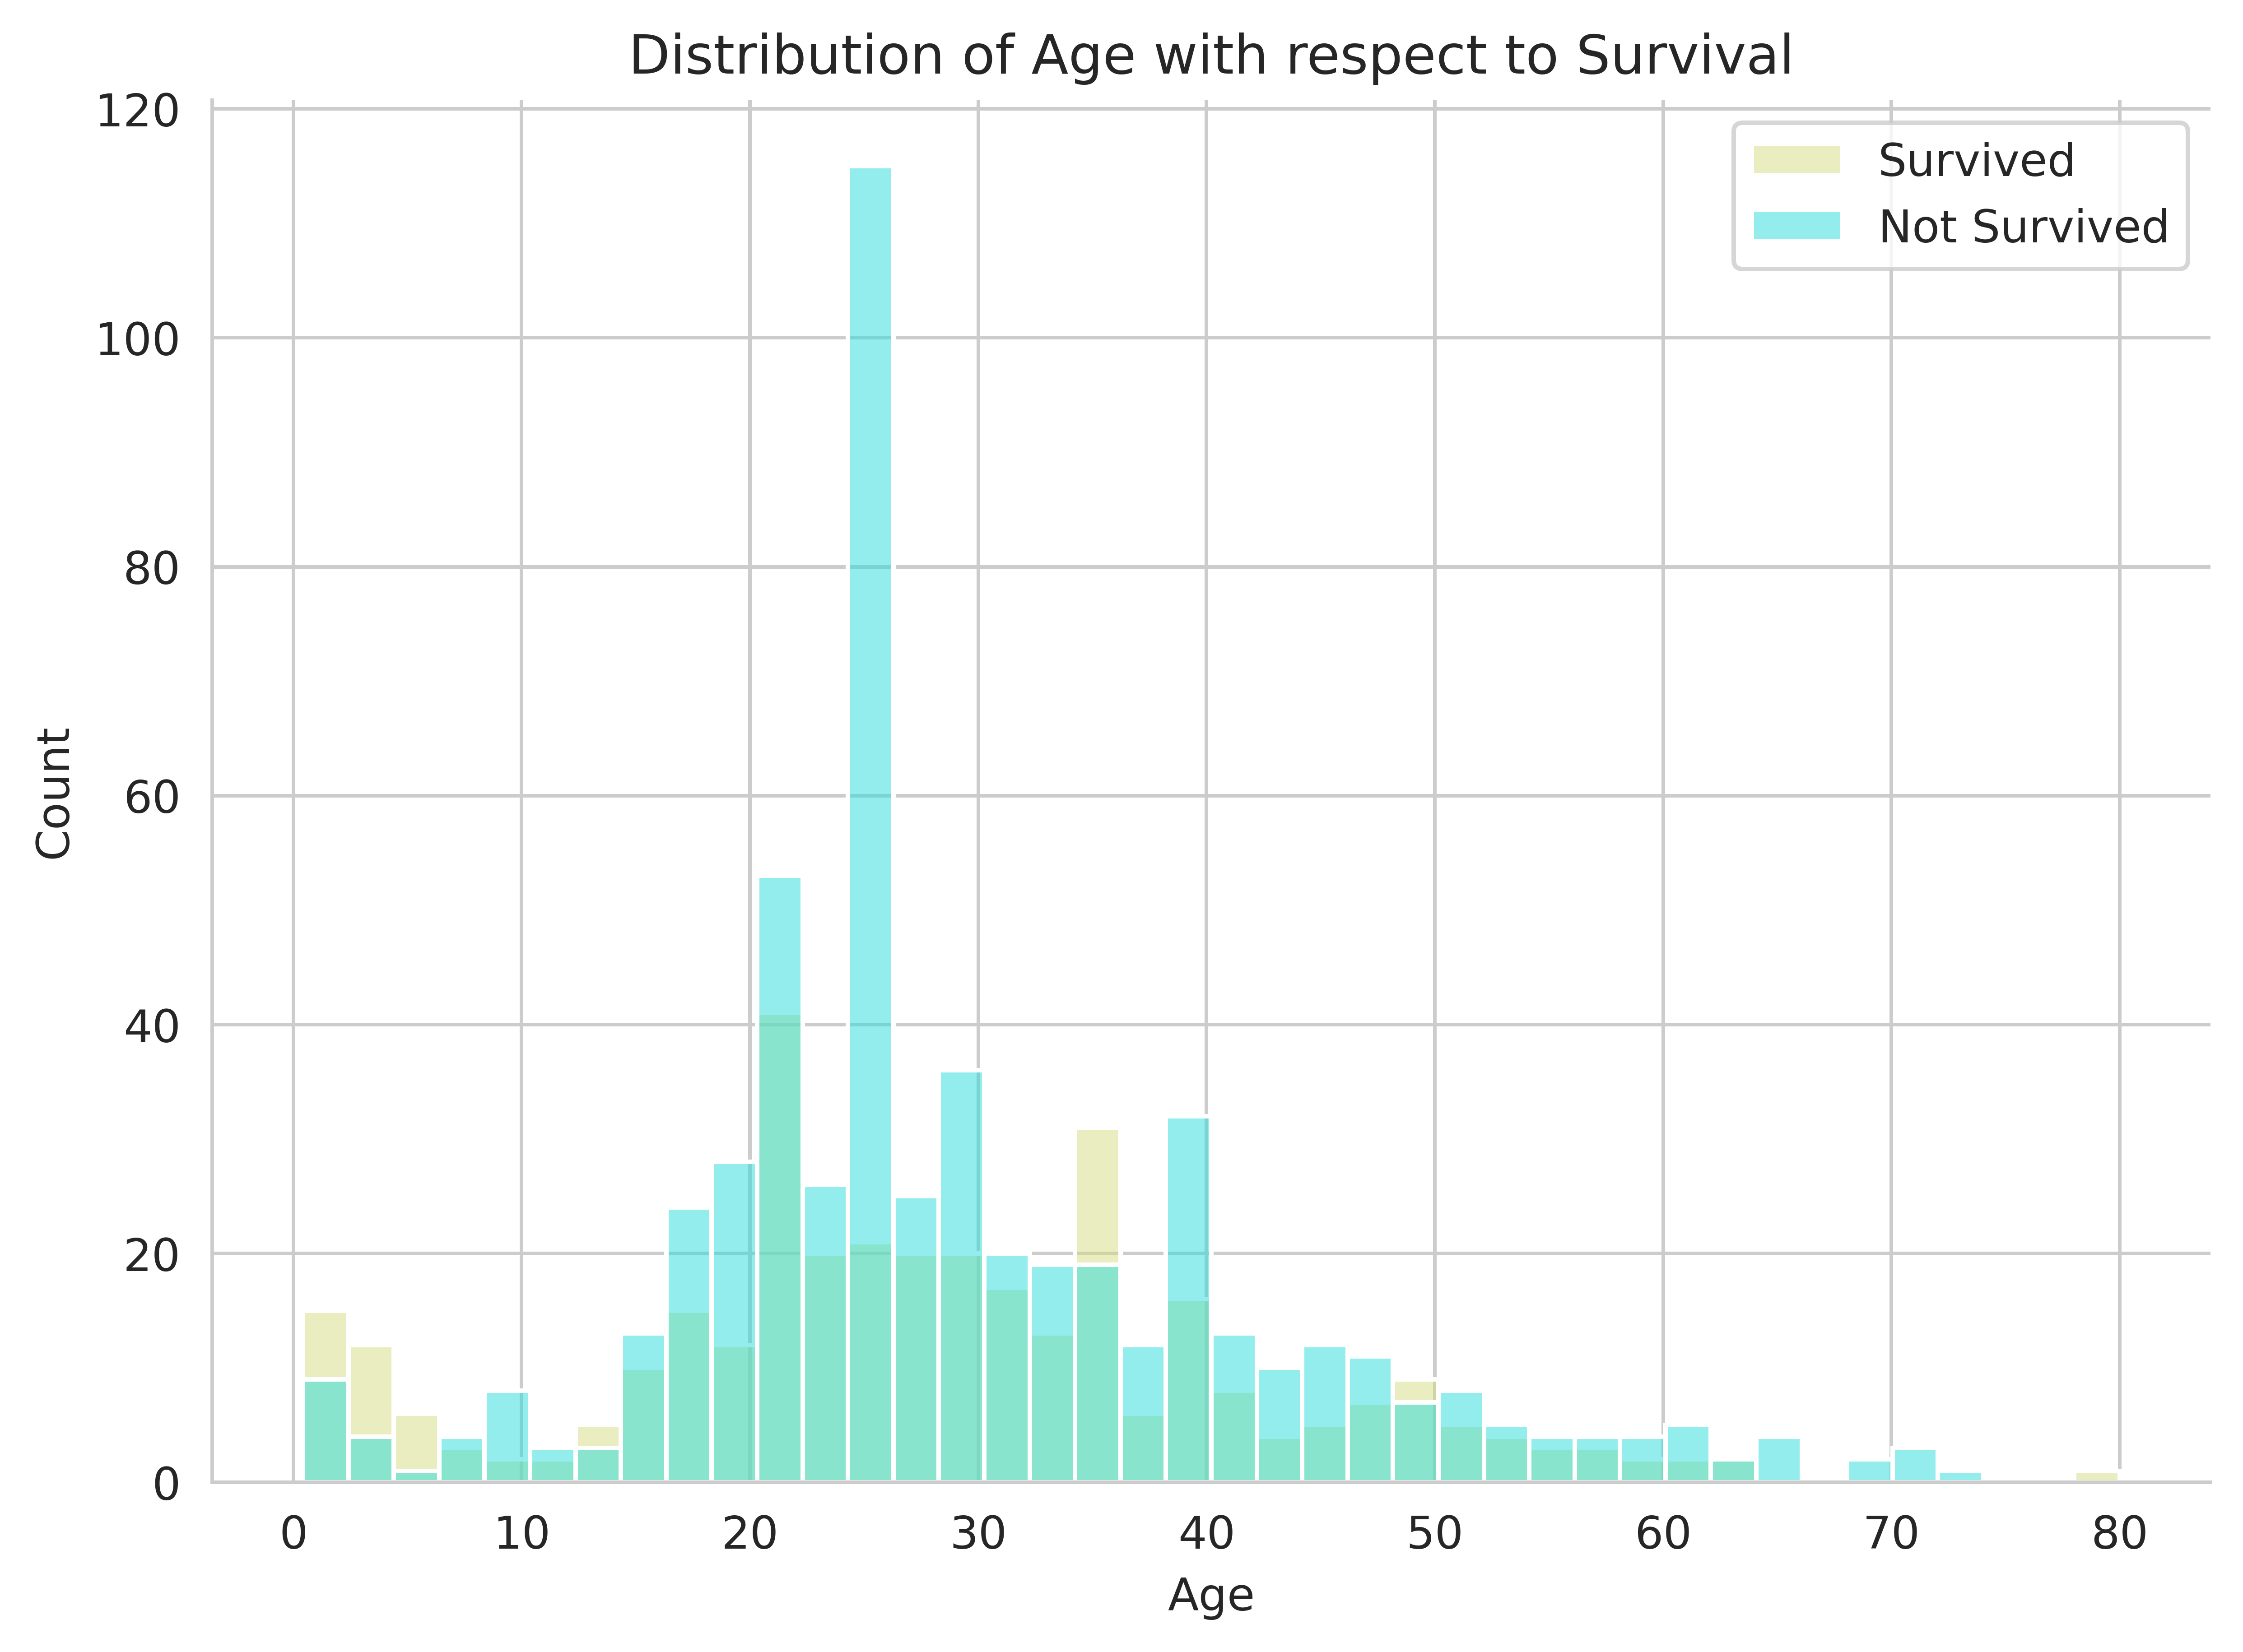

In [51]:
sns.displot(x='Age', data=titanic_train, hue='Survived', bins=40, palette='rainbow', legend=False, aspect=1.4)
plt.title('Distribution of Age with respect to Survival')
plt.legend(labels=['Survived', 'Not Survived'])
plt.show()

**Observations:**
- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

###  Fare Distribution

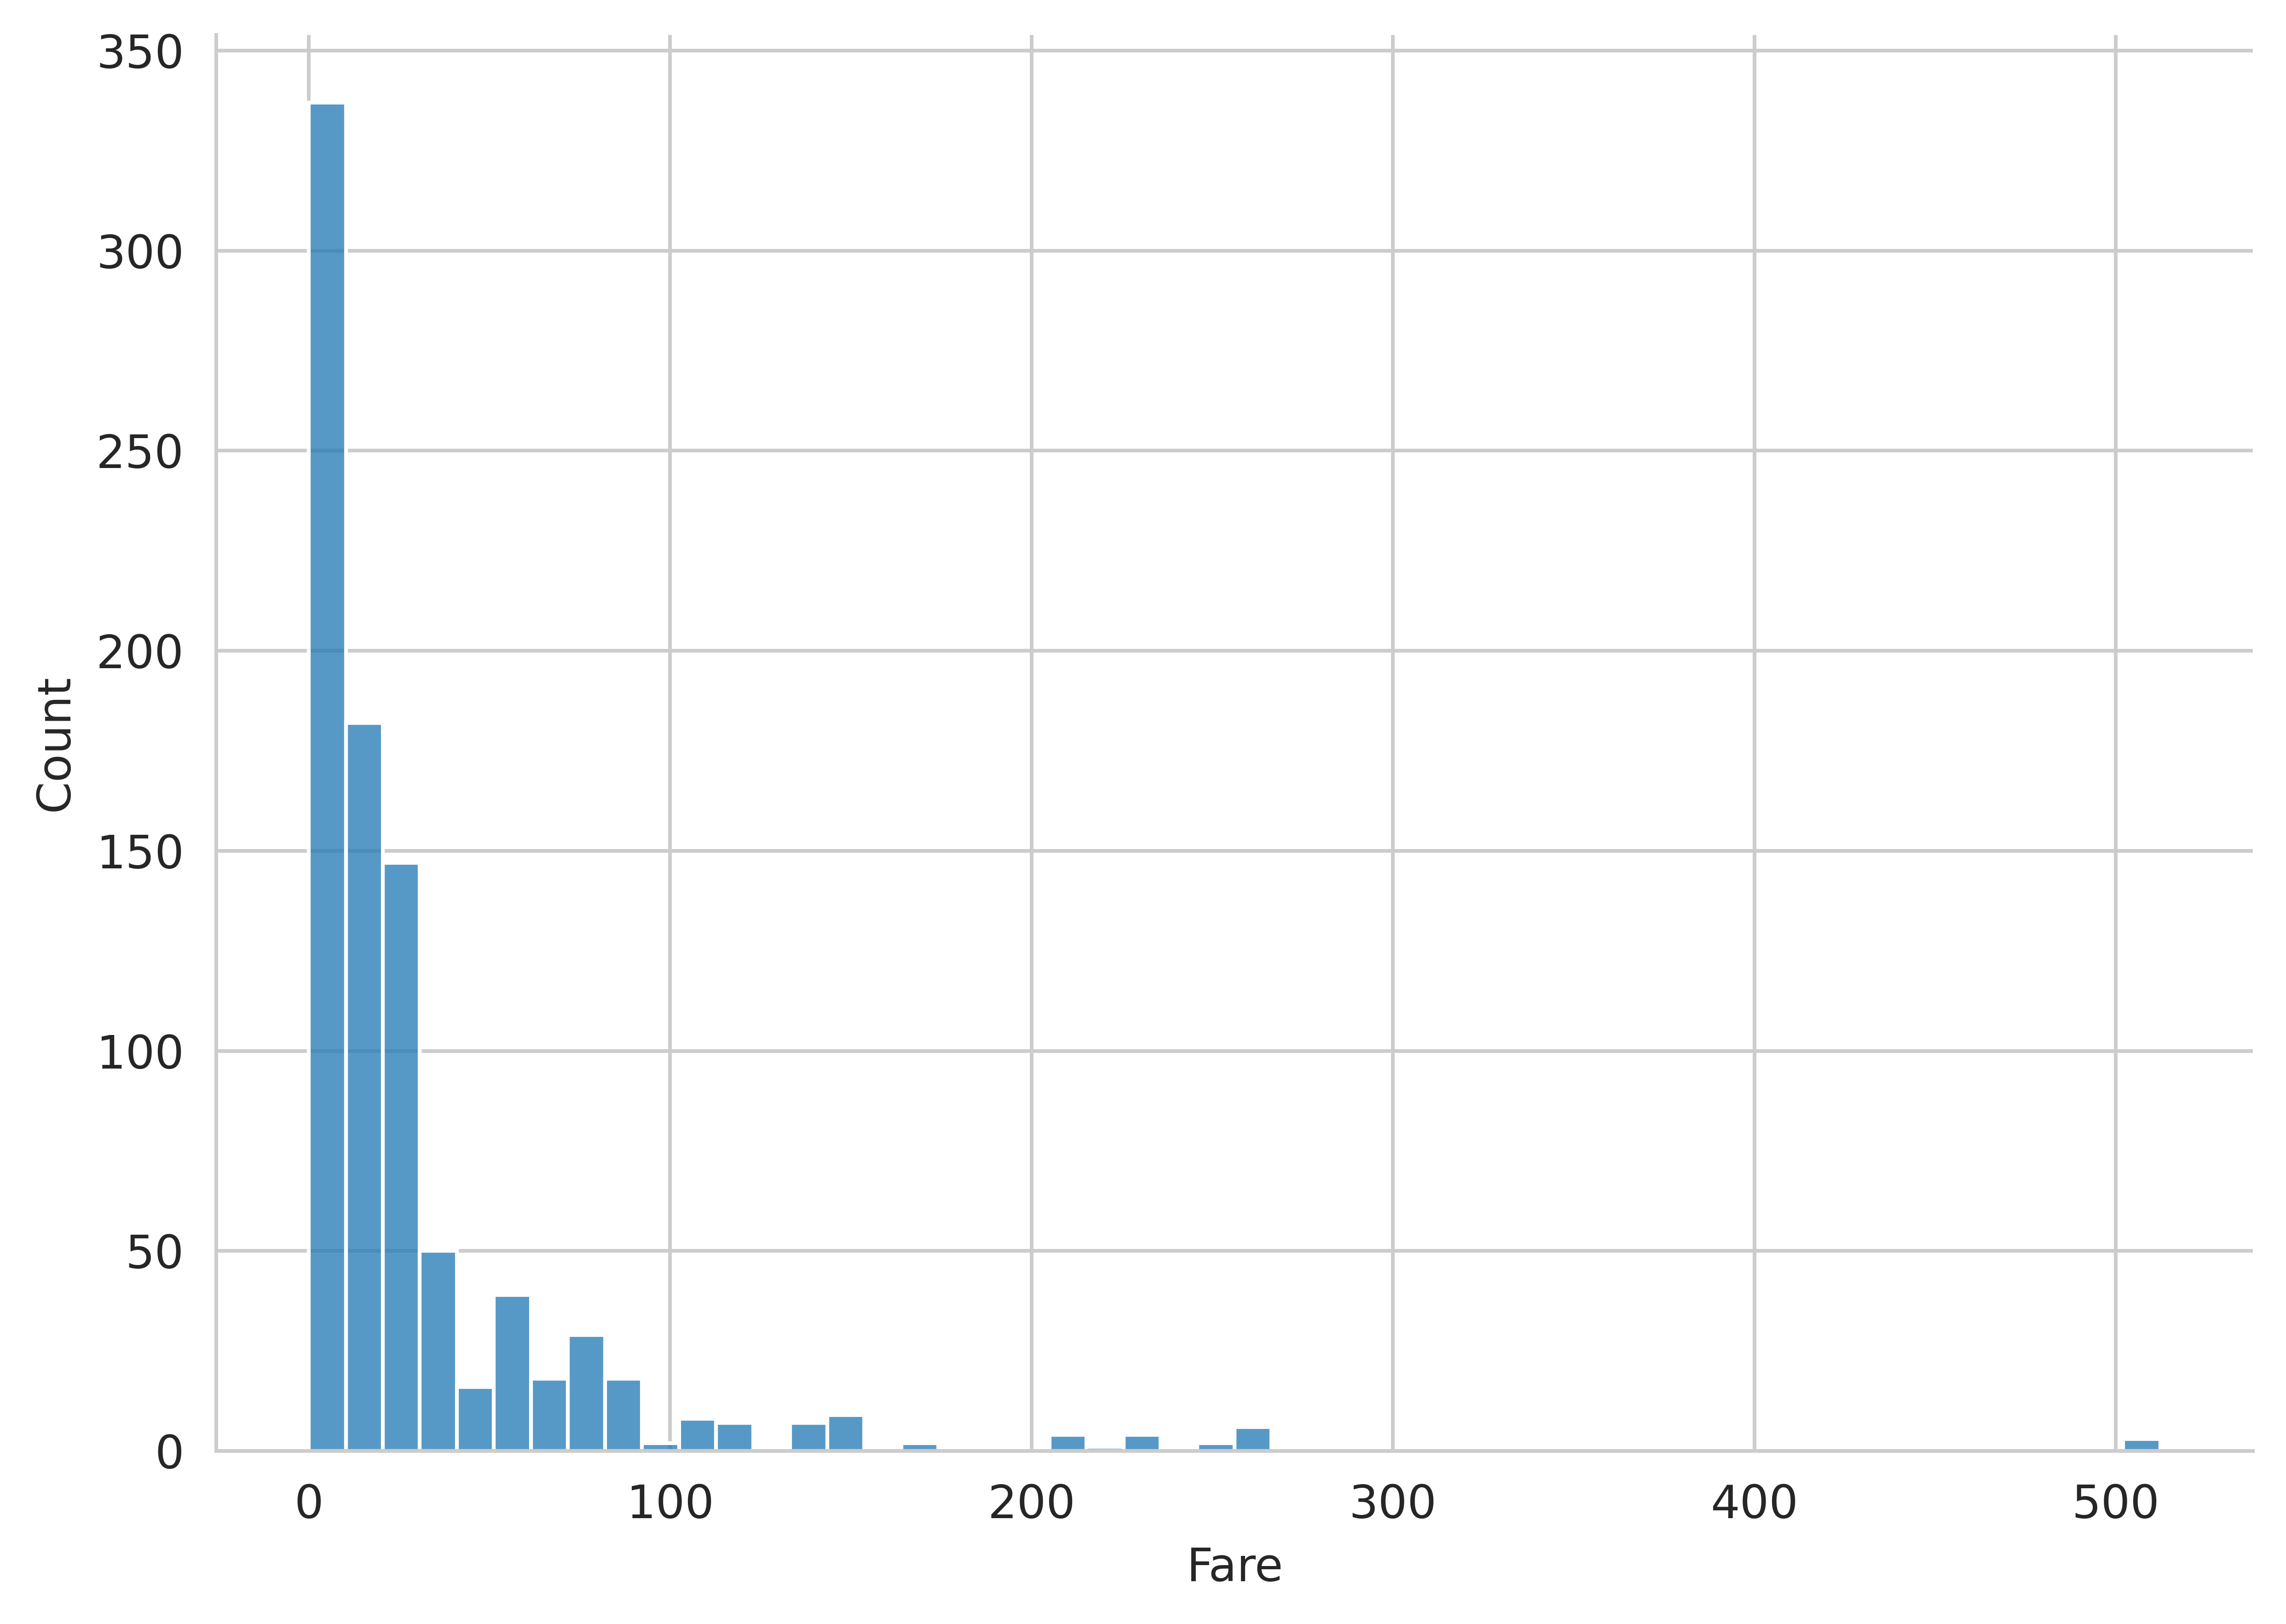

In [52]:
sns.displot(titanic_train['Fare'], bins=50, aspect=1.4)
plt.show()

In [53]:
titanic_train['Fare'].max()

512.3292

**Observation:**
- The mostly Fare is between 0 to 50.

### Fare Distribution between 0 to 50

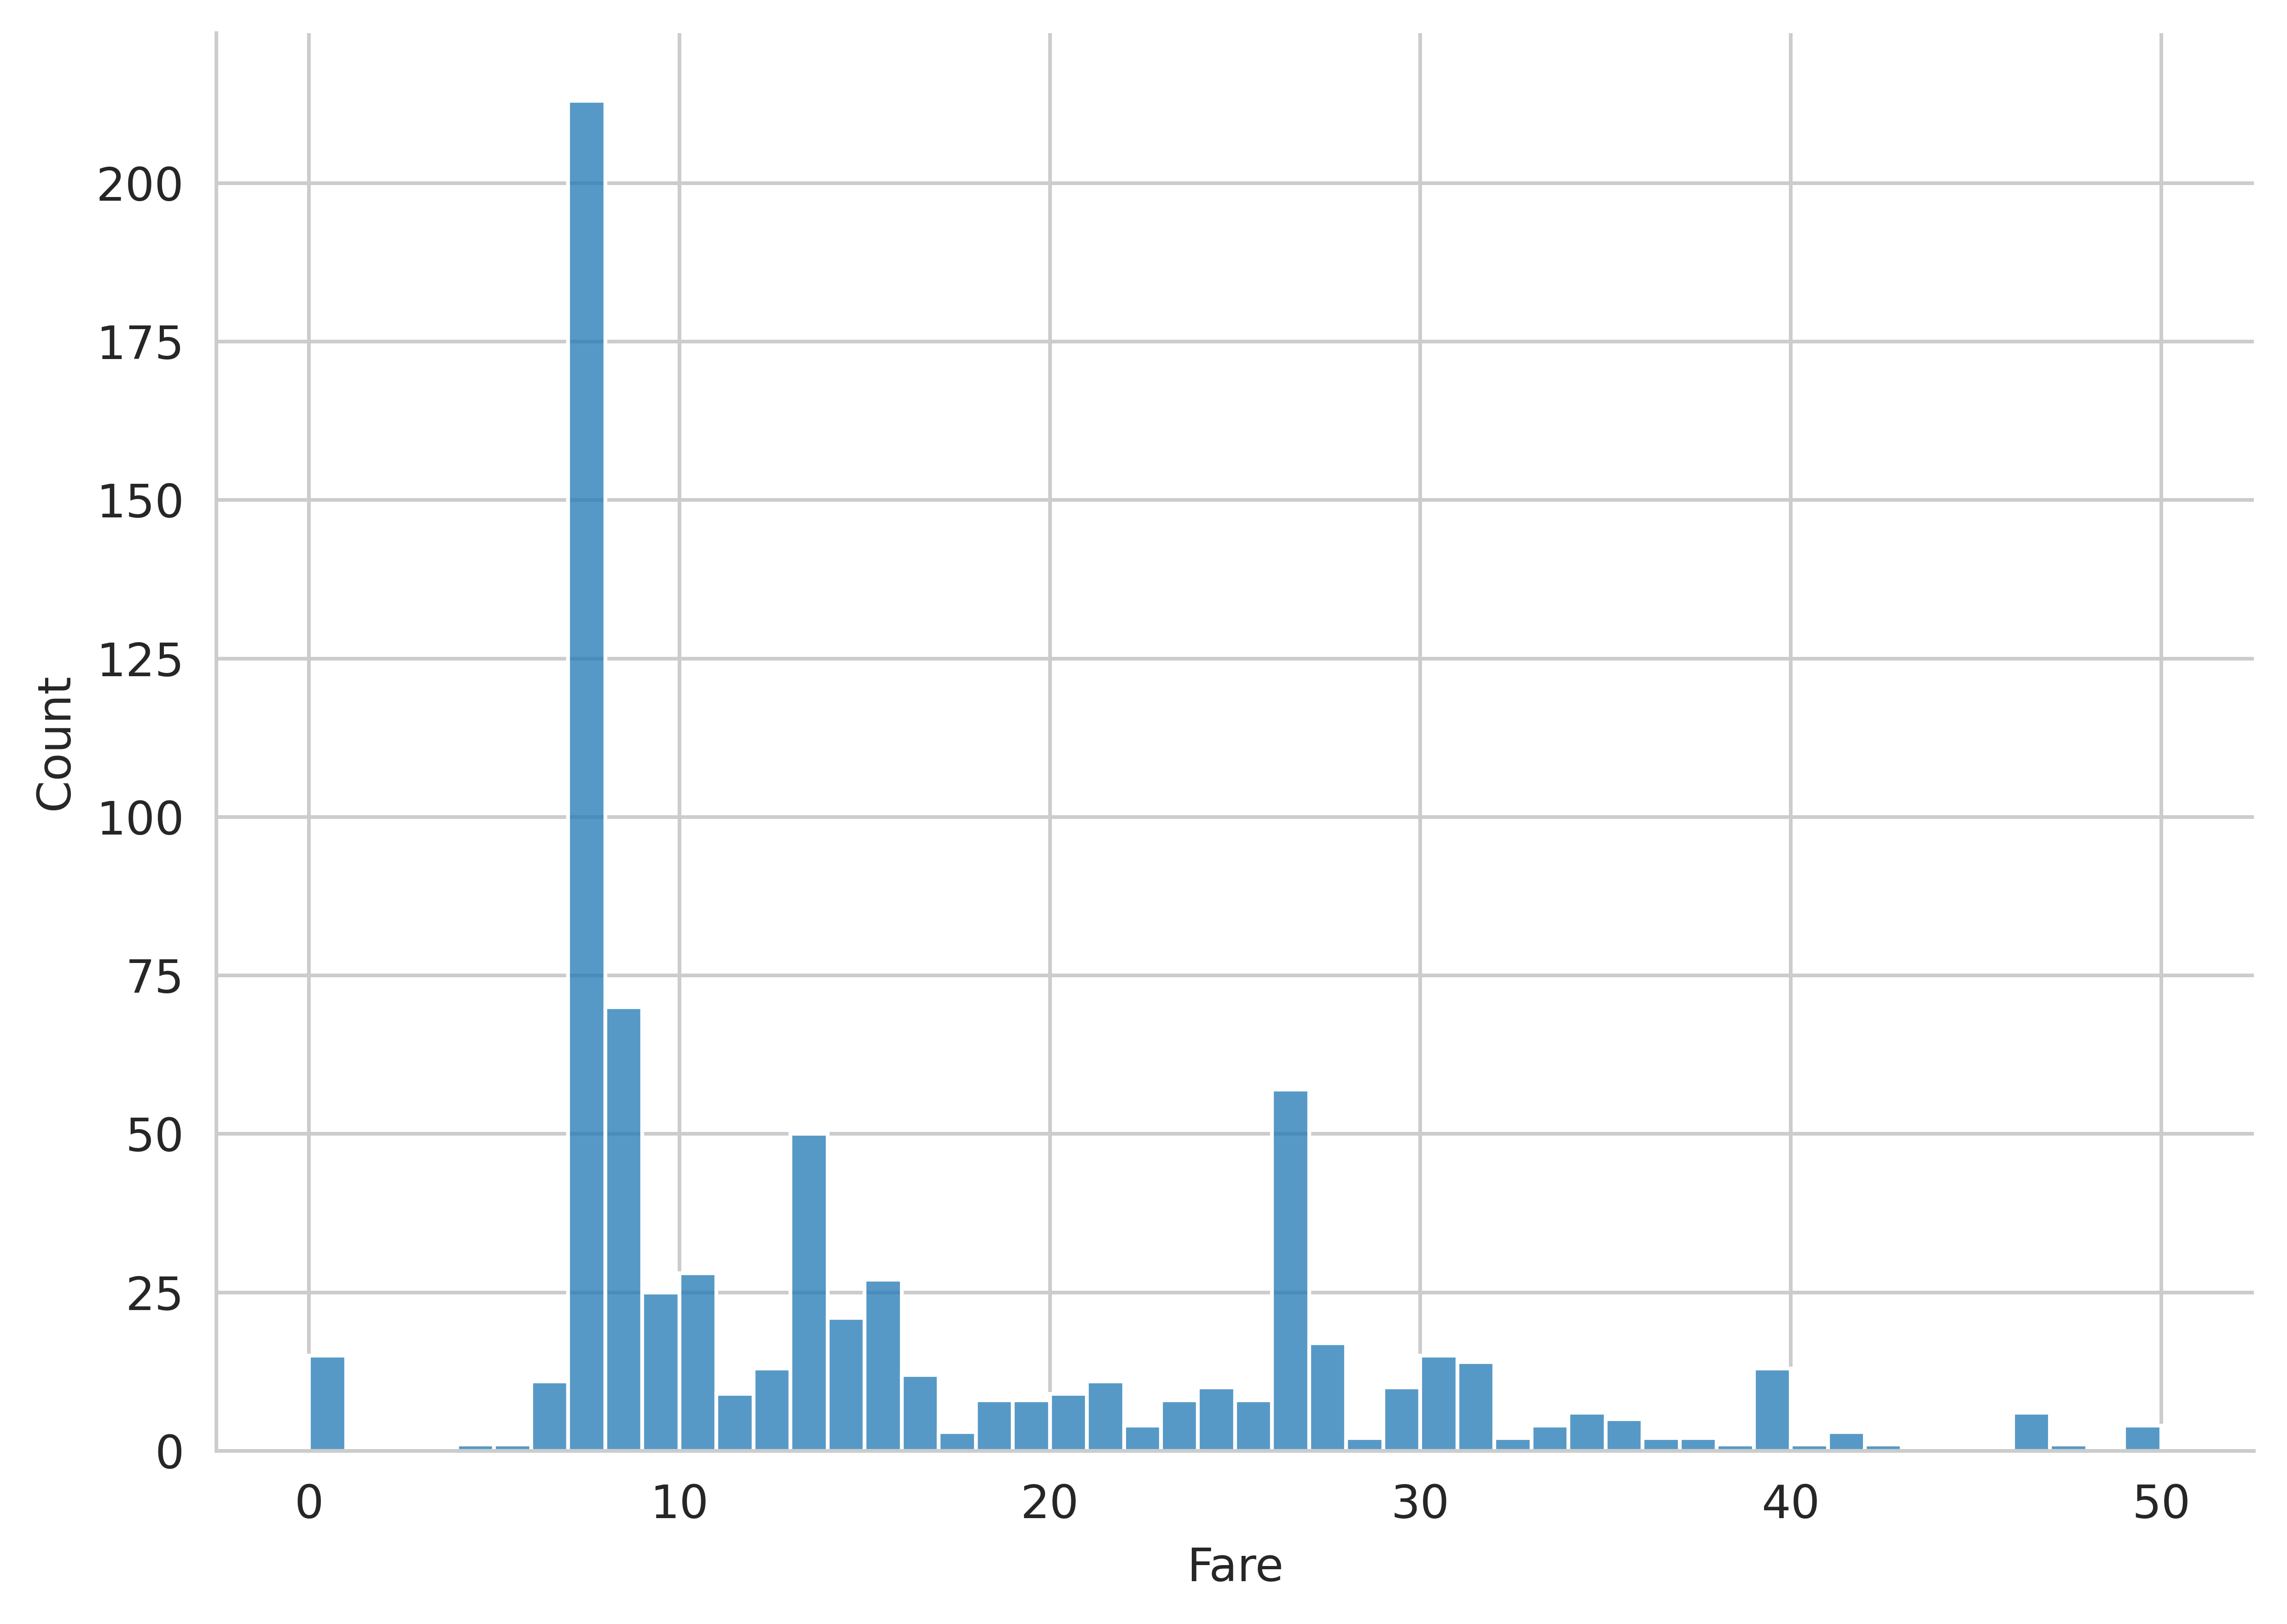

In [54]:
sns.displot(titanic_train[titanic_train['Fare'] <= 50]['Fare'], bins=50, aspect=1.4)
plt.show()

**Observation:**
- Most of times Fare is under 10 dollars. As we know, there are lot of People which belong to Third Class which is cheapest.

# Feature Engineering

In [55]:
titanic_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

**Note:**
- 'Sex' and 'Embarked' are Non-Numerical Categorical Columns and we need to convert them to Numerical Ordinal Features. So, our Machine Learning Model can process them.
- 'PassengerId' and 'Ticket' are non-deterministic columns to predict survival, hence dropping them.

### Dropping 'Ticket'

In [56]:
for dataset in combine:
    dataset.drop('Ticket', axis=1, inplace=True)

### Extracting 'Title' From 'Name'

In [57]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(index=titanic_train['Title'], columns=titanic_train['Sex']).rename_axis(None, axis=1)

female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

- *Replacing Uncommon Titles with a more common Title or classifying them as Rare*

In [58]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', \
                                                             'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

# Survival Rate based on Title
titanic_train[['Title','Survived']].groupby('Title').mean().sort_values('Survived', ascending=False)

Survived
Title           
Mrs     0.793651
Miss    0.702703
Master  0.575000
Rare    0.347826
Mr      0.156673

- *Converting Categorical Titles with Ordinal Values*

In [59]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Title  
0      0   7.2500        S      1  
1      0  71.2833        C      3  
2      0   7.9250        S      2  
3      0  53.1000        S      3  
4      0   8.0500        S      1

In [60]:
for dataset in combine: 
    dataset.drop('Name', axis=1, inplace=True)
titanic_train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

  Embarked  Title  
0        S      1  
1        C      3  
2        S      2  
3        S      3  
4        S      1

### Converting 'Age' upto 1 decimal place

In [61]:
for dataset in combine:
    dataset['Age'] = round(dataset['Age'], 1)
titanic_train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

  Embarked  Title  
0        S      1  
1        C      3  
2        S      2  
3        S      3  
4        S      1

### Creating a New Feature 'IsAlone'

In [62]:
for dataset in combine:
    dataset['IsAlone'] = 0    # Initializing at zero
    dataset.loc[(dataset['SibSp'] == 0) & (dataset['Parch'] == 0), 'IsAlone'] = 1
titanic_train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

  Embarked  Title  IsAlone  
0        S      1        0  
1        C      3        0  
2        S      2        1  
3        S      3        0  
4        S      1        1

**Survival based on 'IsAlone'**

In [63]:
titanic_train[['IsAlone', 'Survived']].groupby('IsAlone').mean().sort_values('Survived', ascending=False)

Survived
IsAlone          
0        0.505650
1        0.303538

### Converting 'Fare' upto 2 Decimal place

In [64]:
for dataset in combine:
    dataset['Fare'] = round(dataset['Fare'], 2)
titanic_train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch   Fare Embarked  \
0            1         0       3    male  22.0      1      0   7.25        S   
1            2         1       1  female  38.0      1      0  71.28        C   
2            3         1       3  female  26.0      0      0   7.92        S   
3            4         1       1  female  35.0      1      0  53.10        S   
4            5         0       3    male  35.0      0      0   8.05        S   

   Title  IsAlone  
0      1        0  
1      3        0  
2      2        1  
3      3        0  
4      1        1

### Converting 'Sex' and 'Embarked' to Discrete Integer Values

In [65]:
# 'Sex'
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male' : 1, 'female' : 0})
    dataset.rename(columns = {'Sex' : 'Male'}, inplace=True)

    # Conversion from 'object' to 'int64'
    dataset['Male'] = dataset['Male'].astype('int64')
titanic_train.head()

PassengerId  Survived  Pclass  Male   Age  SibSp  Parch   Fare Embarked  \
0            1         0       3     1  22.0      1      0   7.25        S   
1            2         1       1     0  38.0      1      0  71.28        C   
2            3         1       3     0  26.0      0      0   7.92        S   
3            4         1       1     0  35.0      1      0  53.10        S   
4            5         0       3     1  35.0      0      0   8.05        S   

   Title  IsAlone  
0      1        0  
1      3        0  
2      2        1  
3      3        0  
4      1        1

In [66]:
# 'Embarked'
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # Conversion from 'object' to 'int64'
    dataset['Embarked'] = dataset['Embarked'].astype('int64')
titanic_train.head()

PassengerId  Survived  Pclass  Male   Age  SibSp  Parch   Fare  Embarked  \
0            1         0       3     1  22.0      1      0   7.25         0   
1            2         1       1     0  38.0      1      0  71.28         1   
2            3         1       3     0  26.0      0      0   7.92         0   
3            4         1       1     0  35.0      1      0  53.10         0   
4            5         0       3     1  35.0      0      0   8.05         0   

   Title  IsAlone  
0      1        0  
1      3        0  
2      2        1  
3      3        0  
4      1        1

### Dropping 'PassengerId'

In [67]:
titanic_train.drop('PassengerId', axis=1, inplace=True)

# Dataset is ready for Machine Learning Model

In [68]:
# Training Dataset
titanic_train.head()

Survived  Pclass  Male   Age  SibSp  Parch   Fare  Embarked  Title  IsAlone
0         0       3     1  22.0      1      0   7.25         0      1        0
1         1       1     0  38.0      1      0  71.28         1      3        0
2         1       3     0  26.0      0      0   7.92         0      2        1
3         1       1     0  35.0      1      0  53.10         0      3        0
4         0       3     1  35.0      0      0   8.05         0      1        1

In [69]:
# Null
titanic_train.isnull().sum()

Survived    0
Pclass      0
Male        0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
IsAlone     0
dtype: int64

In [70]:
# Testing Dataset
titanic_test.head()

PassengerId  Pclass  Male   Age  SibSp  Parch   Fare  Embarked  Title  \
0          892       3     1  34.5      0      0   7.83         2      1   
1          893       3     0  47.0      1      0   7.00         0      3   
2          894       2     1  62.0      0      0   9.69         2      1   
3          895       3     1  27.0      0      0   8.66         0      1   
4          896       3     0  22.0      1      1  12.29         0      3   

   IsAlone  
0        1  
1        0  
2        1  
3        1  
4        0

In [71]:
# Null
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Male           0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
IsAlone        0
dtype: int64

# Machine Learning

### Feature Correlation

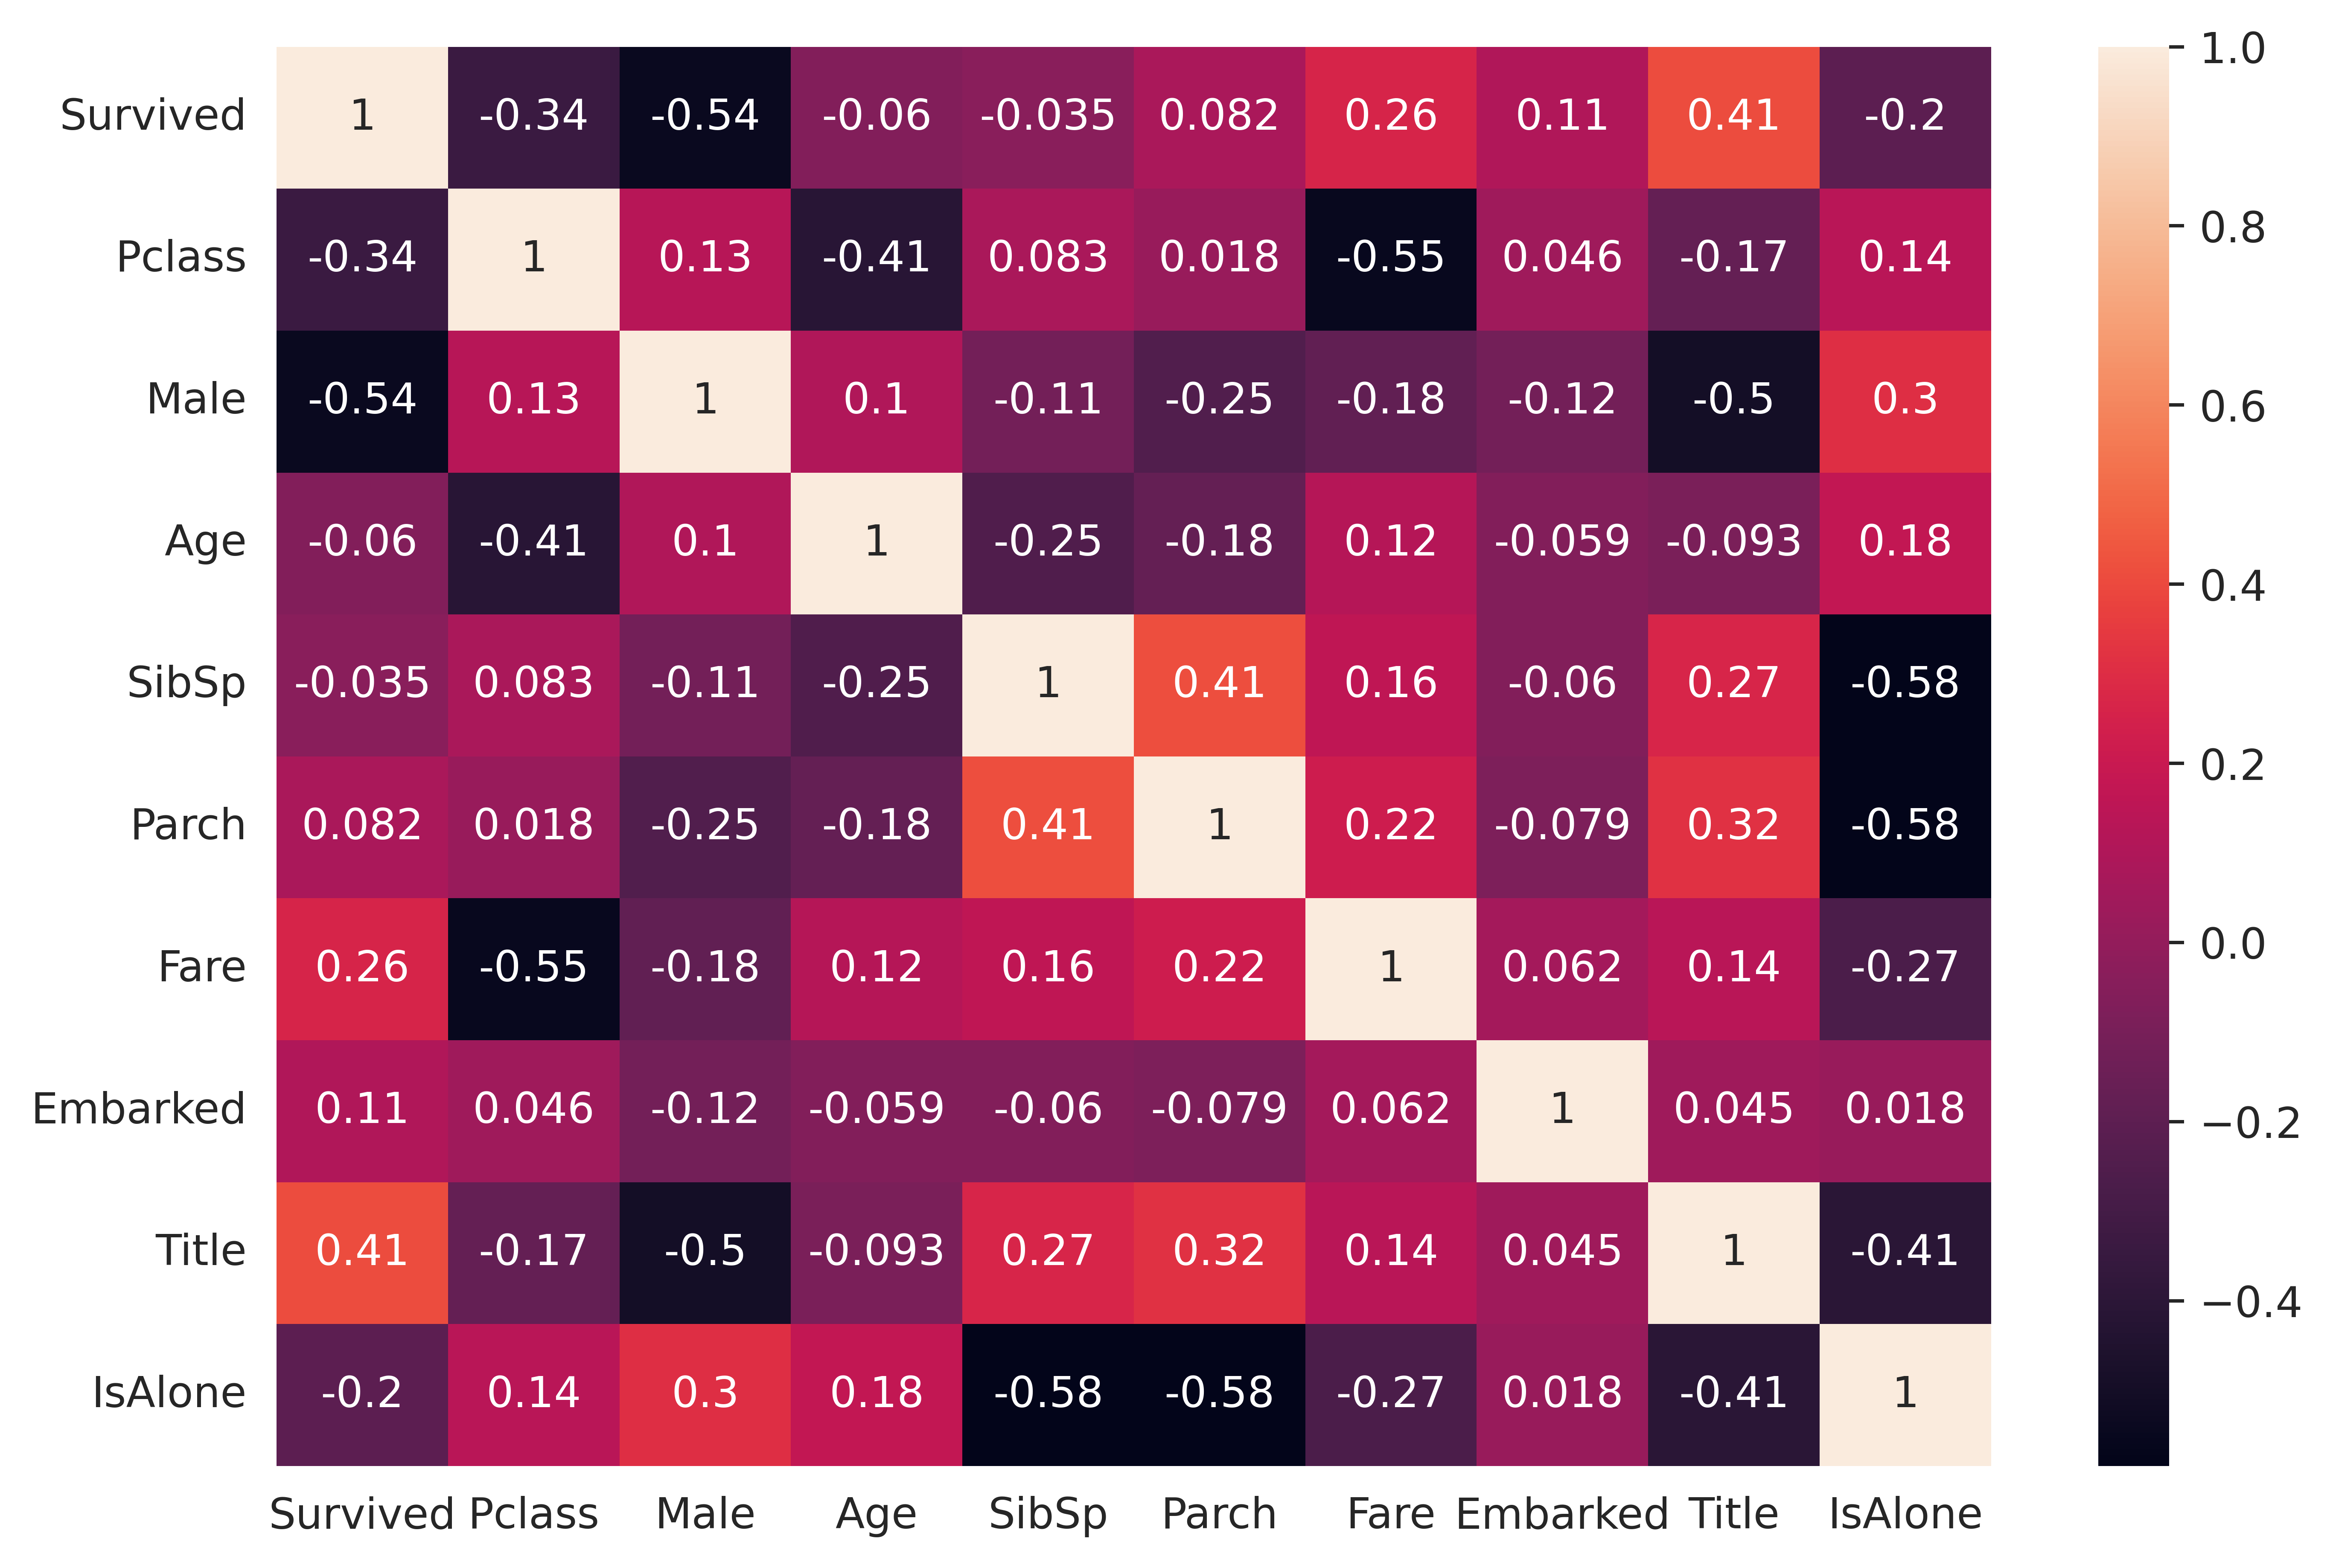

In [72]:
plt.figure(figsize=(9,6))
sns.heatmap(titanic_train.corr(), annot=True)
plt.show()

In [73]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [74]:
# Manually Testing of Machine Learning Models
log_model = LogisticRegression(max_iter=500)
log_model.fit(titanic_train.drop('Survived', axis=1), titanic_train['Survived'])
log_accuracy = round((cross_val_score(log_model, titanic_train.drop('Survived', axis=1), 
                titanic_train['Survived'], cv=5, n_jobs=-1).mean()) * 100, 3)

random_forest_model = RandomForestClassifier(n_estimators=500)
random_forest_model.fit(titanic_train.drop('Survived', axis=1), titanic_train['Survived'])
random_forest_accuracy = round((cross_val_score(random_forest_model, titanic_train.drop('Survived', axis=1), 
                titanic_train['Survived'], cv=5, n_jobs=-1).mean()) * 100, 3)

svc_model = SVC(gamma='auto')
svc_model.fit(titanic_train.drop('Survived', axis=1), titanic_train['Survived'])
svc_accuracy = round((cross_val_score(svc_model, titanic_train.drop('Survived', axis=1), 
                titanic_train['Survived'], cv=5, n_jobs=-1).mean()) * 100, 3)

print("\033[1mUnopitmized Models Accuracy\033[0m")
pd.DataFrame(data={'Score' : [log_accuracy, random_forest_accuracy, svc_accuracy]}, columns=['Score'],
            index=[str(log_model), str(random_forest_model), str(svc_model)])

Unopitmized Models Accuracy


Score
LogisticRegression(max_iter=500)          81.594
RandomForestClassifier(n_estimators=500)  81.707
SVC(gamma='auto')                         71.831

### Coefficient Interpretation

In [75]:
corr_survival = pd.DataFrame(titanic_train.columns.delete([0]))
corr_survival.columns = ['Features']
corr_survival['Survived'] = (log_model.coef_[0])
corr_survival

Features  Survived
0    Pclass -1.040474
1      Male -2.147763
2       Age -0.041568
3     SibSp -0.553189
4     Parch -0.300373
5      Fare  0.003228
6  Embarked  0.168507
7     Title  0.469178
8   IsAlone -0.509579

### Model Optimization

In [76]:
import optuna
def log_objective(trial):
    log_grid = {
        'C' : trial.suggest_float('C',  1e-4, 1e4, log=True),
        'solver' : trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
        'max_iter' : trial.suggest_int('max_iter', 100, 1000, 100),
        'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced'])
    }

    clf = LogisticRegression(**log_grid)

    return cross_val_score(clf,titanic_train.drop('Survived', axis=1),titanic_train['Survived'],n_jobs=-1,cv=5).mean()
    
def random_forest_objective(trial):
    random_forest_grid = {
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000, 100),
        'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth' : trial.suggest_int('max_depth', 10, 50, 5),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 10),
        'max_features' : trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])      
    }

    clf = RandomForestClassifier(**random_forest_grid)

    return cross_val_score(clf,titanic_train.drop('Survived', axis=1),titanic_train['Survived'],n_jobs=-1,cv=5).mean()

def svc_objective(trial):
    svc_grid = {
        'C' : trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma' : trial.suggest_categorical('gamma', ['scale', 'auto']),
        'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced'])
    }
    
    clf = SVC(**svc_grid)
    
    return cross_val_score(clf,titanic_train.drop('Survived', axis=1),titanic_train['Survived'], n_jobs=-1, cv=5).mean()

In [77]:
study_log = optuna.create_study(direction='maximize')
study_log.optimize(log_objective, n_trials=200)

[I 2023-05-24 20:10:00,816] A new study created in memory with name: no-name-eb5d2430-3ce0-43ee-abb4-c9b5f50731e6
[I 2023-05-24 20:10:01,075] Trial 0 finished with value: 0.7239972380892599 and parameters: {'C': 0.0032365092412804572, 'solver': 'sag', 'max_iter': 900, 'class_weight': None}. Best is trial 0 with value: 0.7239972380892599.
[I 2023-05-24 20:10:01,153] Trial 1 finished with value: 0.8036093151716777 and parameters: {'C': 576.6754117188938, 'solver': 'newton-cg', 'max_iter': 900, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8036093151716777.
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Co

In [78]:
study_random_forest = optuna.create_study(direction='maximize')
study_random_forest.optimize(random_forest_objective, n_trials=200)

[I 2023-05-24 20:10:21,558] A new study created in memory with name: no-name-28fa04ec-464a-4b59-b968-1ee696cd4b67
[I 2023-05-24 20:10:26,295] Trial 0 finished with value: 0.8395204318624068 and parameters: {'n_estimators': 900, 'criterion': 'gini', 'max_depth': 45, 'min_samples_split': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8395204318624068.
[I 2023-05-24 20:10:30,816] Trial 1 finished with value: 0.827154604230745 and parameters: {'n_estimators': 800, 'criterion': 'entropy', 'max_depth': 35, 'min_samples_split': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8395204318624068.
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packa

In [79]:
study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(svc_objective, n_trials=200)

[I 2023-05-24 20:22:45,500] A new study created in memory with name: no-name-b3b0f04d-bdf0-4cd2-af1c-187d0fd1be75
[I 2023-05-24 20:22:45,602] Trial 0 finished with value: 0.7498399347184734 and parameters: {'C': 7.872325386974718, 'gamma': 'scale', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7498399347184734.
[I 2023-05-24 20:22:45,704] Trial 1 finished with value: 0.6645596635490553 and parameters: {'C': 0.05902533811825097, 'gamma': 'scale', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7498399347184734.
[I 2023-05-24 20:22:45,824] Trial 2 finished with value: 0.783422258489737 and parameters: {'C': 131.55978403870517, 'gamma': 'scale', 'class_weight': 'balanced'}. Best is trial 2 with value: 0.783422258489737.
[I 2023-05-24 20:22:45,928] Trial 3 finished with value: 0.6746469148201619 and parameters: {'C': 0.045572719586113135, 'gamma': 'scale', 'class_weight': 'balanced'}. Best is trial 2 with value: 0.783422258489737.
[I 2023-05-24 20:22:46,021] Trial 4

### Best Parameters for every Model

In [80]:
print('Logistic Regresssion: ')
print(str(study_log.best_params) + ' || Score: ' + str(round((study_log.best_value * 100), 3)))
print('\n')
print('Random Forest Classifier: ')
print(str(study_random_forest.best_params) + ' || Score: ' + str(round((study_random_forest.best_value * 100), 3)))
print('\n')
print('Support Vector Classifier: ')
print(str(study_svc.best_params) + ' || Score: ' + str(round((study_svc.best_value * 100), 3)))

Logistic Regresssion: 
{'C': 0.4876151260602192, 'solver': 'lbfgs', 'max_iter': 200, 'class_weight': None} || Score: 81.818


Random Forest Classifier: 
{'n_estimators': 400, 'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 10, 'max_features': 'sqrt'} || Score: 84.177


Support Vector Classifier: 
{'C': 584.1818013509189, 'gamma': 'scale', 'class_weight': None} || Score: 80.358


### Model Analysis

In [81]:
models_data = {
    'Model' : ['Logistic Regression', 'Logistic Regression',
               'Random Forest Classifier', 'Random Forest Classifier',
               'Support Vector Classifier', 'Support Vector Classifier'],
    'Tuned' : ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Score' : [log_accuracy, round((study_log.best_value * 100), 3),
               random_forest_accuracy, round((study_random_forest.best_value * 100), 3),
               svc_accuracy, round((study_svc.best_value * 100), 3)]
    }
models = pd.DataFrame(columns=['Model', 'Tuned', 'Score'], data=models_data)
models.pivot_table(index=['Model','Tuned'],values='Score')

Score
Model                     Tuned        
Logistic Regression       No     81.594
                          Yes    81.818
Random Forest Classifier  No     81.707
                          Yes    84.177
Support Vector Classifier No     71.831
                          Yes    80.358

In [82]:
# Finest Model
models[models['Score'] == max(models['Score'])]

Model Tuned   Score
3  Random Forest Classifier   Yes  84.177

In [83]:
# Finest Model Visualization
optuna.visualization.plot_slice(study_random_forest)

In [84]:
# Finest Model Visualization
optuna.visualization.plot_optimization_history(study_random_forest)

# Final Model

In [85]:
final_model = RandomForestClassifier(**study_random_forest.best_params)
final_model.fit(titanic_train.drop('Survived', axis=1), titanic_train['Survived'])
predictions = final_model.predict(titanic_test.drop('PassengerId', axis=1))
accuracy = round((cross_val_score(final_model, titanic_train.drop('Survived', axis=1), 
                titanic_train['Survived'], cv=5, n_jobs=-1).mean()) * 100, 3)
print("\033[1mAccuracy Score:\033[0m " + str(accuracy))

Accuracy Score: 83.84


## Submission

In [86]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('/kaggle/working/titanic_submission.csv', index=False)

---

<h2 style="text-align:center;"> Thanks for reading the Notebook! If you like the work then Upvote. </h2>
<p style="font-style:italic; text-align:center;">This is my First Machine Learning Project</p>